In [5]:
# just checking the system on which we are working
import sys
print(sys.version)

3.6.9 |Anaconda custom (64-bit)| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [6]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [7]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

%config InlineBackend.rc = {}
%matplotlib inline
%config IPython.matplotlib.backend = "retina"

# standard imports of global libraries
import os
import numpy as np
import astropy
import pandas as pd
import pickle
import scipy
import astropy

# few specific imports from the libraries above
from sklearn.metrics.pairwise import euclidean_distances
from scipy import signal
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

# tqdm is a library for monitoring execution of loop in notebook enviroment
from tqdm import tqdm

# making sure that the notebook does not get swamped with outputs
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})

# if you are not currently in the github directory, provide the path 
# if you are in the github directory executing `os.getcwd()` below will give you the correct path
# for example, on my computer if I wanted to specify explicity the path it would be: MAIN_DIRECTORY='/Users/nevencaplar/Documents/Variability/NonStationarity'
MAIN_DIRECTORY=os.getcwd()
DATA_DIRECTORY=MAIN_DIRECTORY+'/Data/'
FIGURES_PNG_DIRECTORY=MAIN_DIRECTORY+'/Figures_png/'
FIGURES_PDF_DIRECTORY=MAIN_DIRECTORY+'/Figures_pdf/'

# module specific for this work
# if you change somethign autoreload will make sure that changes are immediately active 
%load_ext autoreload
%autoreload 2

from NonStationarity import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Theoretical investigation of DRW in Edd. ratio space

In [9]:
# delta_t in seconds - that is 100 days
delta_t=8640000
# number of points
num_points=2**24

print('delta_t: '+str(delta_t/(24*3600))+' days')

ER_curve = np.zeros(num_points, dtype = float)
ER_curve = np.fromfile('/Users/nevencaplar/Documents/Variability/NonSationarity_nonGithub/Example_results/results_example_results_1.bin', dtype = float)

full_log_Er_curve=np.log10(ER_curve)

delta_t: 100.0 days


In [10]:
full_log_Er_curve_cut=full_log_Er_curve[full_log_Er_curve>-2]

In [11]:
Edd_bin_len=[]
for i in np.arange(-2,2,0.1):
    Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+0.1)&(full_log_Er_curve_cut>i)]),\
                        np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+0.1)&(full_log_Er_curve_cut>i)]))])   
Edd_bin_len=np.array(Edd_bin_len)      
"""
Edd_bin_len_SDSS=[]
for i in np.arange(-2,2,0.1):
    Edd_bin_len_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]),\
                        np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]))])   
Edd_bin_len_SDSS=np.array(Edd_bin_len_SDSS)    
"""

/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


'\nEdd_bin_len_SDSS=[]\nfor i in np.arange(-2,2,0.1):\n    Edd_bin_len_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]),                        np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+0.1)&(full_log_Er_curve_cut_SDSS>i)]))])   \nEdd_bin_len_SDSS=np.array(Edd_bin_len_SDSS)    \n'

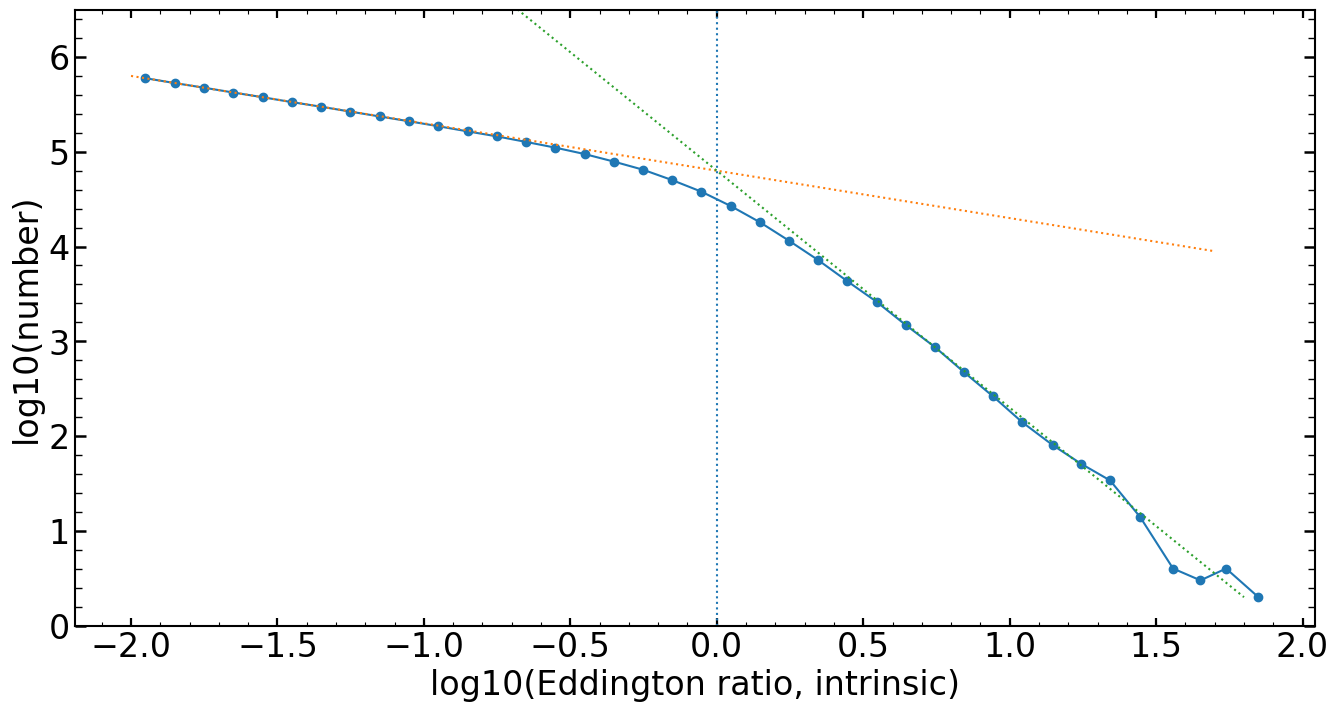

In [12]:
plt.figure(figsize=(16,8))
plt.plot(Edd_bin_len[:,0],Edd_bin_len[:,1],marker='o')
#plt.plot(Edd_bin_len_SDSS[:,0],Edd_bin_len_SDSS[:,1]-0.07,marker='o')
plt.plot(np.arange(-2,1.8,0.1),4.8-np.arange(-2,1.8,0.1)*0.5,ls=':')
plt.plot(np.arange(-2,1.9,0.1),4.8-np.arange(-2,1.9,0.1)*2.5,ls=':')
plt.xlabel('log10(Eddington ratio, intrinsic)')
plt.ylabel('log10(number)')

plt.ylim(0,6.5)
plt.axvline(0,ls=':')

In [13]:
def analytical_derivative(g1,g2,l,ls):
    return -g2+((g2-g1)*((10**(l-ls)))**g1)/((10**(l-ls))**g1+(10**(l-ls))**g2)

In [14]:
def analytical_derivative_2(g1,g2,l,ls):
    return (-(g2-g1)**2*np.log(10)*((10**(l-ls)))**(g1+g2))/((10**(l-ls))**g1+(10**(l-ls))**g2)**2

In [15]:
# from https://ui.adsabs.harvard.edu/abs/2020arXiv200102696S/abstract
c0=13.0124
c1=-0.5777
c2=0.4545
z_ref=2
def log_Lstar(z):
    return 2*c0/(((1+z)/(1+z_ref))**(c1)+((1+z)/(1+z_ref))**(c2))+33.58

In [16]:
g2=2.5
g1=0.5
Der_analytical=[]
ls=0
Der_analytical2=[]
for l in np.arange(-2,2,0.1):
    Der_analytical.append(-g2+((g2-g1)*((10**(l-ls)))**g1)/((10**(l-ls))**g1+(10**(l-ls))**g2))
    
for l in np.arange(-2,2,0.1):
    Der_analytical2.append(analytical_derivative_2(g1,g2,l,ls))

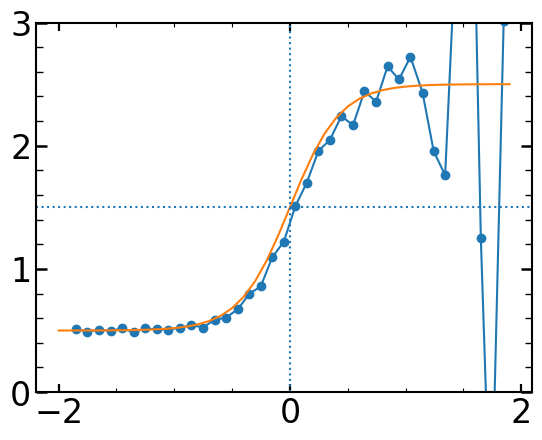

In [17]:
plt.plot(Edd_bin_len[:,0][1:],np.diff(Edd_bin_len[:,1])*(-10),marker='o')
plt.plot( np.arange(-2,2,0.1),-np.array(Der_analytical))
plt.ylim(0,3)
plt.axvline(0,ls=':')
plt.axhline(1.5,ls=':')

## Example where SDSS selection limit below the knee

In [15]:
selection_limit=-0.5

Edd_bin_len_SDSS_from_SDSS_many_delta=[]
Edd_bin_len_HSC_from_SDSS_many_delta=[]
Edd_bin_len_many_delta=[]
Edd_bin_len_SDSS_from_HSC_many_delta=[]
Edd_bin_len_HSC_from_HSC_many_delta=[]


change_as_delta=[]
for delta_mag in tqdm([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65]):

    delta=delta_mag/2.5
    full_log_Er_curve_cut_SDSS=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    full_log_Er_curve_cut_HSC=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    Edd_bin_len_SDSS_from_SDSS=[]
    Edd_bin_len_HSC_from_SDSS=[]
    Edd_bin_len=[]
    Edd_bin_len_SDSS_from_HSC=[]
    Edd_bin_len_HSC_from_HSC=[]
    
    step=0.1
    # distribution of AGN as observed in SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_SDSS_from_SDSS_single_delta=np.array(Edd_bin_len_SDSS_from_SDSS)   

    # distribution of AGN in HSC, as observed from SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_SDSS.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_HSC_from_SDSS_single_delta=np.array(Edd_bin_len_HSC_from_SDSS)      
    
    # true distribution of the AGN
    for i in np.arange(-2,2,step):
        Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]),\
                            np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]))])
    Edd_bin_len_single_delta=np.array(Edd_bin_len)   
    
    # distribution of SDSS, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_HSC.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_SDSS_from_HSC_single_delta=np.array(Edd_bin_len_SDSS_from_HSC)   

    # distribution of HSC, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_HSC.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_HSC_from_HSC_single_delta=np.array(Edd_bin_len_HSC_from_HSC)   

    Edd_bin_len_SDSS_from_SDSS_many_delta.append(Edd_bin_len_SDSS_from_SDSS_single_delta)
    Edd_bin_len_HSC_from_SDSS_many_delta.append(Edd_bin_len_HSC_from_SDSS_single_delta)
    Edd_bin_len_many_delta.append(Edd_bin_len_single_delta)
    Edd_bin_len_SDSS_from_HSC_many_delta.append(Edd_bin_len_SDSS_from_HSC_single_delta)
    Edd_bin_len_HSC_from_HSC_many_delta.append(Edd_bin_len_HSC_from_HSC_single_delta)


  0%|          | 0/13 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs

In [16]:
def analytical_derivative_modified(g1,g2,l,ls):
    return -g2+((g2-g1)*((10**(l-ls)/2))**g1)/((10**(l-ls)/2)**g1+(10**(l-ls)/2)**g2)

def analytical_derivative_2_modified(g1,g2,l,ls):
    return (-(g2-g1)**2*np.log(10)*((10**(l-ls)/2))**(g1+g2))/((10**(l-ls)/2)**g1+(10**(l-ls)/2)**g2)**2

In [17]:
sigma=0.3

bias_analytical=[]
for l in np.arange(-2,2,0.01):
    bias_analytical.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4)
    
bias_analytical=np.array(bias_analytical)

# it is obviously not exact, but kinda helps
#bias_analytical_2=[]
#for l in np.arange(-2,2,0.01):
#    bias_analytical_2.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2_modified(0.5,2.5,l,0))*0.4*(1/2))
    
#bias_analytical_2=np.array(bias_analytical_2)


# it is obviously not exact, but kinda helps
bias_analytical_2=[]
for l in np.arange(-2,2,0.01):
    bias_analytical_2.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
bias_analytical_2=np.array(bias_analytical_2)

In [18]:
sigma_reduced=0.3*0.79506

bias_analytical_reduced=[]
for l in np.arange(-2,2,0.01):
    bias_analytical_reduced.append(np.log(10)*(sigma_reduced)**2*(analytical_derivative(0.5,2.5,l,0))*0.4)
    
bias_analytical_reduced=np.array(bias_analytical_reduced)

# it is obviously not exact, but kinda helps
#bias_analytical_2=[]
#for l in np.arange(-2,2,0.01):
#    bias_analytical_2.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2_modified(0.5,2.5,l,0))*0.4*(1/2))
    
#bias_analytical_2=np.array(bias_analytical_2)


# it is obviously not exact, but kinda helps
bias_analytical_2_reduced=[]
for l in np.arange(-2,2,0.01):
    bias_analytical_2_reduced.append(np.log(10)*(sigma_reduced)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma_reduced)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
bias_analytical_2_reduced=np.array(bias_analytical_2_reduced)

(-2, 2)

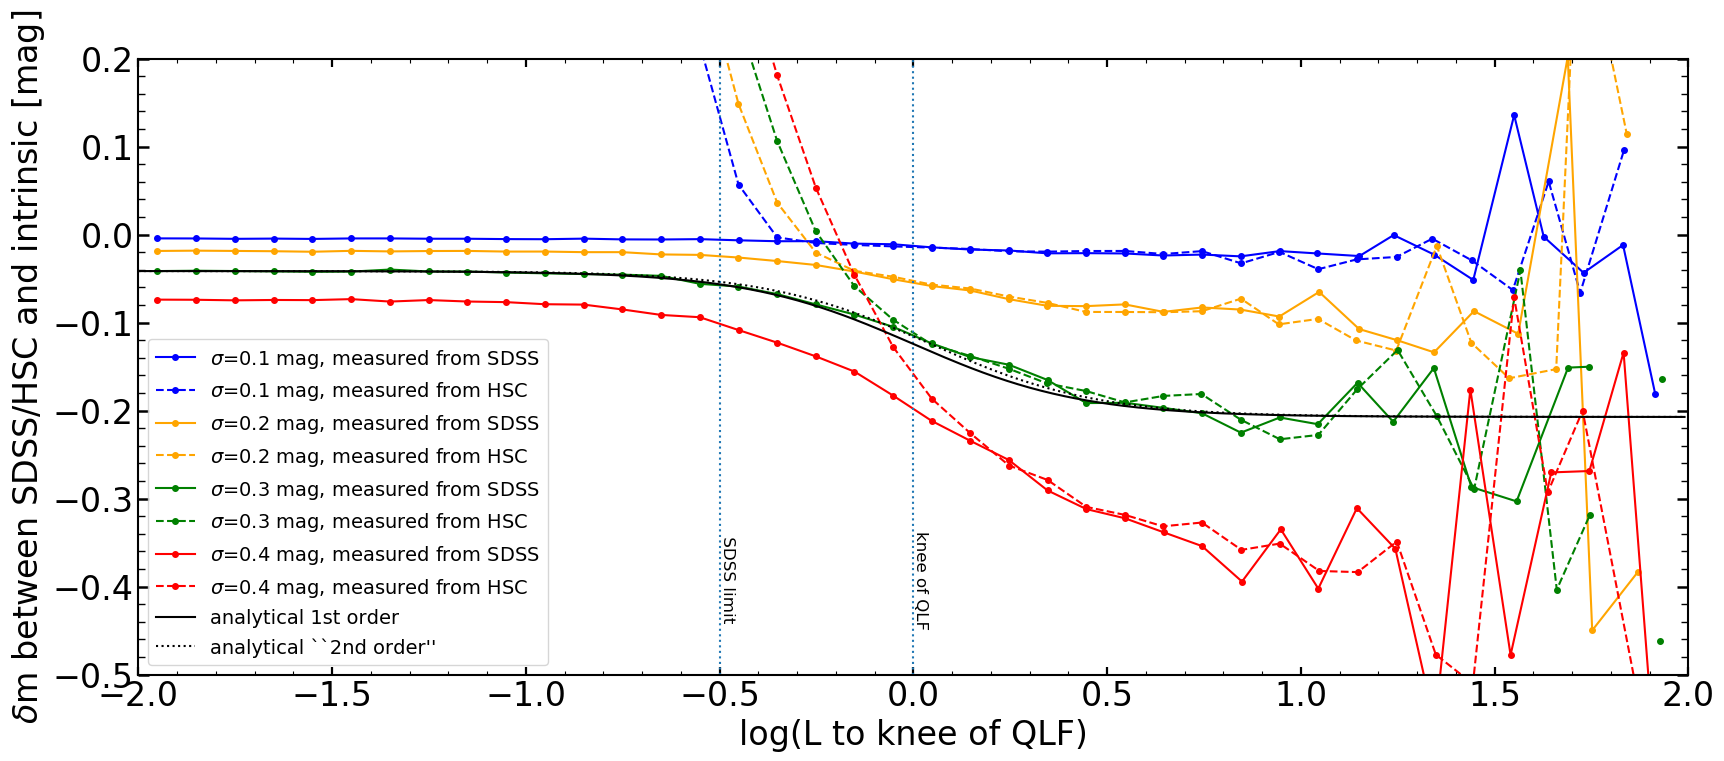

In [28]:
# to get diff. in mag multiply with 2.5 again

plt.figure(figsize=(20,8))
# sigma=0.1
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from SDSS',color='blue', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from HSC',color='blue',ls='--', markersize=4)

# sigma=0.2
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from SDSS',color='orange', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from HSC',color='orange',ls='--', markersize=4)

# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)

# sigma=0.4
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from SDSS',color='red', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from HSC',color='red',ls='--', markersize=4)

plt.axvline(-0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=-0.5,y=-0.35,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.35,s='knee of QLF',rotation=-90.,fontsize=12)



#plt.axhline(np.log(10)*(0.2)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.2)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.3)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.4)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.4)**2*(1-3.5)*0.4)

plt.plot(np.arange(-2,2,0.01),bias_analytical,color='black',label='analytical 1st order')
plt.plot(np.arange(-2,2,0.01),bias_analytical_2,color='black',ls=':',label='analytical ``2nd order\'\' ')

plt.legend(fontsize=14)
plt.xlabel('log(L to knee of QLF)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.5,0.2)
plt.xlim(-2,2)

### is it reversible if t_obs < tau

In [ ]:
# we have to generate actual lightcurves for this
# np.arange(100,60100,100)
# LC_different_break_times

In [35]:
LC_different_break_times[0]

NameError: name 'LC_different_break_times' is not defined

In [929]:
LC_different_break_times[-1].std()

1.0

## Example where SDSS selection limit above the knee

In [116]:
selection_limit=0.5

Edd_bin_len_SDSS_from_SDSS_many_delta=[]
Edd_bin_len_HSC_from_SDSS_many_delta=[]
Edd_bin_len_many_delta=[]
Edd_bin_len_SDSS_from_HSC_many_delta=[]
Edd_bin_len_HSC_from_HSC_many_delta=[]


change_as_delta=[]
for delta_mag in tqdm([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65]):

    delta=delta_mag/2.5
    full_log_Er_curve_cut_SDSS=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    full_log_Er_curve_cut_HSC=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta
    Edd_bin_len_SDSS_from_SDSS=[]
    Edd_bin_len_HSC_from_SDSS=[]
    Edd_bin_len=[]
    Edd_bin_len_SDSS_from_HSC=[]
    Edd_bin_len_HSC_from_HSC=[]
    
    step=0.1
    # distribution of AGN as observed in SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_SDSS_from_SDSS_single_delta=np.array(Edd_bin_len_SDSS_from_SDSS)   

    # distribution of AGN in HSC, as observed from SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_SDSS.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_HSC_from_SDSS_single_delta=np.array(Edd_bin_len_HSC_from_SDSS)      
    
    # true distribution of the AGN
    for i in np.arange(-2,2,step):
        Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]),\
                            np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]))])
    Edd_bin_len_single_delta=np.array(Edd_bin_len)   
    
    # distribution of SDSS, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_HSC.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_SDSS_from_HSC_single_delta=np.array(Edd_bin_len_SDSS_from_HSC)   

    # distribution of HSC, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_HSC.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_HSC_from_HSC_single_delta=np.array(Edd_bin_len_HSC_from_HSC)   

    Edd_bin_len_SDSS_from_SDSS_many_delta.append(Edd_bin_len_SDSS_from_SDSS_single_delta)
    Edd_bin_len_HSC_from_SDSS_many_delta.append(Edd_bin_len_HSC_from_SDSS_single_delta)
    Edd_bin_len_many_delta.append(Edd_bin_len_single_delta)
    Edd_bin_len_SDSS_from_HSC_many_delta.append(Edd_bin_len_SDSS_from_HSC_single_delta)
    Edd_bin_len_HSC_from_HSC_many_delta.append(Edd_bin_len_HSC_from_HSC_single_delta)
    
    
    #change_as_delta.append([delta,-2.5*(np.median(Edd_bin_len_SDSS[:,0]-Edd_bin_len[:,0]))])
    
#change_as_delta=np.array(change_as_delta)  

  0%|          | 0/13 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs

(-2, 2)

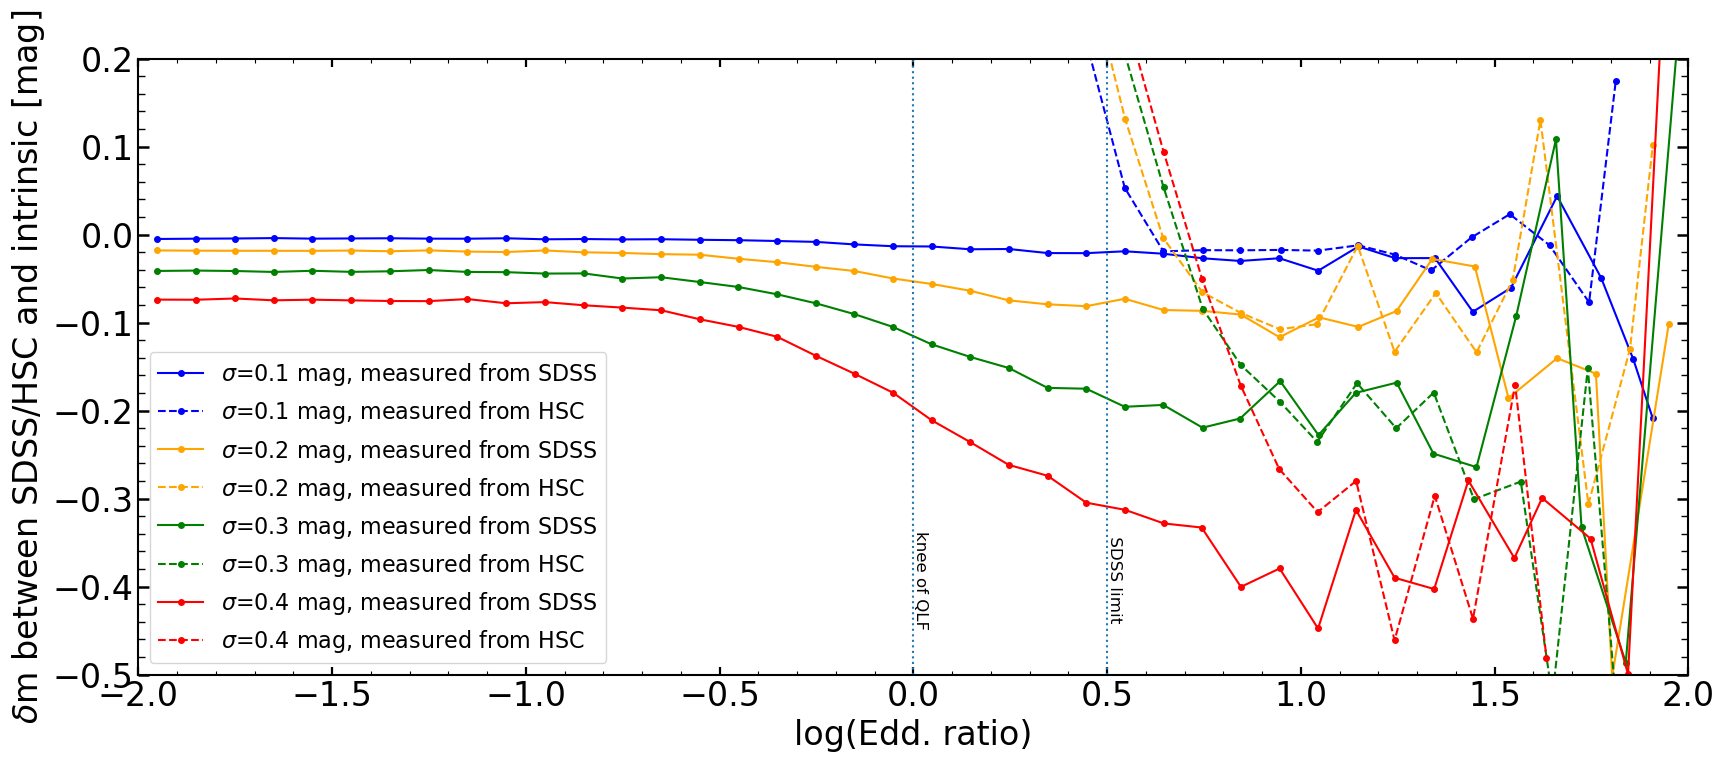

In [118]:
# to get diff. in mag multiply with 2.5 again


plt.figure(figsize=(20,8))
# sigma=0.1
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from SDSS',color='blue', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from HSC',color='blue',ls='--', markersize=4)

# sigma=0.2
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from SDSS',color='orange', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from HSC',color='orange',ls='--', markersize=4)

# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)

# sigma=0.4
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from SDSS',color='red', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from HSC',color='red',ls='--', markersize=4)

plt.axvline(0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=0.5,y=-0.35,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.35,s='knee of QLF',rotation=-90.,fontsize=12)

plt.legend(fontsize=16)
plt.xlabel('log(Edd. ratio)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.5,0.2)
plt.xlim(-2,2)

#plt.axhline(np.log(10)*(0.2)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.2)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.3)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.4)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.4)**2*(1-3.5)*0.4)

## Example where sigma is a function of Edd.ratio

In [123]:
selection_limit=-0.5

Edd_bin_len_SDSS_from_SDSS_many_delta=[]
Edd_bin_len_HSC_from_SDSS_many_delta=[]
Edd_bin_len_many_delta=[]
Edd_bin_len_SDSS_from_HSC_many_delta=[]
Edd_bin_len_HSC_from_HSC_many_delta=[]


change_as_delta=[]
for delta_mag in tqdm([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.60,0.65]):

    delta=delta_mag/2.5
    full_log_Er_curve_cut_SDSS=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta*(10**full_log_Er_curve)**(-0.25)
    full_log_Er_curve_cut_HSC=full_log_Er_curve+np.random.randn(len(full_log_Er_curve))*delta*(10**full_log_Er_curve)**(-0.25)
    Edd_bin_len_SDSS_from_SDSS=[]
    Edd_bin_len_HSC_from_SDSS=[]
    Edd_bin_len=[]
    Edd_bin_len_SDSS_from_HSC=[]
    Edd_bin_len_HSC_from_HSC=[]
    
    step=0.1
    # distribution of AGN as observed in SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_SDSS.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_SDSS_from_SDSS_single_delta=np.array(Edd_bin_len_SDSS_from_SDSS)   

    # distribution of AGN in HSC, as observed from SDSS
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_SDSS.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_SDSS<i+step)&(full_log_Er_curve_cut_SDSS>i)]))])
    Edd_bin_len_HSC_from_SDSS_single_delta=np.array(Edd_bin_len_HSC_from_SDSS)      
    
    # true distribution of the AGN
    for i in np.arange(-2,2,step):
        Edd_bin_len.append([np.mean(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]),\
                            np.log10(len(full_log_Er_curve_cut[(full_log_Er_curve_cut<i+step)&(full_log_Er_curve_cut>i)]))])
    Edd_bin_len_single_delta=np.array(Edd_bin_len)   
    
    # distribution of SDSS, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_SDSS_from_HSC.append([np.mean(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_SDSS[(full_log_Er_curve_cut_SDSS>selection_limit)&(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_SDSS_from_HSC_single_delta=np.array(Edd_bin_len_SDSS_from_HSC)   

    # distribution of HSC, as observed from HSC
    for i in np.arange(-2,2,step):
        Edd_bin_len_HSC_from_HSC.append([np.mean(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]),\
                            np.log10(len(full_log_Er_curve_cut_HSC[(full_log_Er_curve_cut_HSC<i+step)&(full_log_Er_curve_cut_HSC>i)]))])   
    Edd_bin_len_HSC_from_HSC_single_delta=np.array(Edd_bin_len_HSC_from_HSC)   

    Edd_bin_len_SDSS_from_SDSS_many_delta.append(Edd_bin_len_SDSS_from_SDSS_single_delta)
    Edd_bin_len_HSC_from_SDSS_many_delta.append(Edd_bin_len_HSC_from_SDSS_single_delta)
    Edd_bin_len_many_delta.append(Edd_bin_len_single_delta)
    Edd_bin_len_SDSS_from_HSC_many_delta.append(Edd_bin_len_SDSS_from_HSC_single_delta)
    Edd_bin_len_HSC_from_HSC_many_delta.append(Edd_bin_len_HSC_from_HSC_single_delta)


  0%|          | 0/13 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/Users/nevencaplar/anaconda2/envs

(-2, 2)

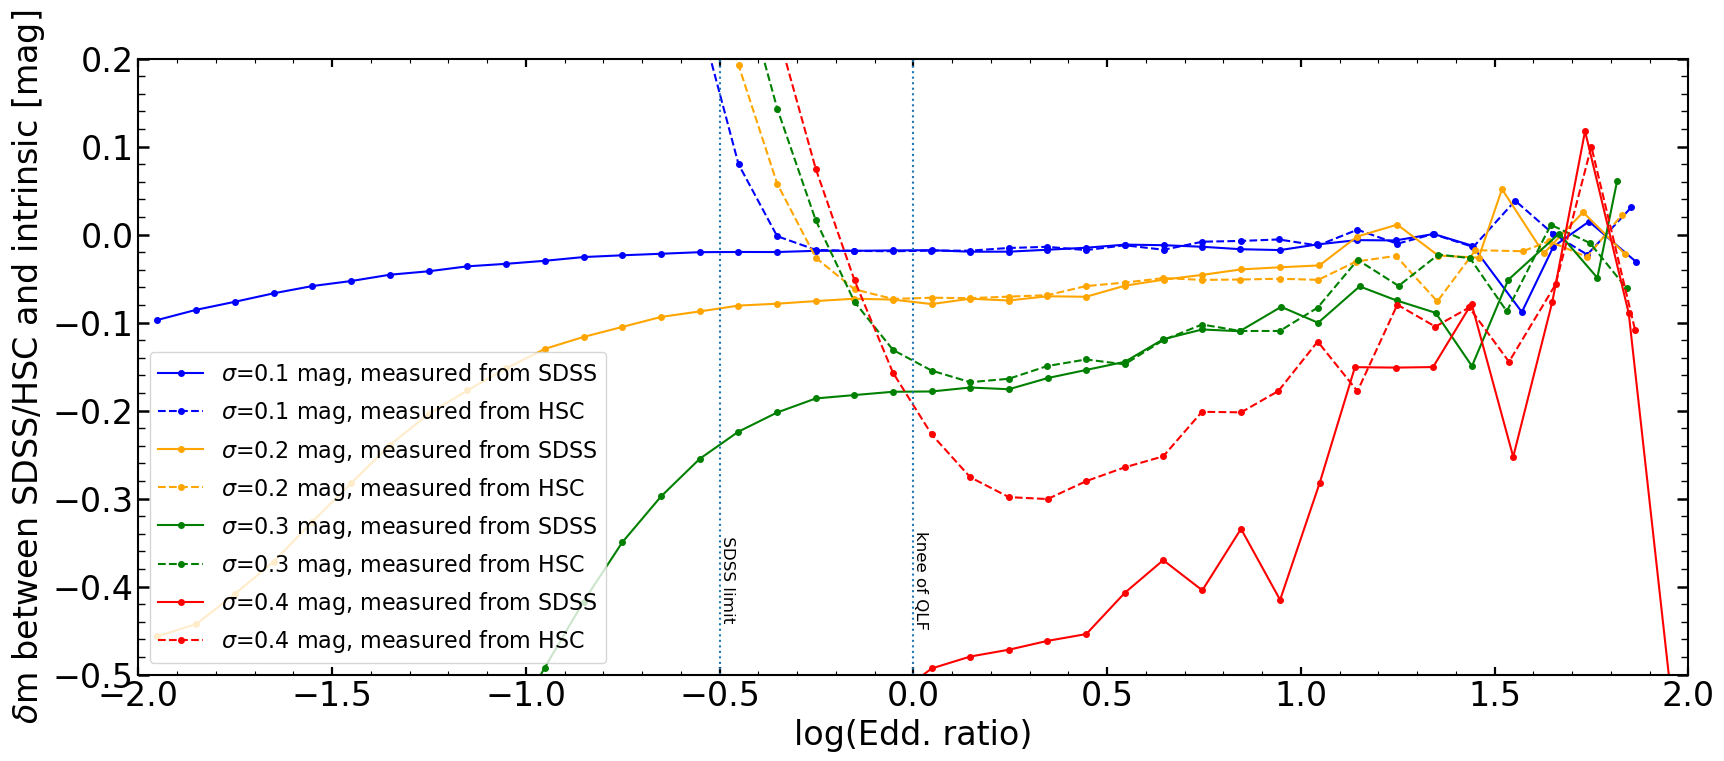

In [124]:
# to get diff. in mag multiply with 2.5 again


plt.figure(figsize=(20,8))
# sigma=0.1
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[1][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from SDSS',color='blue', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[1][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[1][:,0]),\
         marker='o',label='$\sigma$=0.1 mag, measured from HSC',color='blue',ls='--', markersize=4)

# sigma=0.2
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[3][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from SDSS',color='orange', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[3][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[3][:,0]),\
         marker='o',label='$\sigma$=0.2 mag, measured from HSC',color='orange',ls='--', markersize=4)

# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)

# sigma=0.4
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[7][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from SDSS',color='red', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[7][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[7][:,0]),\
         marker='o',label='$\sigma$=0.4 mag, measured from HSC',color='red',ls='--', markersize=4)

plt.axvline(-0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=-0.5,y=-0.35,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.35,s='knee of QLF',rotation=-90.,fontsize=12)

plt.legend(fontsize=16)
plt.xlabel('log(Edd. ratio)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.5,0.2)
plt.xlim(-2,2)

#plt.axhline(np.log(10)*(0.2)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.2)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.3)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4)

#plt.axhline(np.log(10)*(0.4)**2*(1-1.5)*0.4)
#plt.axhline(np.log(10)*(0.4)**2*(1-3.5)*0.4)

In [122]:
(10**1)**(-0.25)

0.5623413251903491

# simulations in redshift space

## creation of one lightcurve 

In [13]:
%load_ext autoreload
%autoreload 2
from DELCgen import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# amplitude
A=1
#slope on the short time scales
a_low=2
#slope on the long time scales - by definition in our work this is set at 0
a_high=0
# intercept/offset: adds constant to the final output; not used it this work
c=0


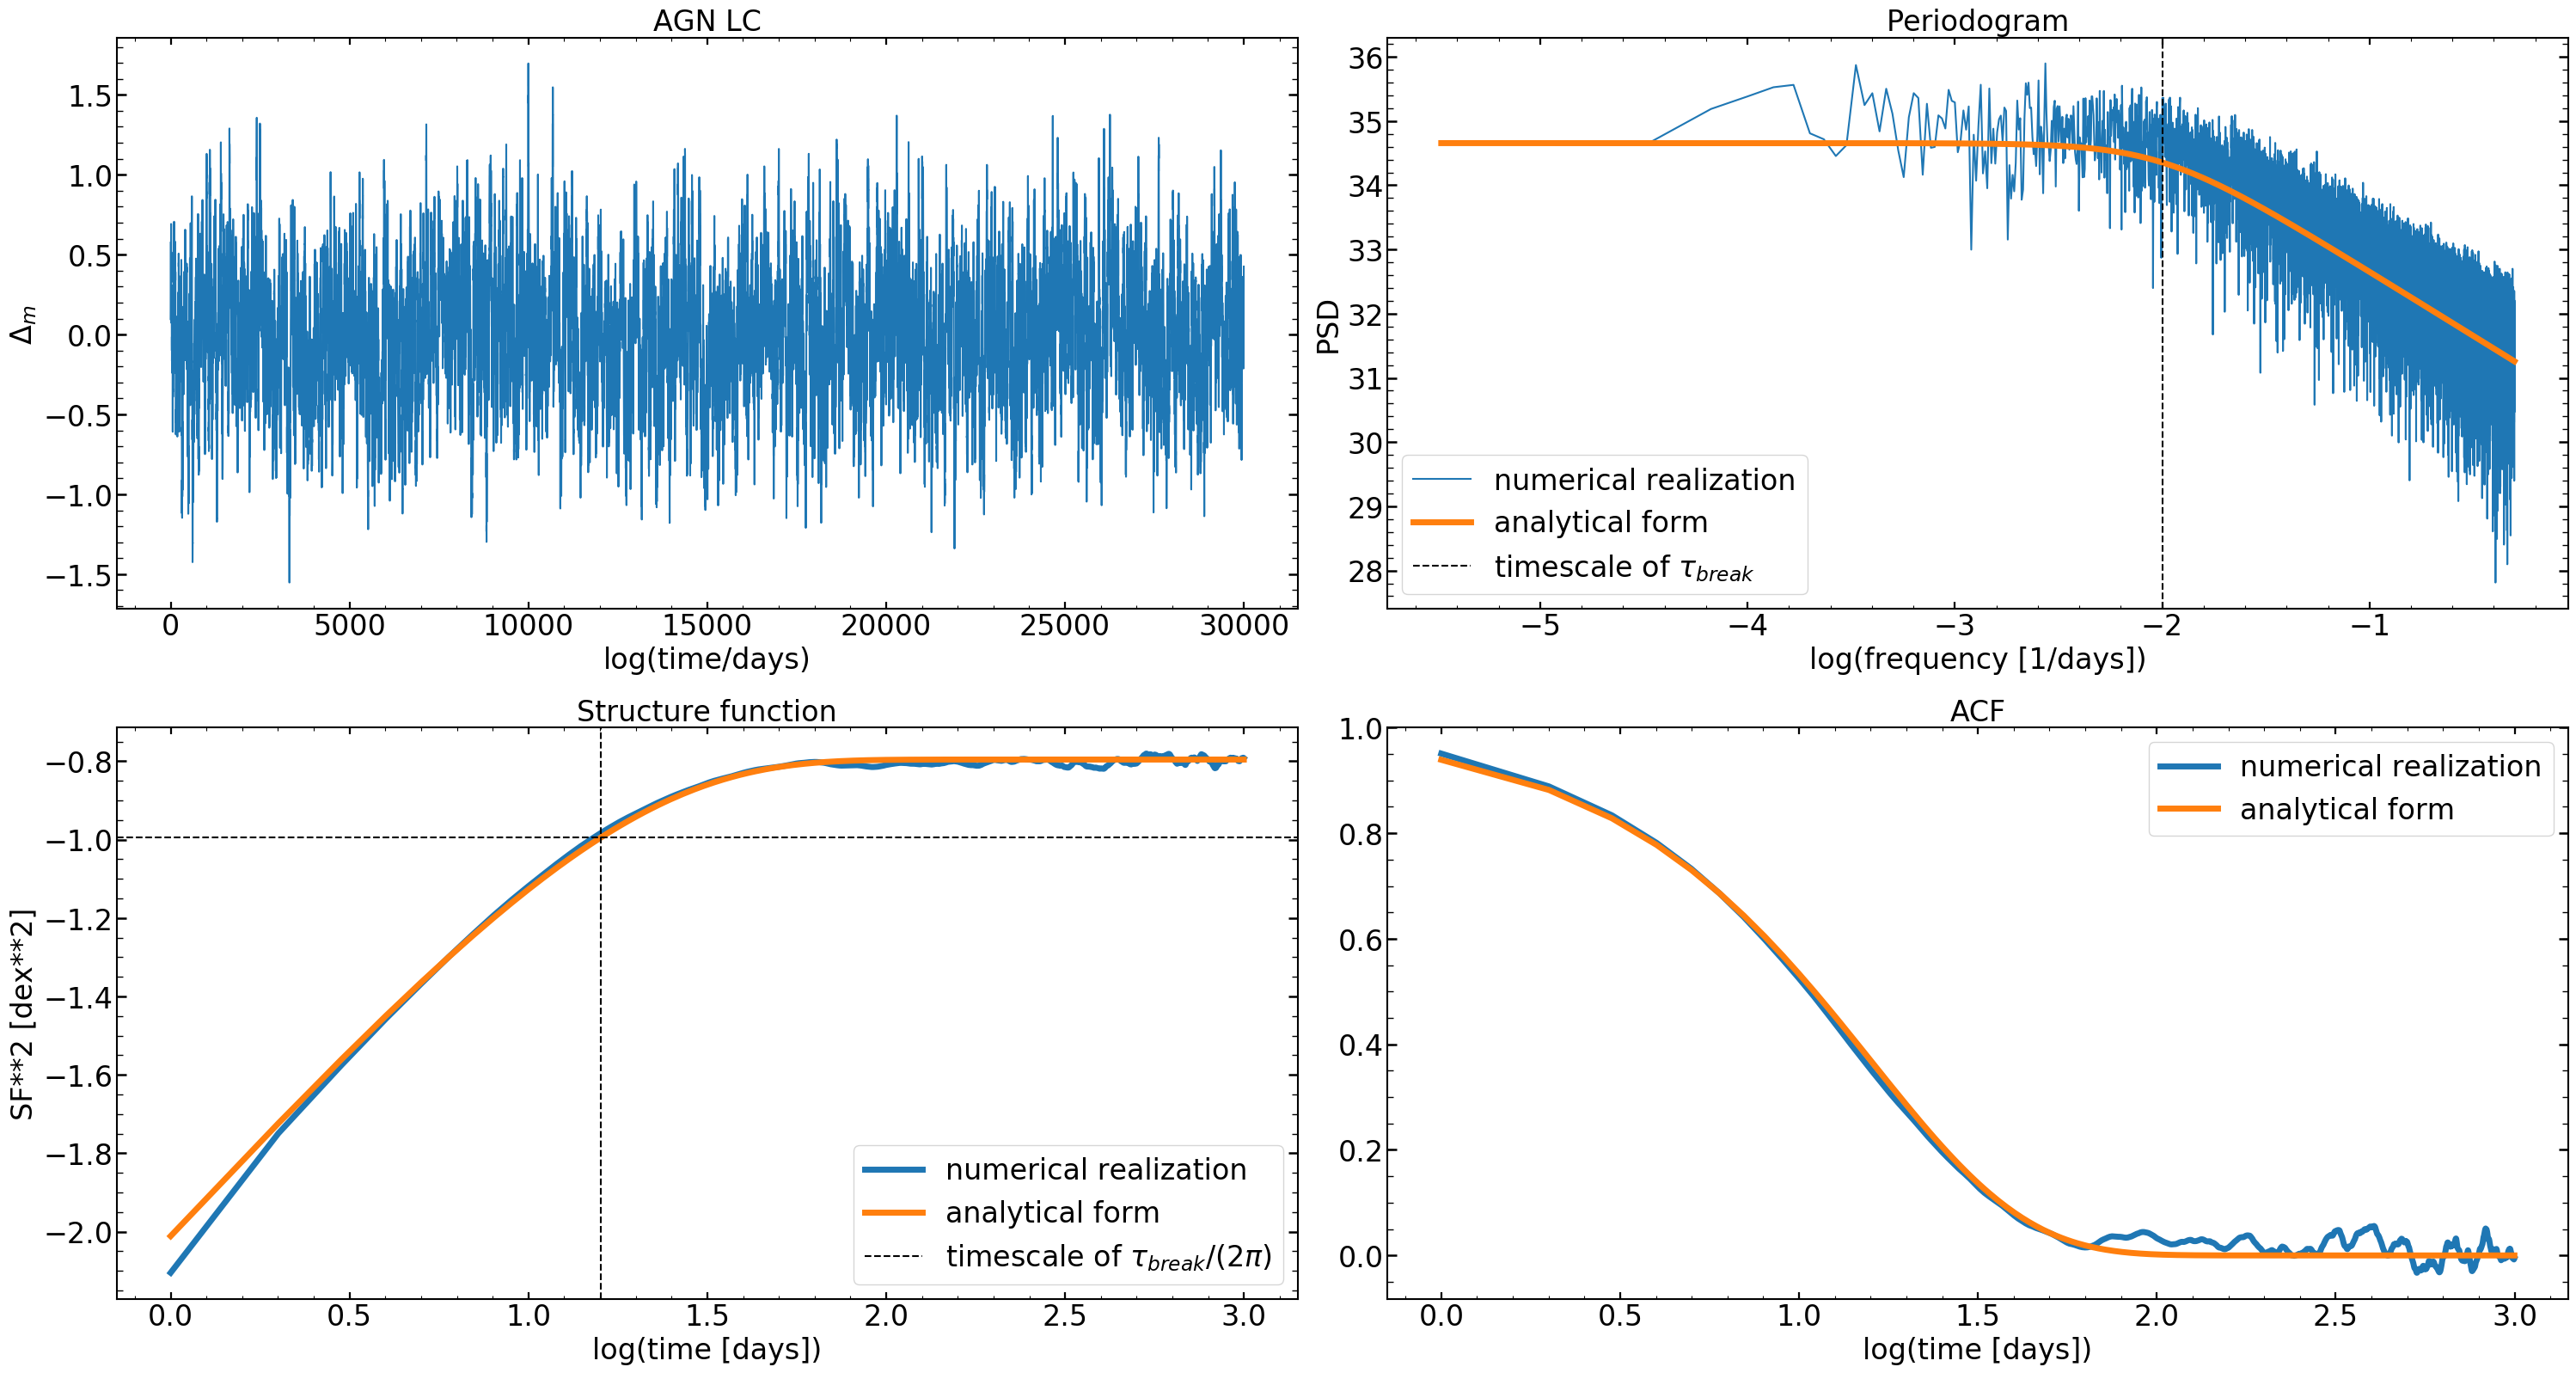

In [15]:
v_bend_Example1=1.0/(20)
# simulate the SFR history - we simulate very long history to not be senitive to potential aliasing (basically edge effects)
# and to fully probe stochastic process
delc =Simulate_TK_Lightcurve(BendingPL, (A,v_bend_Example1,a_low,a_high,0),RedNoiseL=1,aliasTbin=1,tbin = 1,length=30000,randomSeed=1234)
#Set scatter of the Main Sequence at 0.4 dex in this example
delc1=delc
delc_flux_Example1=0.4*delc.flux

# repeat the same procedure for a second example with different tau_break
v_bend_Example2=1.0/(100)
delc =Simulate_TK_Lightcurve(BendingPL, (A,v_bend_Example2,a_low,a_high,0),RedNoiseL=1,aliasTbin=1,tbin = 1,length=30000,randomSeed=1234)
delc2=delc
delc_flux_Example2=0.4*delc.flux

# repeat the same procedure for a third example with different tau_break
v_bend_Example3=1.0/(500)
delc =Simulate_TK_Lightcurve(BendingPL, (A,v_bend_Example3,a_low,a_high,0),RedNoiseL=1,aliasTbin=1,tbin = 1,length=300000,randomSeed=1234)
delc3=delc
delc_flux_Example3=0.4*delc.flux

#############################################
# Calculate explicit PSDs, that we will show on the final plot
frequency = np.arange(1.0, (300000)/2 +1)/ (300000)
explicit1=BendingPL(frequency,A,v_bend_Example1,a_low,a_high,0)
explicit2=BendingPL(frequency,A,v_bend_Example2,a_low,a_high,0)
explicit3=BendingPL(frequency,A,v_bend_Example3,a_low,a_high,0)

#############################################
# Calculate structure functions of the processes 
SFSquared2=[]
for i in range(1,1000):
    SFSquared2.append([i,np.var(delc_flux_Example2[1:-i]-delc_flux_Example2[i+1:])/2])   
SFSquared2=np.array(SFSquared2)
SFSquared3=[]
for i in range(1,1000):
    SFSquared3.append([i,np.var(delc_flux_Example3[1:-i]-delc_flux_Example3[i+1:])/2])   
SFSquared3=np.array(SFSquared3)

#############################################
# Calculate auto-correlation functions of the processes
ACF_estimated2=[]
for i in range(1,1000):
    ACF_estimated2.append([i,np.mean(delc_flux_Example2[1:-i]*delc_flux_Example2[i+1:])/(0.4**2)])   
ACF_estimated2=np.array(ACF_estimated2)

ACF_estimated3=[]
for i in range(1,1000):
    ACF_estimated3.append([i,np.mean(delc_flux_Example3[1:-i]*delc_flux_Example3[i+1:])/(0.4**2)])   
ACF_estimated3=np.array(ACF_estimated3)
#############################################
# Plot showing created AGN LC, the periodogram, the structure function and the ACF
# shown for the example with tau_{break} = 100, i.e., example 2
plt.figure(figsize=(30,16))
plt.subplot(221)
plt.plot(delc_flux_Example2)
plt.title('AGN LC')
plt.xlabel('log(time/days)')
plt.ylabel('$\\Delta_{m}$ ')

plt.subplot(222)
plt.plot(np.log10(delc2.periodogram[0]),np.log10(delc2.periodogram[1]),label='numerical realization')
plt.plot(np.log10(frequency),np.log10(explicit2)+np.log10(delc2.periodogram[1])[0]-np.log10(explicit2)[0],lw=5,label='analytical form')
plt.axvline(np.log10(v_bend_Example2),ls='--',color='black',label=r'timescale of $\tau_{break}$')
plt.title('Periodogram')
plt.xlabel('log(frequency [1/days])')
plt.ylabel('PSD')
plt.legend()

plt.subplot(223)
plt.plot(np.log10(SFSquared2[:,0]),np.log10(SFSquared2[:,1]),lw=5,label='numerical realization')
plt.plot(np.log10(range(1,1000)),np.log10(0.4**2*(1-np.exp(-np.array(range(1,1000))/(1/(v_bend_Example2*2*np.pi))))),lw=5,label='analytical form')
plt.axhline(np.log10(0.4**2*(1-np.exp(-1))),ls='--',color='black')
plt.axvline(np.log10((1/v_bend_Example2)/(2*np.pi)),ls='--',color='black',label=r'timescale of $\tau_{break} /(2 \pi)$')
plt.title('Structure function')
plt.xlabel('log(time [days])')
plt.ylabel('SF**2 [dex**2]')
plt.legend()

plt.subplot(224)
plt.plot(np.log10(ACF_estimated2[:,0]),ACF_estimated2[:,1],lw=5,label='numerical realization')
plt.plot(np.log10(range(1,1000)),np.exp(-np.array(range(1,1000))/(1/(v_bend_Example2*2*np.pi))),lw=5,label='analytical form')
plt.title('ACF')
plt.xlabel('log(time [days])')
plt.ylabel('')
plt.legend()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## LC_different_break_times

In [77]:
# run for combinations from 100 to 70000 in 10000 increments 
LC_different_break_times=[]
for PSD_break_time in tqdm(10**(np.arange(1,5.01,0.01))):
    # repeat the same procedure for a third example with different tau_break
    v_bend_Example3=1.0/(PSD_break_time)
    delc =Simulate_TK_Lightcurve(BendingPL, (A,v_bend_Example3,a_low,a_high,0),RedNoiseL=1,aliasTbin=1,tbin = 1,length=300000,randomSeed=1234)
    LC_different_break_times.append(delc.flux)
    
LC_different_break_times=np.array(LC_different_break_times)


  3%|▎         | 11/401 [00:01<01:06,  5.84it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/DELCgen.py:491: RuntimeWarning: divide by zero encountered in double_scalars
  (LClength*(np.mean(lightcurve)**2)))

  3%|▎         | 13/401 [00:02<01:05,  5.93it/s]
Exception in thread Thread-18:
Traceback (most recent call last):
  File "/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 401/401 [01:02<00:00,  6.38it/s]


In [78]:
LC_different_break_times=LC_different_break_times.astype('float32')

In [79]:
np.save('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/LC_different_break_times_log',LC_different_break_times)

In [81]:
times_in_LC_different_break_times=10**(np.arange(1,5.01,0.01))

## calculate_bias function

In [36]:
LC_different_break_times=np.load('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/LC_different_break_times_log.npy')

In [37]:
def calculate_bias(As,Bs,Cs,At,Bt,Ct,mes_position=0.5,time_restframe_between=16*365,luminosity_of_knee=45,restframe_wavelength=4770,primary_selection=None,secondary_selection=None):
    """
    # at the moment variabilityo only depends on luminosity 
    
    # parameters of variability 
    (At,Bt,Ct)                          tau of decorellation parameters, Equation 7 from MacLeod 2010
    (As,Bs,Cs)                          sigma parameters, Equation 7 from MacLeod 2010

    # parameters of measurment
    mes_position                        measured position relative to the knee (in log(Luminosity), e.g., 0.5)   
    time_restframe_between              time between primary and secondary survey (in rest-frame)    
    luminosity_of_knee                  log(Luminosity) of the knee of QLF (e.g., ``45'')
    restframe_wavelength                what is the restframe wavelength of the observation
    primary_selection                   cut of the primary survey (in full log(Luminosity), e.g., 45.5)
    secondary_selection                 cut of the secondary survey (not implemented yet)
    
    
    returns: intrinsic luminosity, luminosity in primary survey, luminosity in secondary survey
    """
    
    assert mes_position>-2 and mes_position<2
    
    # move the average so that you get realistic AGN luminosities
    full_log_Er_curve_as_L=luminosity_of_knee+full_log_Er_curve_cut
    
    # tau_application
    log_tau=At+Bt*np.log10(restframe_wavelength/4000)+Ct*(full_log_Er_curve_as_L-45)
    # calculate PSD break given the structure function time break
    PSD_break_time=(10**log_tau)*2*np.pi
    # ensure that the parameters that are put in the code are covered by our inputs
    assert np.min(PSD_break_time)>10 and np.max(PSD_break_time)<99000
     
    
    PSD_break_time_position=(np.round(np.log10(PSD_break_time),2)*100-100).astype(int)

    # sigma_application
    # for each position in full_log_Er_curve_as_L get the appropriate SF_inf
    # in MacLeod 2010+ this is given in units of mag
    # divide by 2.5 to go from mag to dex
    sigma=(10**(As+Bs*np.log10(restframe_wavelength/4000)+Cs*(full_log_Er_curve_as_L-45)))/2.5
    
    
    # which row in the `LC_different_break_times` corresponds to wanted PSD break - resolution is 100 days
    PSD_break_time_positions=(np.round(PSD_break_time/100)-1).astype(int)
    #print(PSD_break_time_position)
    

    # index for selecting lightcurve positions in primary survey
    # 300000 is the length of the created lightcurves
    index_for_changes_between_two_surveys_primary=np.random.randint(0,300000-time_restframe_between,len(full_log_Er_curve_as_L))
    # index for selecting lightcurve positions  in secondary survey
    index_for_changes_between_two_surveys_secondary=(index_for_changes_between_two_surveys_primary+time_restframe_between).astype(int)
    
    # measured brighntess of each AGN in the primary survey 
    full_log_Er_curve_primary=full_log_Er_curve_as_L\
    +(sigma)*LC_different_break_times[PSD_break_time_position,index_for_changes_between_two_surveys_primary]
    # measured brighntess of each AGN in the secondary survey
    full_log_Er_curve_secondary=full_log_Er_curve_as_L\
    +(sigma)*LC_different_break_times[PSD_break_time_position,index_for_changes_between_two_surveys_secondary]
    
   
    # intrinsic brigthness, binned using primary brightnes
    intrinsic=full_log_Er_curve_as_L[(full_log_Er_curve_primary<(luminosity_of_knee+mes_position+0.05))&(full_log_Er_curve_primary>(luminosity_of_knee+mes_position-0.05))]
    # data points from primary, binned using primary brightness
    primary_survey_at_mag_from_primary=full_log_Er_curve_primary[(full_log_Er_curve_primary<(luminosity_of_knee+mes_position+0.05))&(full_log_Er_curve_primary>(luminosity_of_knee+mes_position-0.05))]
    
    # effective SF_inf points from primary, binned using primary brightness
    SF_inf_at_mag_from_primary=sigma[(full_log_Er_curve_primary<(luminosity_of_knee+mes_position+0.05))&(full_log_Er_curve_primary>(luminosity_of_knee+mes_position-0.05))]
    
    # data points from secondary, binned using primary brightnes
    secondary_survey_at_mag_from_primary=full_log_Er_curve_secondary[(full_log_Er_curve_primary<(luminosity_of_knee+mes_position+0.05))&(full_log_Er_curve_primary>(luminosity_of_knee+mes_position-0.05))]
    

    if primary_selection is not None:
        # the AGNs will end up in the primary survey only if they were bright enough 
        full_log_Er_curve_primary_after_primary_selection=full_log_Er_curve_primary[full_log_Er_curve_primary>(primary_selection)]
        # the points will end up in the secondary survey only if they were bright enough in the primary survey
        full_log_Er_curve_secondary_after_primary_selection=full_log_Er_curve_secondary[full_log_Er_curve_primary>(primary_selection)]
        


        if secondary_selection is None:
            # primary survey in bins of magnitude from the secondary survey 
            primary_survey_at_mag_from_secondary=full_log_Er_curve_primary_after_primary_selection[(full_log_Er_curve_secondary_after_primary_selection<(luminosity_of_knee+mes_position+0.05))\
                                                                                                 &(full_log_Er_curve_secondary_after_primary_selection>(luminosity_of_knee+mes_position-0.05))]
            # secondary survey in bins of magnitude from the secondary survey 
            secondary_survey_at_mag_from_secondary=full_log_Er_curve_secondary_after_primary_selection[(full_log_Er_curve_secondary_after_primary_selection<(luminosity_of_knee+mes_position+0.05))\
                                                                                                 &(full_log_Er_curve_secondary_after_primary_selection>(luminosity_of_knee+mes_position-0.05))]

            #print(len(primary_survey_at_mag_from_primary))
            #print(len(secondary_survey_at_mag_from_primary))
            return [np.mean(intrinsic),np.mean(primary_survey_at_mag_from_primary),np.mean(secondary_survey_at_mag_from_primary),\
                    np.mean(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),
                    np.median(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),\
                    np.mean(primary_survey_at_mag_from_secondary),np.mean(secondary_survey_at_mag_from_secondary),np.mean(primary_survey_at_mag_from_secondary-secondary_survey_at_mag_from_secondary),\
                   primary_survey_at_mag_from_secondary,secondary_survey_at_mag_from_secondary,secondary_survey_at_mag_from_secondary-primary_survey_at_mag_from_secondary]

        if secondary_selection is not None:
            print('going into secondary')
            
            # the AGNs will end up in the primary survey only if they were bright enough in both primary AND secondary survey
            full_log_Er_curve_primary_after_primary_selection_and_secondary_selection=\
            full_log_Er_curve_primary_after_primary_selection[full_log_Er_curve_secondary_after_primary_selection>secondary_selection]
            # the AGNs will end up in the primary survey only if they were bright enough in both primary AND secondary survey
            full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection=\
            full_log_Er_curve_secondary_after_primary_selection[full_log_Er_curve_secondary_after_primary_selection>secondary_selection]
            #print(np.min(full_log_Er_curve_primary))
            
            
            # data points from primary, binned using primary brightness - they must have survived in both surveys
            primary_survey_at_mag_from_primary=full_log_Er_curve_primary_after_primary_selection_and_secondary_selection\
            [(full_log_Er_curve_primary_after_primary_selection_and_secondary_selection<(luminosity_of_knee+mes_position+0.05))\
             &(full_log_Er_curve_primary_after_primary_selection_and_secondary_selection>(luminosity_of_knee+mes_position-0.05))]

            primary_survey_at_mag_from_secondary=full_log_Er_curve_primary_after_primary_selection_and_secondary_selection\
            [(full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection<(luminosity_of_knee+mes_position+0.05))\
             &(full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection>(luminosity_of_knee+mes_position-0.05))]
            
            secondary_survey_at_mag_from_primary=full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection\
            [(full_log_Er_curve_primary_after_primary_selection_and_secondary_selection<(luminosity_of_knee+mes_position+0.05))\
            &(full_log_Er_curve_primary_after_primary_selection_and_secondary_selection>(luminosity_of_knee+mes_position-0.05))]
            
            secondary_survey_at_mag_from_secondary=full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection\
            [(full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection<(luminosity_of_knee+mes_position+0.05))\
            &(full_log_Er_curve_secondary_after_primary_selection_and_secondary_selection>(luminosity_of_knee+mes_position-0.05))]            
  
            return [np.mean(intrinsic),np.mean(primary_survey_at_mag_from_primary),np.mean(secondary_survey_at_mag_from_primary),\
                    np.mean(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),
                    np.median(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),\
                    np.mean(primary_survey_at_mag_from_secondary),np.mean(secondary_survey_at_mag_from_secondary),np.mean(primary_survey_at_mag_from_secondary-secondary_survey_at_mag_from_secondary),\
                   primary_survey_at_mag_from_secondary,secondary_survey_at_mag_from_secondary,secondary_survey_at_mag_from_secondary-primary_survey_at_mag_from_secondary]
    
    
    else:
        return [np.mean(intrinsic),np.mean(primary_survey_at_mag_from_primary),np.mean(secondary_survey_at_mag_from_primary),\
                np.mean(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),\
                np.median(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),\
                np.std(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),\
               scipy.stats.skew(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),\
               scipy.stats.kurtosis(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary),
               SF_inf_at_mag_from_primary,primary_survey_at_mag_from_primary,secondary_survey_at_mag_from_primary,\
               -0.741*(np.quantile(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary,0.25)-np.quantile(secondary_survey_at_mag_from_primary-primary_survey_at_mag_from_primary,0.75))]
        #return [intrinsic,primary_survey_at_mag_from_primary,secondary_survey_at_mag_from_primary]

In [38]:
As=-0.618
Bs=-0.479
# it is change of 0.09 in one unit of absolute magnitude, i.e., 2.5 larger for dex
Cs=-0.09*2.5
At=2.2
Bt=0.17
Ct=-0.01

In [39]:
# 0. mean intrinsic, 1. mean primary, 2. mean secondary. 3. mean difference (in dex), 4. median difference (in dex), 5. std dev (in dex), 6. skew (in dex), 7. kurtosis (in dex), 8. sigma (in dex)
# 9. primary mag, 10. secondary mag, 11. std from quantiles
z=2
test=calculate_bias(As=As,Bs=Bs,Cs=Cs,At=1.8*At,Bt=Bt,Ct=Ct,mes_position=-0.1,time_restframe_between=16*365/(1+z),luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None)
test

[46.47069833500554,
 46.49000199855575,
 46.48519028655227,
 -0.004811712003476617,
 -0.006908108937579982,
 0.049580471458898316,
 0.0041867668613695605,
 -0.42554559401446346,
 array([0.07670693, 0.07657833, 0.0777892 , ..., 0.07207774, 0.0789089 ,
        0.07859889]),
 array([46.51988466, 46.44695974, 46.5136864 , ..., 46.46456826,
        46.45149712, 46.47004106]),
 array([46.47488554, 46.39068825, 46.41149662, ..., 46.48969926,
        46.35387307, 46.42443894]),
 0.052093767792407354]

In [40]:
# %prun test=calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=-0.1,time_restframe_between=16*365/(1+z),luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None)

In [41]:
# 0. mean intrinsic, 1. mean primary, 2. mean secondary, 3. mean difference (in dex), 4. median difference (in dex),\
# 5. mean primary from secondary, 6. mean secondary from secondary, 7. mean difference from secondary
z=2
test=calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=-0.1,time_restframe_between=16*365/(1+z),\
                    luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=45,secondary_selection=None)
test

[46.470392850866645,
 46.490012948983896,
 46.470412603964704,
 -0.019600345019187983,
 -0.01826166440032395,
 46.47075762664086,
 46.490234859107424,
 -0.019477232466563025,
 array([46.28573834, 46.36614898, 46.29742935, ..., 46.34543932,
        46.26973428, 46.17888965]),
 array([46.4724579 , 46.46673928, 46.50193636, ..., 46.45309922,
        46.47183483, 46.44741985]),
 array([0.18671956, 0.1005903 , 0.20450701, ..., 0.1076599 , 0.20210055,
        0.26853021])]

(array([   56.,   904.,  4233., 10426., 12941.,  9855.,  4914.,  1447.,
          253.,    26.]),
 array([-0.32672929, -0.25100327, -0.17527724, -0.09955122, -0.02382519,
         0.05190083,  0.12762686,  0.20335288,  0.2790789 ,  0.35480493,
         0.43053095]),
 <a list of 10 Patch objects>)

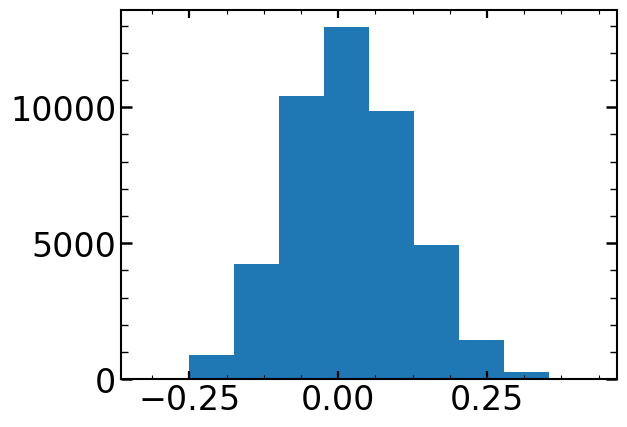

In [42]:
plt.hist(test[-1])

## pi redshift evolution 

In [508]:
luminosity_of_knee=log_Lstar(z)

In [88]:
MAIN_DIRECTORY='/Users/nevencaplar/Documents/Variability/NonStationarity'
DATA_DIRECTORY_ORIGINAL=MAIN_DIRECTORY+'/Data/'

In [89]:
median_lum_values_array=np.load('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/Data/median_lum_values_array.npy')
min_lum_values_array=np.load('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/Data/min_lum_values_array.npy')
res_redshift_array=np.load('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/Data/res_redshift_array.npy')

In [90]:
p0=np.poly1d(np.polyfit(res_redshift_array[1],median_lum_values_array[0],5))
p1=np.poly1d(np.polyfit(res_redshift_array[2],median_lum_values_array[1],5))
p2=np.poly1d(np.polyfit(res_redshift_array[3],median_lum_values_array[2],5))
p3=np.poly1d(np.polyfit(res_redshift_array[4],median_lum_values_array[3],5))
p4=np.poly1d(np.polyfit(res_redshift_array[5],median_lum_values_array[4],5))

pmin=np.poly1d(np.polyfit(res_redshift_array[5][:-1],min_lum_values_array[4][:-1],3))
# 0.2+pmin() - roughly the SDSS primary cut

B0_to_knee=[]
B1_to_knee=[]
B2_to_knee=[]
B3_to_knee=[]
B4_to_knee=[]
for z in np.arange(0.3,4,0.25):
    B0_to_knee.append(p0(z)-log_Lstar(z))
    B1_to_knee.append(p1(z)-log_Lstar(z))
    B2_to_knee.append(p2(z)-log_Lstar(z))
    B3_to_knee.append(p3(z)-log_Lstar(z))
    B4_to_knee.append(p4(z)-log_Lstar(z))

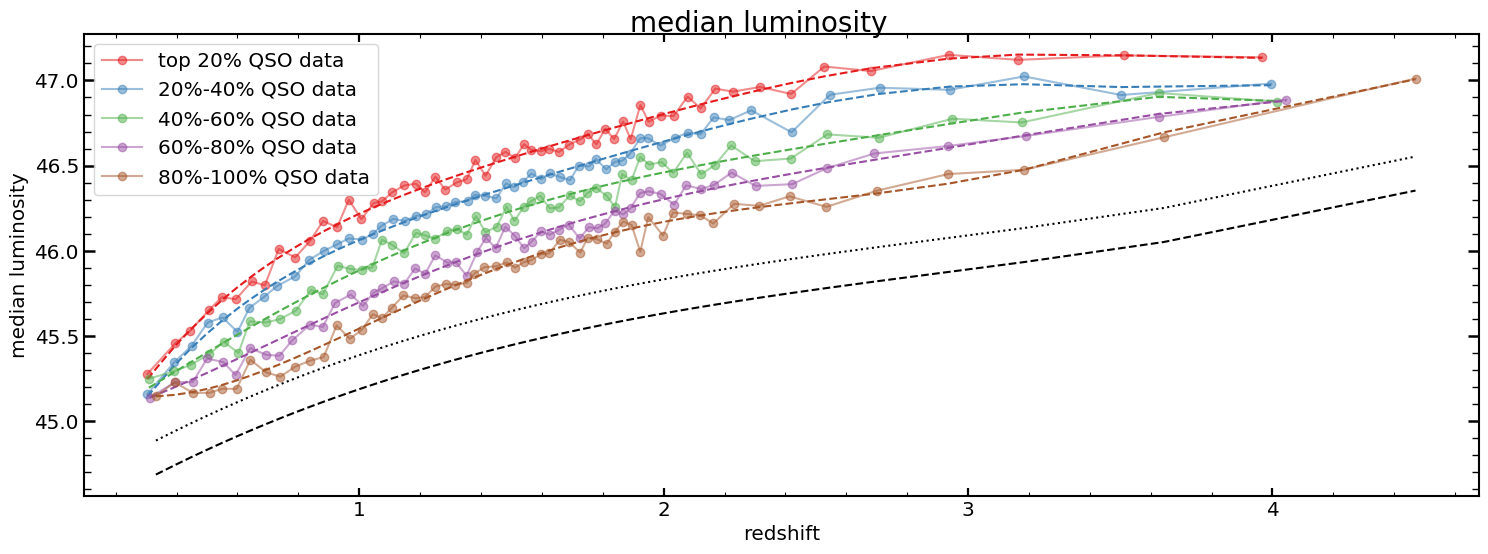

In [568]:
# Now, finally, lets look at the luminosity

matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(18,6))
plt.suptitle('median luminosity',y=0.92,fontsize=20)

plt.plot(res_redshift_array[1],median_lum_values_array[0],ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
plt.plot(res_redshift_array[1],p0(res_redshift_array[1]),ls='--',color='#e41a1c')

plt.plot(res_redshift_array[2],median_lum_values_array[1],ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
plt.plot(res_redshift_array[2],p1(res_redshift_array[2]),ls='--',color='#377eb8')

plt.plot(res_redshift_array[3],median_lum_values_array[2],ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
plt.plot(res_redshift_array[3],p2(res_redshift_array[3]),ls='--',color='#4daf4a')

plt.plot(res_redshift_array[4],median_lum_values_array[3],ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
plt.plot(res_redshift_array[4],p3(res_redshift_array[4]),ls='--',color='#984ea3')

plt.plot(res_redshift_array[5],median_lum_values_array[4],ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')
plt.plot(res_redshift_array[5],p4(res_redshift_array[5]),ls='--',color='#a65628')

#plt.plot(res_redshift_array[5][:-1],min_lum_values_array[4][:-1])
plt.plot(res_redshift_array[5],pmin(res_redshift_array[5]),ls='--',color='black')
plt.plot(res_redshift_array[5],0.2+pmin(res_redshift_array[5]),ls=':',color='black')

plt.ylabel('median luminosity')
plt.xlabel('redshift')
plt.legend()


## semi-recreation of section 1 

In [43]:
# calculate bias
b0=[]
b1=[]
b2=[]
b3=[]
b4=[]

z=2

At=3
# Tau is 1000 days

for mes_position in tqdm(np.arange(-1.45,1.45,0.1)):
    b0.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=100,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=500,\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=1000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=2000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))  
    b4.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=10000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0=np.array(b0)
b1=np.array(b1)
b2=np.array(b2)
b3=np.array(b3)
b4=np.array(b4)

100%|██████████| 29/29 [01:32<00:00,  3.19s/it]


In [45]:
b0_primary=[]
b1_primary=[]
b2_primary=[]
b3_primary=[]
b4_primary=[]
for mes_position in tqdm(np.arange(-1.45,1.45,0.1)):
    b0_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=100,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b1_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=500,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b2_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=1000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b3_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=2000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b4_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=10000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
b0_primary=np.array(b0_primary)
b1_primary=np.array(b1_primary)
b2_primary=np.array(b2_primary)
b3_primary=np.array(b3_primary)
b4_primary=np.array(b4_primary)

  0%|          | 0/29 [00:00<?, ?it/s]/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 29/29 [01:32<00:00,  3.19s/it]


In [46]:
print(10**(-0.5228))
sigma=(10**(As))/2.5
sigma

0.3000544002443094


0.0963962171474638

(-1.5, 1.5)

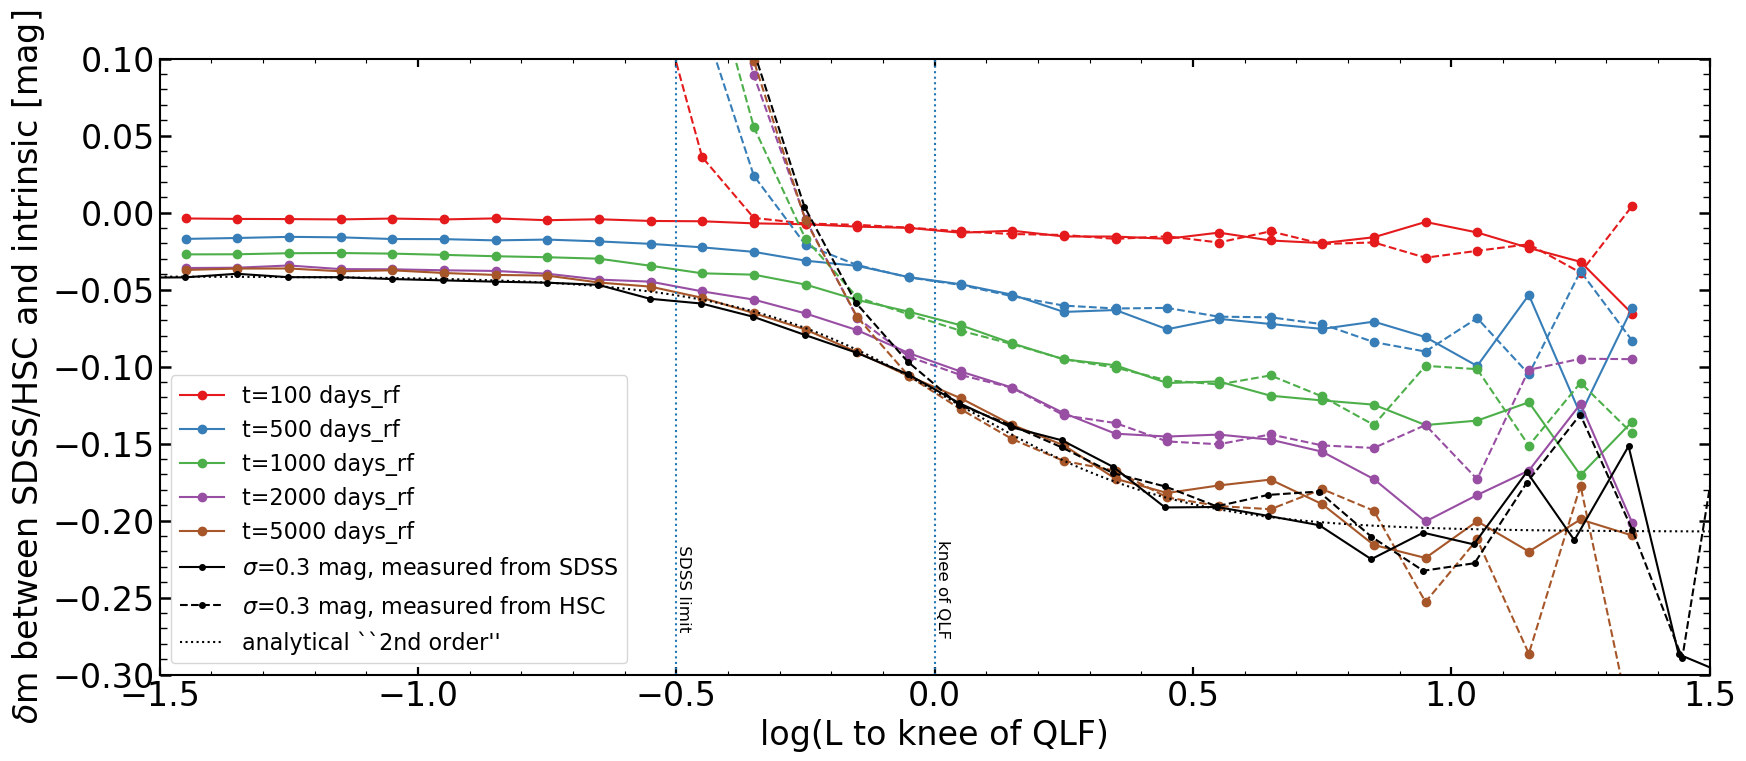

In [51]:
plt.figure(figsize=(20,8))

plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b0[:,3]),ls='-',color='#e41a1c',alpha=1,label='t=100 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b1[:,3]),ls='-',color='#377eb8',alpha=1,label='t=500 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b2[:,3]),ls='-',color='#4daf4a',alpha=1,label='t=1000 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b3[:,3]),ls='-',color='#984ea3',alpha=1,label='t=2000 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b4[:,3]),ls='-',color='#a65628',alpha=1,label='t=5000 days_rf',marker='o')

plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b0_primary[:,7]),ls='--',color='#e41a1c',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b1_primary[:,7]),ls='--',color='#377eb8',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b2_primary[:,7]),ls='--',color='#4daf4a',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b3_primary[:,7]),ls='--',color='#984ea3',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b4_primary[:,7]),ls='--',color='#a65628',alpha=1,marker='o')


plt.axvline(-0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=-0.5,y=-0.22,s=' SDSS limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.22,s='knee of QLF',rotation=-90.,fontsize=12)



# sigma=0.3
# HSC from SDSS
#plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
#         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
#plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
#         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)


# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='black', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='black',ls='--', markersize=4)

#plt.plot(np.arange(-2,2,0.01),bias_analytical,color='gray')
plt.plot(np.arange(-2,2,0.01),bias_analytical_2,color='black',ls=':',label='analytical ``2nd order\'\' ')

plt.legend(fontsize=16)
plt.xlabel('log(L to knee of QLF)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.3,0.1)
plt.xlim(-1.5,1.5)

## include secondary cut 

In [217]:
# calculate bias
b0=[]
b1=[]
b2=[]
b3=[]
b4=[]

z=2

At=3
# Tau is 1000 days

for mes_position in tqdm(np.arange(-1.45,1.45,0.1)):
    b0.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=100,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=500,\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=1000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=2000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))  
    b4.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=10000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0=np.array(b0)
b1=np.array(b1)
b2=np.array(b2)
b3=np.array(b3)
b4=np.array(b4)

100%|██████████| 29/29 [01:33<00:00,  3.22s/it]


In [ ]:
b0_primary=[]
b1_primary=[]
b2_primary=[]
b3_primary=[]
b4_primary=[]
for mes_position in tqdm(np.arange(-1.45,1.45,0.1)):
    b0_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=100,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b1_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=500,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b2_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=1000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b3_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=2000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
    b4_primary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=10000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=None))
b0_primary=np.array(b0_primary)
b1_primary=np.array(b1_primary)
b2_primary=np.array(b2_primary)
b3_primary=np.array(b3_primary)
b4_primary=np.array(b4_primary)

In [236]:
b0_secondary=[]
b1_secondary=[]
b2_secondary=[]
b3_secondary=[]
b4_secondary=[]
for mes_position in tqdm(np.arange(-1.45,1.45,0.1)):
    b0_secondary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=100,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=log_Lstar(z)-0.5))
    b1_secondary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=500,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=log_Lstar(z)-0.5))
    b2_secondary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=1000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=log_Lstar(z)-0.5))
    b3_secondary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=2000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=log_Lstar(z)-0.5))
    b4_secondary.append(calculate_bias(As=-0.5228,Bs=0,Cs=0,At=At,Bt=0,Ct=0,mes_position=mes_position,time_restframe_between=10000,\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=log_Lstar(z)-0.5,secondary_selection=log_Lstar(z)-0.5))
b0_secondary=np.array(b0_secondary)
b1_secondary=np.array(b1_secondary)
b2_secondary=np.array(b2_secondary)
b3_secondary=np.array(b3_secondary)
b4_secondary=np.array(b4_secondary)

  0%|          | 0/29 [00:00<?, ?it/s]

going into secondary


/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


going into secondary
going into secondary
going into secondary


  3%|▎         | 1/29 [00:03<01:36,  3.43s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


  7%|▋         | 2/29 [00:06<01:34,  3.49s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 10%|█         | 3/29 [00:11<01:39,  3.84s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 14%|█▍        | 4/29 [00:15<01:39,  4.00s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 17%|█▋        | 5/29 [00:19<01:33,  3.89s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 21%|██        | 6/29 [00:22<01:26,  3.76s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 24%|██▍       | 7/29 [00:25<01:20,  3.67s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 28%|██▊       | 8/29 [00:28<01:15,  3.60s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 31%|███       | 9/29 [00:31<01:10,  3.54s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 34%|███▍      | 10/29 [00:35<01:06,  3.51s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 38%|███▊      | 11/29 [00:38<01:02,  3.49s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 41%|████▏     | 12/29 [00:41<00:59,  3.48s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 45%|████▍     | 13/29 [00:46<00:56,  3.54s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 48%|████▊     | 14/29 [00:49<00:53,  3.53s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 52%|█████▏    | 15/29 [00:52<00:49,  3.52s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 55%|█████▌    | 16/29 [00:56<00:45,  3.50s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 59%|█████▊    | 17/29 [00:59<00:41,  3.49s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 62%|██████▏   | 18/29 [01:02<00:38,  3.48s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 66%|██████▌   | 19/29 [01:06<00:34,  3.48s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 69%|██████▉   | 20/29 [01:09<00:31,  3.47s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 72%|███████▏  | 21/29 [01:12<00:27,  3.44s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 76%|███████▌  | 22/29 [01:15<00:24,  3.43s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 79%|███████▉  | 23/29 [01:19<00:20,  3.45s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 83%|████████▎ | 24/29 [01:22<00:17,  3.45s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 86%|████████▌ | 25/29 [01:26<00:13,  3.46s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 90%|████████▉ | 26/29 [01:30<00:10,  3.46s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 93%|█████████▎| 27/29 [01:33<00:06,  3.45s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


 97%|█████████▋| 28/29 [01:36<00:03,  3.43s/it]

going into secondary
going into secondary
going into secondary
going into secondary
going into secondary


100%|██████████| 29/29 [01:38<00:00,  3.41s/it]

going into secondary


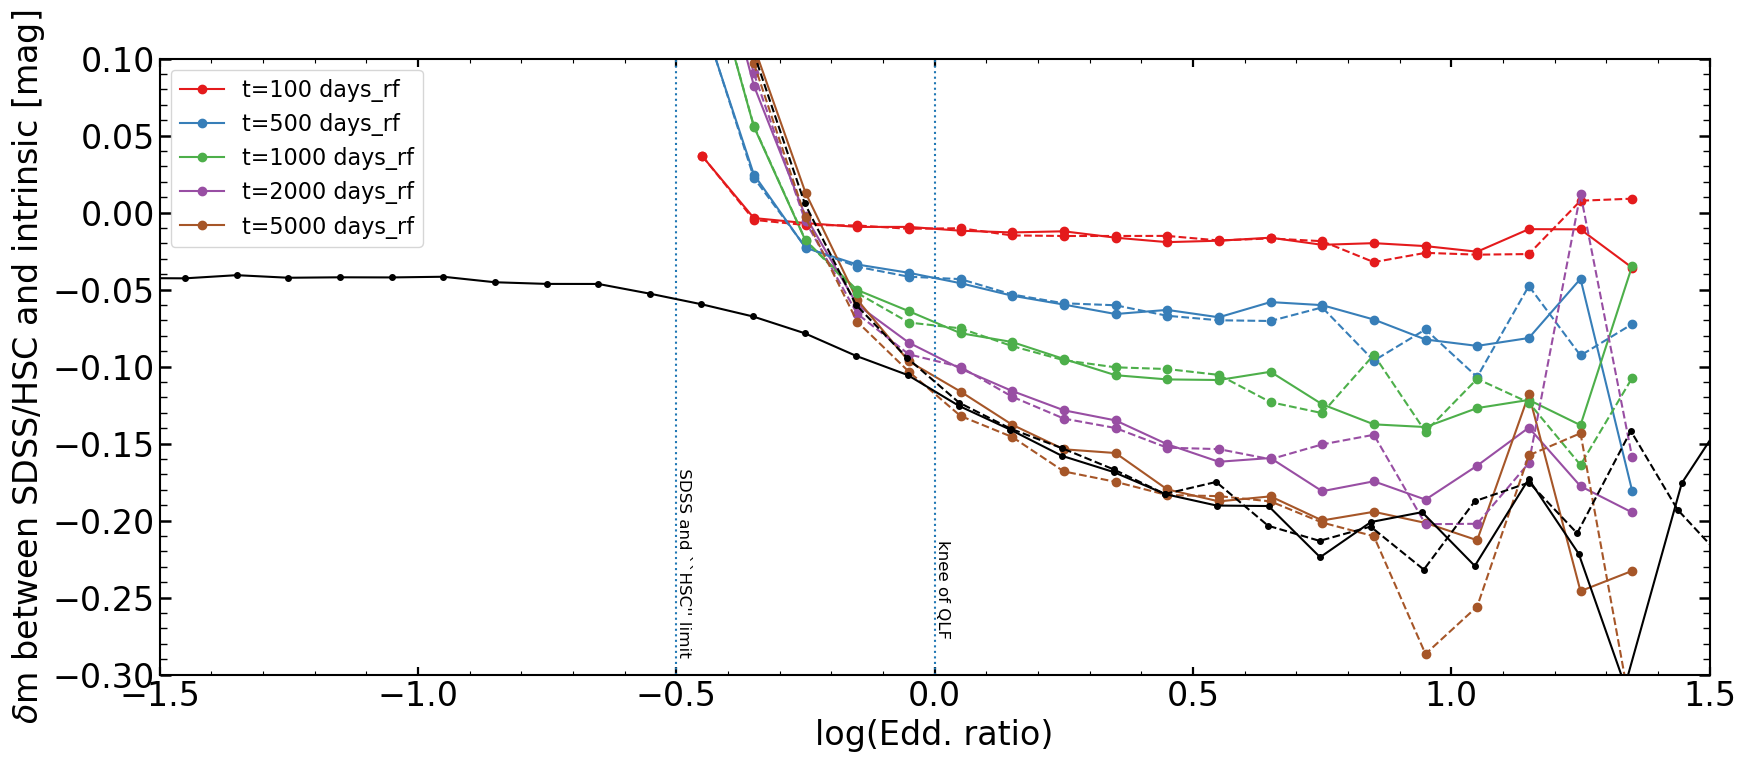

In [237]:
plt.figure(figsize=(20,8))

plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b0_secondary[:,3]),ls='-',color='#e41a1c',alpha=1,label='t=100 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b1_secondary[:,3]),ls='-',color='#377eb8',alpha=1,label='t=500 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b2_secondary[:,3]),ls='-',color='#4daf4a',alpha=1,label='t=1000 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b3_secondary[:,3]),ls='-',color='#984ea3',alpha=1,label='t=2000 days_rf',marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b4_secondary[:,3]),ls='-',color='#a65628',alpha=1,label='t=5000 days_rf',marker='o')

plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b0_secondary[:,7]),ls='--',color='#e41a1c',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b1_secondary[:,7]),ls='--',color='#377eb8',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b2_secondary[:,7]),ls='--',color='#4daf4a',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b3_secondary[:,7]),ls='--',color='#984ea3',alpha=1,marker='o')
plt.plot(np.arange(-1.45,1.45,0.1),2.5*(b4_secondary[:,7]),ls='--',color='#a65628',alpha=1,marker='o')


plt.axvline(-0.5,ls=':')
plt.axvline(0,ls=':')
plt.text(x=-0.5,y=-0.17,s=' SDSS and ``HSC\'\' limit',rotation=-90.,fontsize=12)
plt.text(x=-0,y=-0.22,s='knee of QLF',rotation=-90.,fontsize=12)

plt.legend(fontsize=16)
plt.xlabel('log(Edd. ratio)')
plt.ylabel('$\delta$m between SDSS/HSC and intrinsic [mag]')
plt.ylim(-0.3,0.1)
plt.xlim(-1.5,1.5)

# sigma=0.3
# HSC from SDSS
#plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
#         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='green', markersize=4)
# SDSS from HSC
#plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
#         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='green',ls='--', markersize=4)


# sigma=0.3
# HSC from SDSS
plt.plot(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0],-2.5*(Edd_bin_len_SDSS_from_SDSS_many_delta[5][:,0]-Edd_bin_len_HSC_from_SDSS_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from SDSS',color='black', markersize=4)
# SDSS from HSC
plt.plot(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0],-2.5*(Edd_bin_len_HSC_from_HSC_many_delta[5][:,0]-Edd_bin_len_SDSS_from_HSC_many_delta[5][:,0]),\
         marker='o',label='$\sigma$=0.3 mag, measured from HSC',color='black',ls='--', markersize=4)

#plt.plot(np.arange(-2,2,0.01),bias_analytical,color='gray')
#plt.plot(np.arange(-2,2,0.01),bias_analytical_2,color='gray')

#plt.plot(np.arange(-2,2,0.01),bias_analytical_2_reduced,color='gray')

## cut and sigma constant, tau_sf changes  - have to update code

In [120]:


bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=3000,sigma=0.3/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
    
bias_measured_at_many_z=np.array(bias_measured_at_many_z)

100%|██████████| 38/38 [00:08<00:00,  4.62it/s]


In [135]:
bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*1,sigma=0.3/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)  
bias_measured_at_many_z_1=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*3,sigma=0.3/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)  
bias_measured_at_many_z_3=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*6,sigma=0.3/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
bias_measured_at_many_z_6=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*12,sigma=0.3/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
bias_measured_at_many_z_12=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*24,sigma=0.3/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
bias_measured_at_many_z_24=np.array(bias_measured_at_many_z)

  0%|          | 0/38 [00:00<?, ?it/s]

2293.362637120549


  3%|▎         | 1/38 [00:00<00:11,  3.14it/s]

2293.362637120549


  5%|▌         | 2/38 [00:00<00:09,  3.66it/s]

2293.362637120549


  8%|▊         | 3/38 [00:00<00:09,  3.88it/s]

2293.362637120549


 11%|█         | 4/38 [00:00<00:08,  4.05it/s]

2293.362637120549


 13%|█▎        | 5/38 [00:01<00:07,  4.17it/s]

2293.362637120549


 16%|█▌        | 6/38 [00:01<00:07,  4.26it/s]

2293.362637120549


 18%|█▊        | 7/38 [00:01<00:07,  4.31it/s]

2293.362637120549


 21%|██        | 8/38 [00:01<00:06,  4.37it/s]

2293.362637120549


 24%|██▎       | 9/38 [00:02<00:06,  4.42it/s]

2293.362637120549


 26%|██▋       | 10/38 [00:02<00:06,  4.46it/s]

2293.362637120549


 29%|██▉       | 11/38 [00:02<00:06,  4.49it/s]

2293.362637120549


 32%|███▏      | 12/38 [00:02<00:05,  4.52it/s]

2293.362637120549


 34%|███▍      | 13/38 [00:02<00:05,  4.53it/s]

2293.362637120549


 37%|███▋      | 14/38 [00:03<00:05,  4.55it/s]

2293.362637120549


 39%|███▉      | 15/38 [00:03<00:05,  4.57it/s]

2293.362637120549


 42%|████▏     | 16/38 [00:03<00:04,  4.58it/s]

2293.362637120549


 45%|████▍     | 17/38 [00:03<00:04,  4.59it/s]

2293.362637120549


 47%|████▋     | 18/38 [00:03<00:04,  4.60it/s]

2293.362637120549


 50%|█████     | 19/38 [00:04<00:04,  4.62it/s]

2293.362637120549


 53%|█████▎    | 20/38 [00:04<00:03,  4.63it/s]

2293.362637120549


 55%|█████▌    | 21/38 [00:04<00:03,  4.64it/s]

2293.362637120549


 58%|█████▊    | 22/38 [00:04<00:03,  4.65it/s]

2293.362637120549


 61%|██████    | 23/38 [00:04<00:03,  4.66it/s]

2293.362637120549


 66%|██████▌   | 25/38 [00:05<00:02,  4.67it/s]

2293.362637120549


 68%|██████▊   | 26/38 [00:05<00:02,  4.67it/s]

2293.362637120549
2293.362637120549


 71%|███████   | 27/38 [00:05<00:02,  4.68it/s]

2293.362637120549


 74%|███████▎  | 28/38 [00:06<00:02,  4.67it/s]

2293.362637120549


 76%|███████▋  | 29/38 [00:06<00:01,  4.66it/s]

2293.362637120549


 79%|███████▉  | 30/38 [00:06<00:01,  4.64it/s]

2293.362637120549


 82%|████████▏ | 31/38 [00:06<00:01,  4.64it/s]

2293.362637120549


 84%|████████▍ | 32/38 [00:06<00:01,  4.63it/s]

2293.362637120549


 87%|████████▋ | 33/38 [00:07<00:01,  4.63it/s]

2293.362637120549


 89%|████████▉ | 34/38 [00:07<00:00,  4.63it/s]

2293.362637120549


 92%|█████████▏| 35/38 [00:07<00:00,  4.64it/s]

2293.362637120549


 95%|█████████▍| 36/38 [00:07<00:00,  4.63it/s]

2293.362637120549


 97%|█████████▋| 37/38 [00:08<00:00,  4.62it/s]

2293.362637120549


  0%|          | 0/38 [00:00<?, ?it/s]

6880.087911361647


  3%|▎         | 1/38 [00:00<00:07,  4.72it/s]

6880.087911361647


  5%|▌         | 2/38 [00:00<00:07,  4.75it/s]

6880.087911361647


  8%|▊         | 3/38 [00:00<00:07,  4.73it/s]

6880.087911361647


 11%|█         | 4/38 [00:00<00:07,  4.77it/s]

6880.087911361647


 13%|█▎        | 5/38 [00:01<00:06,  4.79it/s]

6880.087911361647


 16%|█▌        | 6/38 [00:01<00:06,  4.79it/s]

6880.087911361647


 18%|█▊        | 7/38 [00:01<00:06,  4.78it/s]

6880.087911361647


 21%|██        | 8/38 [00:01<00:06,  4.74it/s]

6880.087911361647


 24%|██▎       | 9/38 [00:01<00:06,  4.76it/s]

6880.087911361647


 26%|██▋       | 10/38 [00:02<00:05,  4.74it/s]

6880.087911361647


 29%|██▉       | 11/38 [00:02<00:05,  4.74it/s]

6880.087911361647


 32%|███▏      | 12/38 [00:02<00:05,  4.70it/s]

6880.087911361647


 37%|███▋      | 14/38 [00:02<00:05,  4.72it/s]

6880.087911361647


 39%|███▉      | 15/38 [00:03<00:04,  4.70it/s]

6880.087911361647
6880.087911361647


 42%|████▏     | 16/38 [00:03<00:04,  4.67it/s]

6880.087911361647


 45%|████▍     | 17/38 [00:03<00:04,  4.66it/s]

6880.087911361647


 47%|████▋     | 18/38 [00:03<00:04,  4.66it/s]

6880.087911361647


 50%|█████     | 19/38 [00:04<00:04,  4.65it/s]

6880.087911361647


 53%|█████▎    | 20/38 [00:04<00:03,  4.64it/s]

6880.087911361647


 55%|█████▌    | 21/38 [00:04<00:03,  4.65it/s]

6880.087911361647


 58%|█████▊    | 22/38 [00:04<00:03,  4.64it/s]

6880.087911361647


 61%|██████    | 23/38 [00:04<00:03,  4.64it/s]

6880.087911361647


 63%|██████▎   | 24/38 [00:05<00:03,  4.61it/s]

6880.087911361647


 66%|██████▌   | 25/38 [00:05<00:02,  4.61it/s]

6880.087911361647


 68%|██████▊   | 26/38 [00:05<00:02,  4.61it/s]

6880.087911361647


 71%|███████   | 27/38 [00:05<00:02,  4.61it/s]

6880.087911361647


 74%|███████▎  | 28/38 [00:06<00:02,  4.62it/s]

6880.087911361647


 76%|███████▋  | 29/38 [00:06<00:01,  4.61it/s]

6880.087911361647


 79%|███████▉  | 30/38 [00:06<00:01,  4.61it/s]

6880.087911361647


 82%|████████▏ | 31/38 [00:06<00:01,  4.62it/s]

6880.087911361647


 84%|████████▍ | 32/38 [00:06<00:01,  4.63it/s]

6880.087911361647


 87%|████████▋ | 33/38 [00:07<00:01,  4.62it/s]

6880.087911361647


 89%|████████▉ | 34/38 [00:07<00:00,  4.62it/s]

6880.087911361647


 92%|█████████▏| 35/38 [00:07<00:00,  4.63it/s]

6880.087911361647


 95%|█████████▍| 36/38 [00:07<00:00,  4.63it/s]

6880.087911361647


 97%|█████████▋| 37/38 [00:07<00:00,  4.64it/s]

6880.087911361647


  0%|          | 0/38 [00:00<?, ?it/s]

13760.175822723293


  3%|▎         | 1/38 [00:00<00:07,  4.69it/s]

13760.175822723293


  5%|▌         | 2/38 [00:00<00:07,  4.65it/s]

13760.175822723293


  8%|▊         | 3/38 [00:00<00:07,  4.68it/s]

13760.175822723293


 11%|█         | 4/38 [00:00<00:07,  4.72it/s]

13760.175822723293


 13%|█▎        | 5/38 [00:01<00:06,  4.74it/s]

13760.175822723293


 16%|█▌        | 6/38 [00:01<00:06,  4.74it/s]

13760.175822723293


 18%|█▊        | 7/38 [00:01<00:06,  4.73it/s]

13760.175822723293


 21%|██        | 8/38 [00:01<00:06,  4.75it/s]

13760.175822723293


 24%|██▎       | 9/38 [00:01<00:06,  4.73it/s]

13760.175822723293


 26%|██▋       | 10/38 [00:02<00:05,  4.71it/s]

13760.175822723293


 29%|██▉       | 11/38 [00:02<00:05,  4.72it/s]

13760.175822723293


 32%|███▏      | 12/38 [00:02<00:05,  4.60it/s]

13760.175822723293


 34%|███▍      | 13/38 [00:02<00:05,  4.59it/s]

13760.175822723293


 37%|███▋      | 14/38 [00:03<00:05,  4.60it/s]

13760.175822723293


 39%|███▉      | 15/38 [00:03<00:04,  4.62it/s]

13760.175822723293


 42%|████▏     | 16/38 [00:03<00:04,  4.63it/s]

13760.175822723293


 45%|████▍     | 17/38 [00:03<00:04,  4.64it/s]

13760.175822723293


 47%|████▋     | 18/38 [00:03<00:04,  4.66it/s]

13760.175822723293


 50%|█████     | 19/38 [00:04<00:04,  4.67it/s]

13760.175822723293


 53%|█████▎    | 20/38 [00:04<00:03,  4.68it/s]

13760.175822723293


 55%|█████▌    | 21/38 [00:04<00:03,  4.68it/s]

13760.175822723293


 58%|█████▊    | 22/38 [00:04<00:03,  4.69it/s]

13760.175822723293


 61%|██████    | 23/38 [00:04<00:03,  4.70it/s]

13760.175822723293


 63%|██████▎   | 24/38 [00:05<00:02,  4.70it/s]

13760.175822723293


 66%|██████▌   | 25/38 [00:05<00:02,  4.71it/s]

13760.175822723293


 68%|██████▊   | 26/38 [00:05<00:02,  4.66it/s]

13760.175822723293


 71%|███████   | 27/38 [00:05<00:02,  4.65it/s]

13760.175822723293


 74%|███████▎  | 28/38 [00:06<00:02,  4.65it/s]

13760.175822723293


 76%|███████▋  | 29/38 [00:06<00:01,  4.60it/s]

13760.175822723293


 79%|███████▉  | 30/38 [00:06<00:01,  4.56it/s]

13760.175822723293


 82%|████████▏ | 31/38 [00:06<00:01,  4.53it/s]

13760.175822723293


 84%|████████▍ | 32/38 [00:07<00:01,  4.50it/s]

13760.175822723293


 87%|████████▋ | 33/38 [00:07<00:01,  4.51it/s]

13760.175822723293


 89%|████████▉ | 34/38 [00:07<00:00,  4.52it/s]

13760.175822723293


 92%|█████████▏| 35/38 [00:07<00:00,  4.53it/s]

13760.175822723293


 95%|█████████▍| 36/38 [00:07<00:00,  4.54it/s]

13760.175822723293


 97%|█████████▋| 37/38 [00:08<00:00,  4.55it/s]

13760.175822723293


  0%|          | 0/38 [00:00<?, ?it/s]

27520.351645446586


  3%|▎         | 1/38 [00:00<00:07,  4.72it/s]

27520.351645446586


  5%|▌         | 2/38 [00:00<00:07,  4.76it/s]

27520.351645446586


  8%|▊         | 3/38 [00:00<00:07,  4.68it/s]

27520.351645446586


 11%|█         | 4/38 [00:00<00:07,  4.52it/s]

27520.351645446586


 16%|█▌        | 6/38 [00:01<00:06,  4.65it/s]

27520.351645446586
27520.351645446586


 18%|█▊        | 7/38 [00:01<00:06,  4.69it/s]

27520.351645446586


 21%|██        | 8/38 [00:01<00:06,  4.70it/s]

27520.351645446586


 24%|██▎       | 9/38 [00:01<00:06,  4.66it/s]

27520.351645446586


 29%|██▉       | 11/38 [00:02<00:05,  4.68it/s]

27520.351645446586


 32%|███▏      | 12/38 [00:02<00:05,  4.70it/s]

27520.351645446586
27520.351645446586


 34%|███▍      | 13/38 [00:02<00:05,  4.71it/s]

27520.351645446586


 39%|███▉      | 15/38 [00:03<00:04,  4.73it/s]

27520.351645446586
27520.351645446586


 42%|████▏     | 16/38 [00:03<00:04,  4.74it/s]

27520.351645446586


 45%|████▍     | 17/38 [00:03<00:04,  4.75it/s]

27520.351645446586


 47%|████▋     | 18/38 [00:03<00:04,  4.73it/s]

27520.351645446586


 50%|█████     | 19/38 [00:04<00:04,  4.71it/s]

27520.351645446586


 55%|█████▌    | 21/38 [00:04<00:03,  4.73it/s]

27520.351645446586
27520.351645446586


 58%|█████▊    | 22/38 [00:04<00:03,  4.73it/s]

27520.351645446586


 61%|██████    | 23/38 [00:04<00:03,  4.73it/s]

27520.351645446586


 63%|██████▎   | 24/38 [00:05<00:02,  4.72it/s]

27520.351645446586


 66%|██████▌   | 25/38 [00:05<00:02,  4.73it/s]

27520.351645446586


 68%|██████▊   | 26/38 [00:05<00:02,  4.73it/s]

27520.351645446586


 71%|███████   | 27/38 [00:05<00:02,  4.74it/s]

27520.351645446586


 74%|███████▎  | 28/38 [00:05<00:02,  4.72it/s]

27520.351645446586


 76%|███████▋  | 29/38 [00:06<00:01,  4.73it/s]

27520.351645446586


 79%|███████▉  | 30/38 [00:06<00:01,  4.73it/s]

27520.351645446586


 82%|████████▏ | 31/38 [00:06<00:01,  4.74it/s]

27520.351645446586


 84%|████████▍ | 32/38 [00:06<00:01,  4.74it/s]

27520.351645446586


 87%|████████▋ | 33/38 [00:06<00:01,  4.75it/s]

27520.351645446586


 89%|████████▉ | 34/38 [00:07<00:00,  4.75it/s]

27520.351645446586


 92%|█████████▏| 35/38 [00:07<00:00,  4.75it/s]

27520.351645446586


 95%|█████████▍| 36/38 [00:07<00:00,  4.76it/s]

27520.351645446586


 97%|█████████▋| 37/38 [00:07<00:00,  4.77it/s]

27520.351645446586


  0%|          | 0/38 [00:00<?, ?it/s]

55040.70329089317


  3%|▎         | 1/38 [00:00<00:07,  4.73it/s]

55040.70329089317


  5%|▌         | 2/38 [00:00<00:07,  4.78it/s]

55040.70329089317


  8%|▊         | 3/38 [00:00<00:07,  4.79it/s]

55040.70329089317


 11%|█         | 4/38 [00:00<00:07,  4.80it/s]

55040.70329089317


 13%|█▎        | 5/38 [00:01<00:06,  4.75it/s]

55040.70329089317


 16%|█▌        | 6/38 [00:01<00:06,  4.72it/s]

55040.70329089317


 18%|█▊        | 7/38 [00:01<00:06,  4.74it/s]

55040.70329089317


 21%|██        | 8/38 [00:01<00:06,  4.75it/s]

55040.70329089317


 24%|██▎       | 9/38 [00:01<00:06,  4.75it/s]

55040.70329089317


 26%|██▋       | 10/38 [00:02<00:05,  4.76it/s]

55040.70329089317


 29%|██▉       | 11/38 [00:02<00:05,  4.76it/s]

55040.70329089317


 32%|███▏      | 12/38 [00:02<00:05,  4.78it/s]

55040.70329089317


 34%|███▍      | 13/38 [00:02<00:05,  4.79it/s]

55040.70329089317


 37%|███▋      | 14/38 [00:02<00:05,  4.79it/s]

55040.70329089317


 39%|███▉      | 15/38 [00:03<00:04,  4.79it/s]

55040.70329089317


 45%|████▍     | 17/38 [00:03<00:04,  4.80it/s]

55040.70329089317


 47%|████▋     | 18/38 [00:03<00:04,  4.78it/s]

55040.70329089317
55040.70329089317


 50%|█████     | 19/38 [00:03<00:03,  4.79it/s]

55040.70329089317


 53%|█████▎    | 20/38 [00:04<00:03,  4.79it/s]

55040.70329089317


 58%|█████▊    | 22/38 [00:04<00:03,  4.80it/s]

55040.70329089317


 63%|██████▎   | 24/38 [00:04<00:02,  4.82it/s]

55040.70329089317
55040.70329089317
55040.70329089317


 66%|██████▌   | 25/38 [00:05<00:02,  4.82it/s]

55040.70329089317


 68%|██████▊   | 26/38 [00:05<00:02,  4.82it/s]

55040.70329089317


 74%|███████▎  | 28/38 [00:05<00:02,  4.82it/s]

55040.70329089317


 79%|███████▉  | 30/38 [00:06<00:01,  4.83it/s]

55040.70329089317
55040.70329089317


 84%|████████▍ | 32/38 [00:06<00:01,  4.84it/s]

55040.70329089317
55040.70329089317


 87%|████████▋ | 33/38 [00:06<00:01,  4.84it/s]

55040.70329089317
55040.70329089317


 92%|█████████▏| 35/38 [00:07<00:00,  4.84it/s]

55040.70329089317


 95%|█████████▍| 36/38 [00:07<00:00,  4.82it/s]

55040.70329089317
55040.70329089317


 97%|█████████▋| 37/38 [00:07<00:00,  4.81it/s]

55040.70329089317


100%|██████████| 38/38 [00:07<00:00,  4.79it/s]


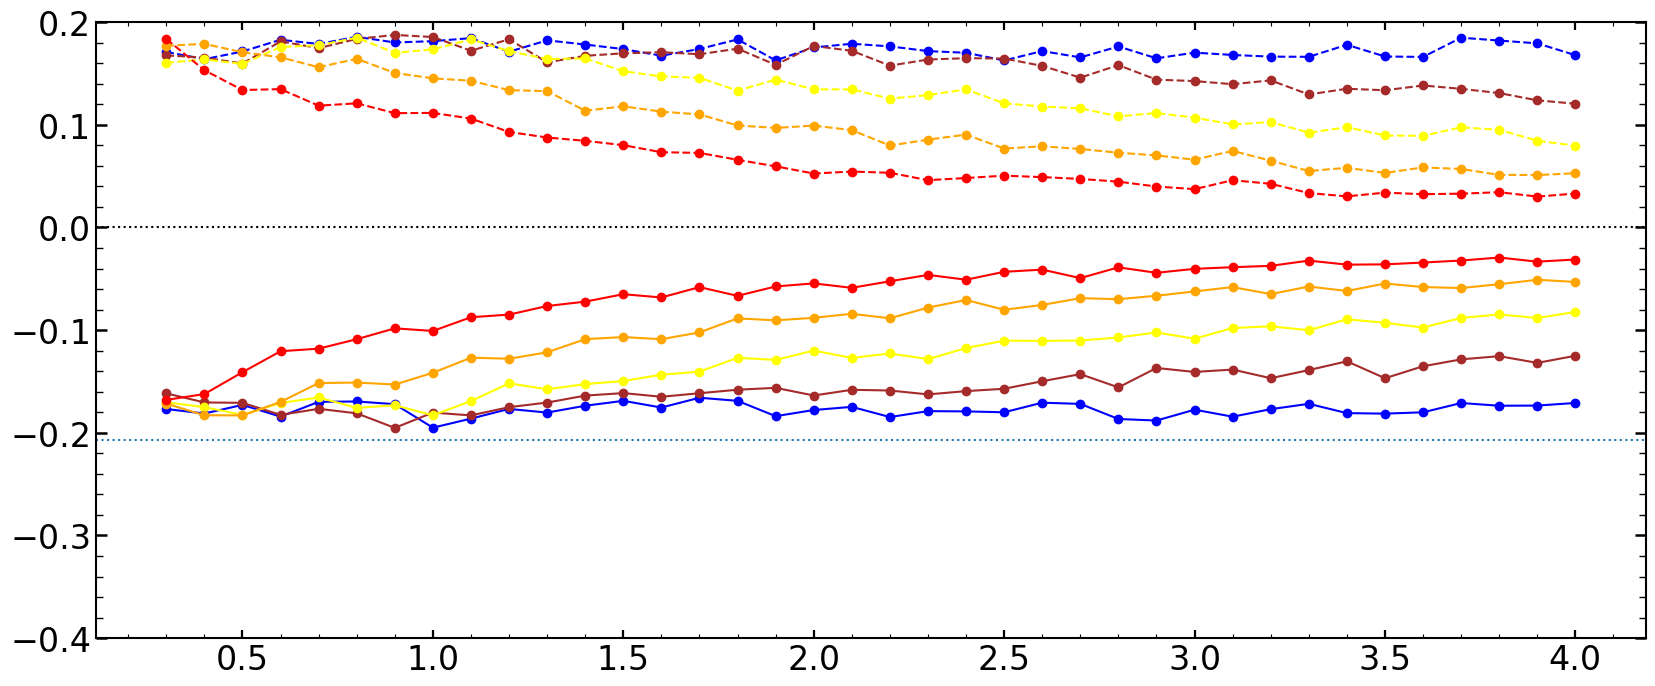

In [140]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_1[:,3]),marker='o',color='blue')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_1[:,6]),marker='o',color='blue',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_3[:,3]),marker='o',color='brown')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_3[:,6]),marker='o',color='brown',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_6[:,3]),marker='o',color='yellow')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_6[:,6]),marker='o',color='yellow',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_12[:,3]),marker='o',color='orange')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_12[:,6]),marker='o',color='orange',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_24[:,3]),marker='o',color='red')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_24[:,6]),marker='o',color='red',ls='--')
plt.axhline(0,color='black',ls=':')
plt.ylim(-0.4,0.2)

plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4,ls=':')

## cut constant, tau_sf and sigma self-consitantly changes - have to update code

In [ ]:
# sigma = constant_sigma/np.sqrt(1-np.exp(-3/\tau))

In [148]:
print([(0.3/np.sqrt(1-np.exp(-3/1))),(0.3/np.sqrt(1-np.exp(-3/3))),(0.3/np.sqrt(1-np.exp(-3/6))),(0.3/np.sqrt(1-np.exp(-3/12))),(0.3/np.sqrt(1-np.exp(-3/24)))])

[0.30775901722648685, 0.37732996649913636, 0.4782619234565008, 0.6378660124014305, 0.8751784137821076]


In [145]:
bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*1,sigma=(0.3/np.sqrt(1-np.exp(-3/1)))/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)  
bias_measured_at_many_z_1=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*3,sigma=(0.3/np.sqrt(1-np.exp(-3/3)))/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)  
bias_measured_at_many_z_3=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*6,sigma=(0.3/np.sqrt(1-np.exp(-3/6)))/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
bias_measured_at_many_z_6=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*12,sigma=(0.3/np.sqrt(1-np.exp(-3/12)))/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
bias_measured_at_many_z_12=np.array(bias_measured_at_many_z)

bias_measured_at_many_z=[]
for z in tqdm(np.arange(0.3,4.1,0.1)):
    bias_measured_at_single_z=calculate_bias(tau_sf=365*24,sigma=(0.3/np.sqrt(1-np.exp(-3/24)))/2.5,knee_position=0.5,time_restframe_between=365*16/z,primary_selection=0)
    bias_measured_at_many_z.append(bias_measured_at_single_z)
bias_measured_at_many_z_24=np.array(bias_measured_at_many_z)

100%|██████████| 38/38 [00:09<00:00,  4.06it/s]


(-0.8, 0.6)

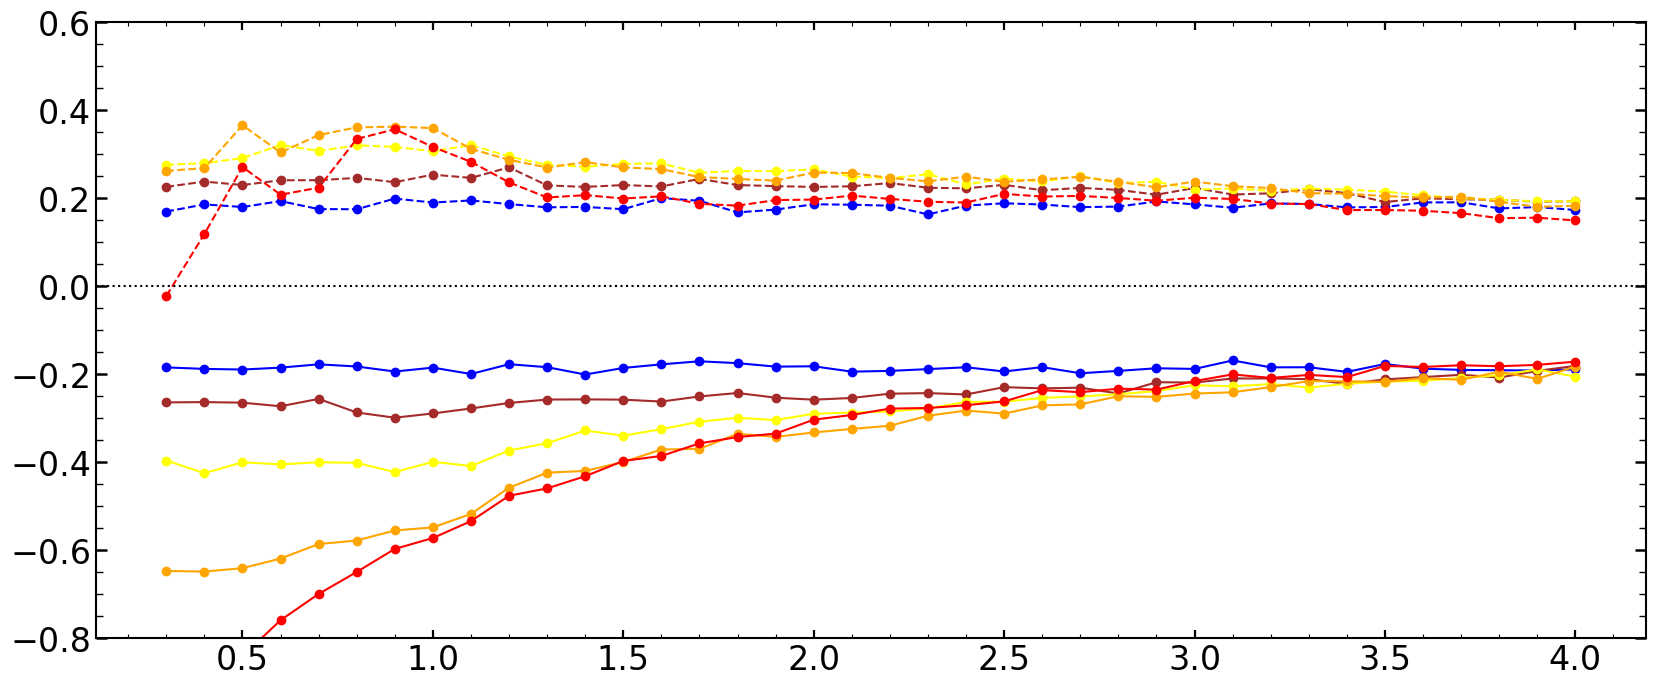

In [150]:
plt.figure(figsize=(20,8))
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_1[:,3]),marker='o',color='blue')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_1[:,6]),marker='o',color='blue',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_3[:,3]),marker='o',color='brown')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_3[:,6]),marker='o',color='brown',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_6[:,3]),marker='o',color='yellow')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_6[:,6]),marker='o',color='yellow',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_12[:,3]),marker='o',color='orange')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_12[:,6]),marker='o',color='orange',ls='--')

plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_24[:,3]),marker='o',color='red')
plt.plot(np.arange(0.3,4.1,0.1),2.5*(bias_measured_at_many_z_24[:,6]),marker='o',color='red',ls='--')
plt.axhline(0,color='black',ls=':')
plt.ylim(-0.8,0.6)

#plt.axhline(np.log(10)*(0.3)**2*(1-3.5)*0.4,ls=':')

## different luminosities at different redshifts 

In [700]:
# tau and Sf_inf depedence from MacLeod 2010+ paper

t0=[]
t1=[]
t2=[]
t3=[]
t4=[]

s0=[]
s1=[]
s2=[]
s3=[]
s4=[]

for z in np.arange(0.25,4.0,0.25):
    t0.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p0(z)-45))
    t1.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p1(z)-45))
    t2.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p2(z)-45))
    t3.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p3(z)-45))
    t4.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p4(z)-45))
    
    s0.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p0(z)-45))/2.5)
    s1.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p1(z)-45))/2.5)
    s2.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p2(z)-45))/2.5)
    s3.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p3(z)-45))/2.5)
    s4.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p4(z)-45))/2.5)

In [750]:
z=2
print(p0(z)-log_Lstar(z))
print(p4(z)-log_Lstar(z))

0.21016969156188736
-0.4236400718784452


In [703]:
# calculate bias
b0=[]
b1=[]
b2=[]
b3=[]
b4=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    b0.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p0(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p1(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p3(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    b4.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p4(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0=np.array(b0)
b1=np.array(b1)
b2=np.array(b2)
b3=np.array(b3)
b4=np.array(b4)

100%|██████████| 15/15 [00:48<00:00,  3.24s/it]


In [772]:
# calculate bias with primary cut

psb0=[]
psb1=[]
psb2=[]
psb3=[]
psb4=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    psb0.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p0(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=0.2+pmin(z),secondary_selection=None))
    psb1.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p1(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=0.2+pmin(z),secondary_selection=None))
    psb2.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=0.2+pmin(z),secondary_selection=None))
    psb3.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p3(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=0.2+pmin(z),secondary_selection=None))
    # dimmest
    psb4.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p4(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=0.2+pmin(z),secondary_selection=None))
    
psb0=np.array(psb0)
psb1=np.array(psb1)
psb2=np.array(psb2)
psb3=np.array(psb3)
psb4=np.array(psb4)

100%|██████████| 15/15 [00:50<00:00,  3.39s/it]


In [745]:
# calculate bias

tb0=[]
tb1=[]
tb2=[]
tb3=[]
tb4=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    tb0.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p0(z)-log_Lstar(z),time_restframe_between=12*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    tb1.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p1(z)-log_Lstar(z),time_restframe_between=12*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    tb2.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=12*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    tb3.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p3(z)-log_Lstar(z),time_restframe_between=12*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    tb4.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p4(z)-log_Lstar(z),time_restframe_between=12*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
tb0=np.array(tb0)
tb1=np.array(tb1)
tb2=np.array(tb2)
tb3=np.array(tb3)
tb4=np.array(tb4)

100%|██████████| 15/15 [00:48<00:00,  3.22s/it]


In [728]:
rb0=[]
rb1=[]
rb2=[]
rb3=[]
rb4=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    rb0.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p0(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=6231/(1+z),primary_selection=None,secondary_selection=None))
    rb1.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p1(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=6231/(1+z),primary_selection=None,secondary_selection=None))
    rb2.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=6231/(1+z),primary_selection=None,secondary_selection=None))
    rb3.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p3(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=6231/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    rb4.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p4(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=6231/(1+z),primary_selection=None,secondary_selection=None))
    
rb0=np.array(rb0)
rb1=np.array(rb1)
rb2=np.array(rb2)
rb3=np.array(rb3)
rb4=np.array(rb4)

100%|██████████| 15/15 [00:48<00:00,  3.26s/it]


In [739]:
ib0=[]
ib1=[]
ib2=[]
ib3=[]
ib4=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    ib0.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p0(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=7625/(1+z),primary_selection=None,secondary_selection=None))
    ib1.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p1(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=7625/(1+z),primary_selection=None,secondary_selection=None))
    ib2.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=7625/(1+z),primary_selection=None,secondary_selection=None))
    ib3.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p3(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=7625/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    ib4.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p4(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=7625/(1+z),primary_selection=None,secondary_selection=None))
    
ib0=np.array(ib0)
ib1=np.array(ib1)
ib2=np.array(ib2)
ib3=np.array(ib3)
ib4=np.array(ib4)

100%|██████████| 15/15 [00:48<00:00,  3.21s/it]


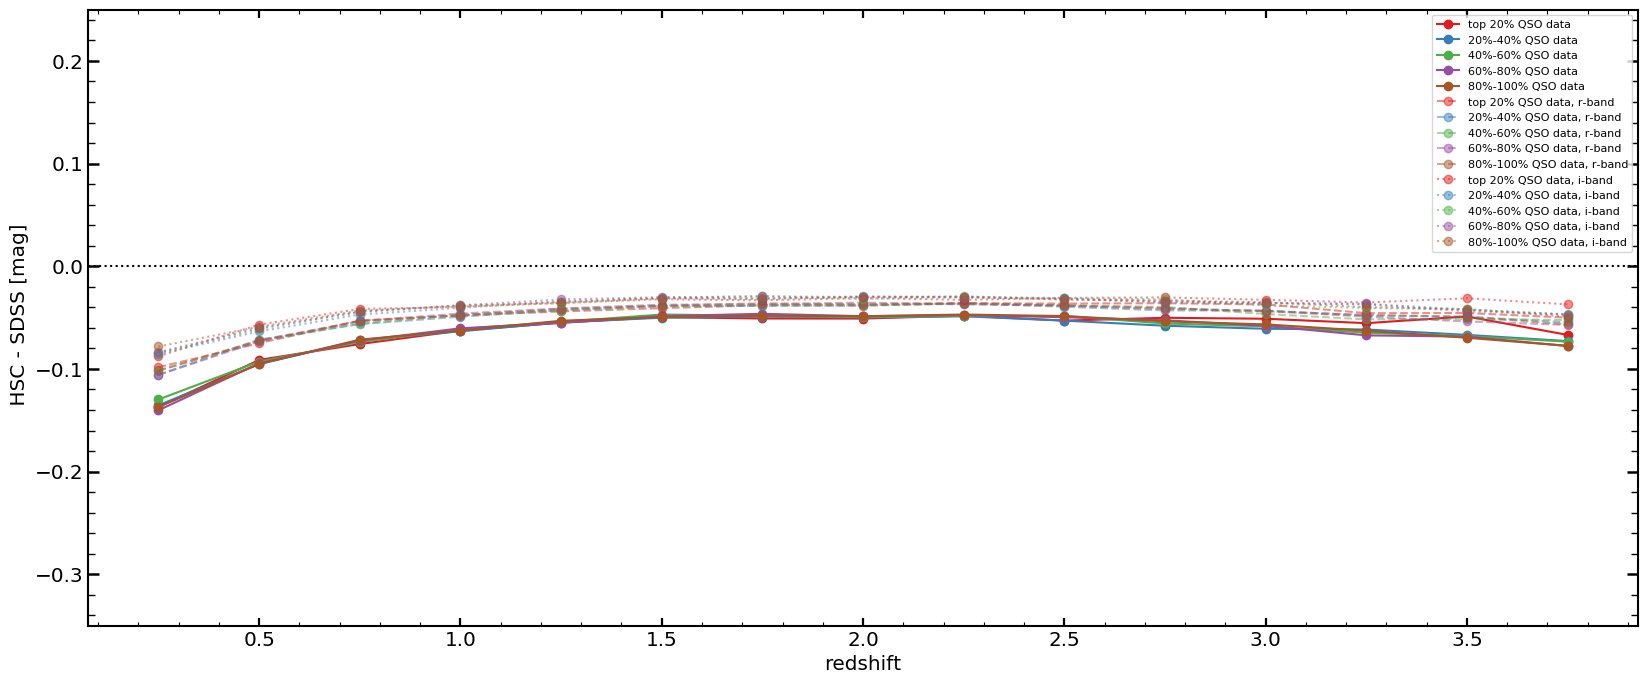

In [773]:
# plotting the bias 

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),2.5*(b0[:,3]),ls='-',color='#e41a1c',alpha=1,label='top 20% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b1[:,3]),ls='-',color='#377eb8',alpha=1,label='20%-40% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b2[:,3]),ls='-',color='#4daf4a',alpha=1,label='40%-60% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b3[:,3]),ls='-',color='#984ea3',alpha=1,label='60%-80% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b4[:,3]),ls='-',color='#a65628',alpha=1,label='80%-100% QSO data',marker='o')

#plt.plot(np.arange(0.25,4,0.25),2.5*(b0[:,4]),ls='--',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b1[:,4]),ls='--',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b2[:,4]),ls='--',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b3[:,4]),ls='--',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b4[:,4]),ls='--',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

#plt.plot(np.arange(0.25,4,0.25),2.5*(b0[:,4]),ls='--',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b1[:,4]),ls='--',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b2[:,4]),ls='--',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b3[:,4]),ls='--',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(b4[:,4]),ls='--',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

#plt.plot(np.arange(0.25,4,0.25),2.5*(tb0[:,3]),ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(tb1[:,3]),ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(tb2[:,3]),ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(tb3[:,3]),ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
#plt.plot(np.arange(0.25,4,0.25),2.5*(tb4[:,3]),ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.plot(np.arange(0.25,4,0.25),2.5*(rb0[:,3]),ls='--',color='#e41a1c',alpha=0.5,label='top 20% QSO data, r-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(rb1[:,3]),ls='--',color='#377eb8',alpha=0.5,label='20%-40% QSO data, r-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(rb2[:,3]),ls='--',color='#4daf4a',alpha=0.5,label='40%-60% QSO data, r-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(rb3[:,3]),ls='--',color='#984ea3',alpha=0.5,label='60%-80% QSO data, r-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(rb4[:,3]),ls='--',color='#a65628',alpha=0.5,label='80%-100% QSO data, r-band',marker='o')

plt.plot(np.arange(0.25,4,0.25),2.5*(ib0[:,3]),ls=':',color='#e41a1c',alpha=0.5,label='top 20% QSO data, i-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(ib1[:,3]),ls=':',color='#377eb8',alpha=0.5,label='20%-40% QSO data, i-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(ib2[:,3]),ls=':',color='#4daf4a',alpha=0.5,label='40%-60% QSO data, i-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(ib3[:,3]),ls=':',color='#984ea3',alpha=0.5,label='60%-80% QSO data, i-band',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(ib4[:,3]),ls=':',color='#a65628',alpha=0.5,label='80%-100% QSO data, i-band',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.35,0.25)

plt.ylabel(' HSC - SDSS [mag]')
plt.xlabel('redshift')
plt.legend(fontsize=8)


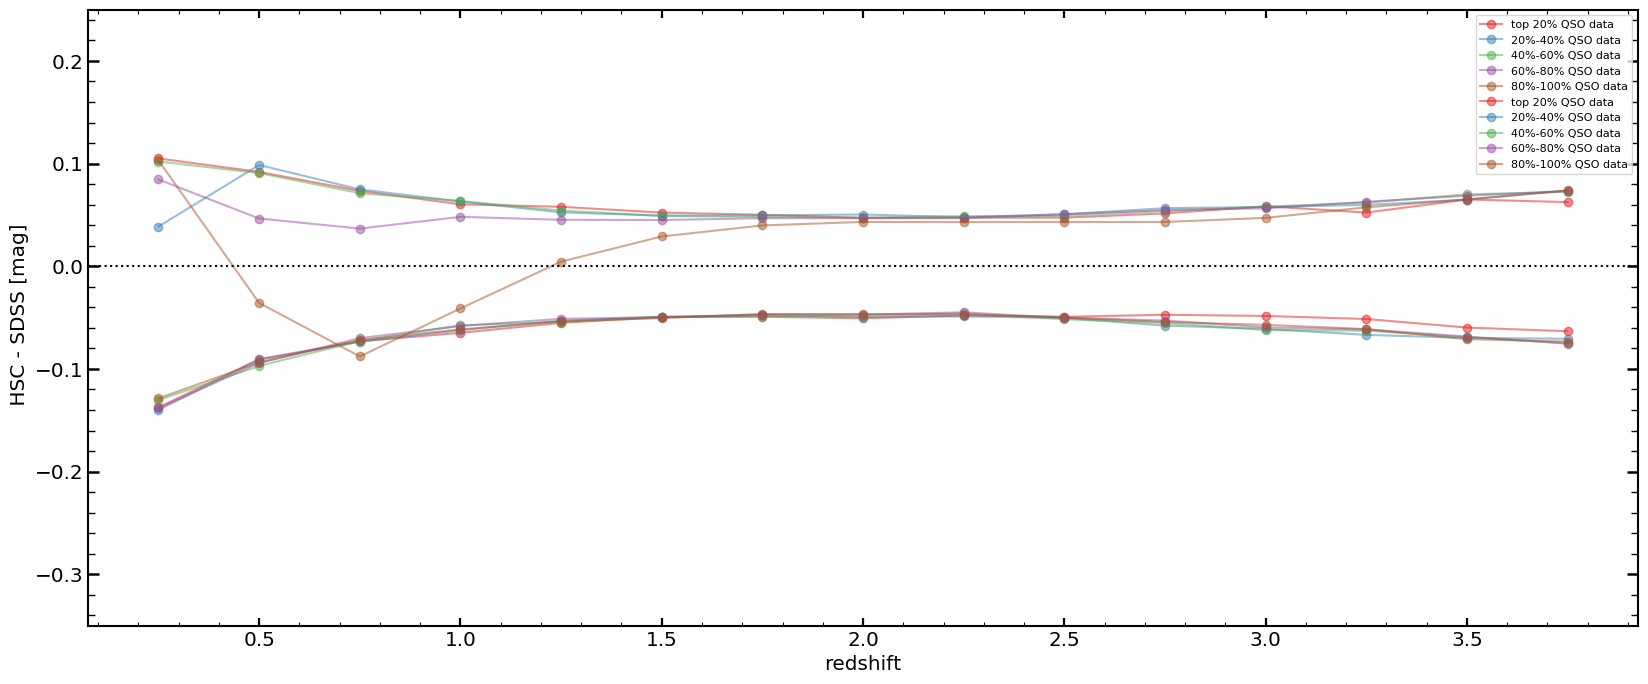

In [779]:
# plotting the bias - primary and secondary survey

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),2.5*(psb0[:,3]),ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb1[:,3]),ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb2[:,3]),ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb3[:,3]),ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb4[:,3]),ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.plot(np.arange(0.25,4,0.25),2.5*(psb0[:,7]),ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb1[:,7]),ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb2[:,7]),ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb3[:,7]),ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(psb4[:,7]),ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.axhline(0,color='black',ls=':')
plt.ylim(-0.35,0.25)

plt.ylabel(' HSC - SDSS [mag]')
plt.xlabel('redshift')
plt.legend(fontsize=8)

In [777]:
psb4[0][3]

-0.05145782572841264

In [778]:
psb4[0][6]

45.14520826676489

In [660]:
## effective sigma

b0_effective_sigma=[]
b1_effective_sigma=[]
b2_effective_sigma=[]
b3_effective_sigma=[]
b4_effective_sigma=[]

for i in range(len(b0)):
    b0_effective_sigma.append(np.mean(b0[i][8]))
    b1_effective_sigma.append(np.mean(b1[i][8]))
    b2_effective_sigma.append(np.mean(b2[i][8]))
    b3_effective_sigma.append(np.mean(b3[i][8]))
    b4_effective_sigma.append(np.mean(b4[i][8]))
    
b0_effective_sigma=np.array(b0_effective_sigma)
b1_effective_sigma=np.array(b1_effective_sigma)
b2_effective_sigma=np.array(b2_effective_sigma)
b3_effective_sigma=np.array(b3_effective_sigma)
b4_effective_sigma=np.array(b4_effective_sigma)

In [ ]:
# what is the sigma that we expect in the observations
plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),s0,ls='-',color='#e41a1c',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s1,ls='-',color='#377eb8',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s2,ls='-',color='#4daf4a',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s3,ls='-',color='#984ea3',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s4,ls='-',color='#a65628',alpha=0.5,marker='o')

plt.axhline(0,color='black',ls=':')

plt.ylabel('effective SF_inf [dex]')
plt.xlabel('redshift')
plt.legend()

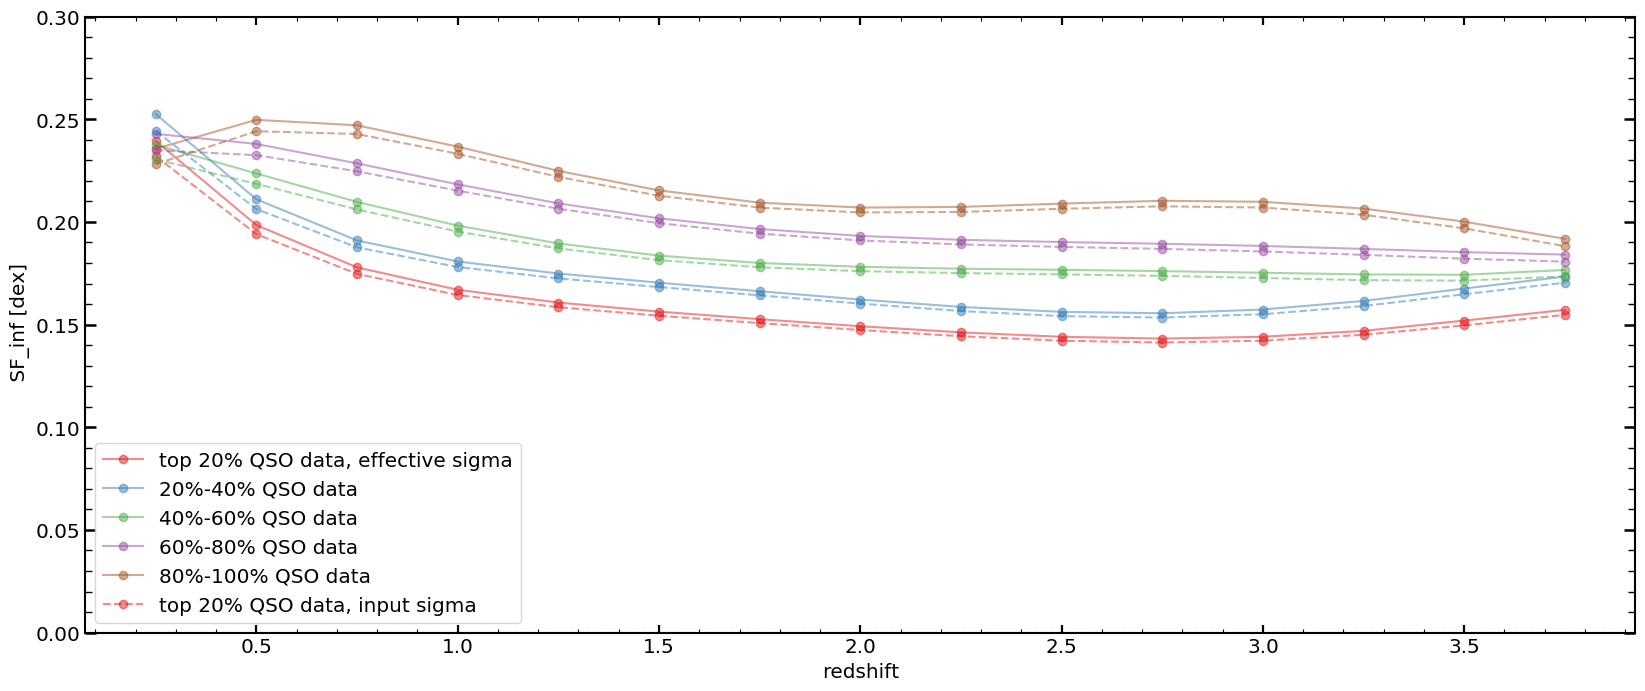

In [671]:
# plotting the bias 

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),2.5*(b0_effective_sigma),ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data, effective sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b1_effective_sigma),ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b2_effective_sigma),ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b3_effective_sigma),ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),2.5*(b4_effective_sigma),ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.plot(np.arange(0.25,4.0,0.25),2.5*np.array(s0),ls='--',color='#e41a1c',alpha=0.5,marker='o',label='top 20% QSO data, input sigma')
plt.plot(np.arange(0.25,4.0,0.25),2.5*np.array(s1),ls='--',color='#377eb8',alpha=0.5,marker='o')
plt.plot(np.arange(0.25,4.0,0.25),2.5*np.array(s2),ls='--',color='#4daf4a',alpha=0.5,marker='o')
plt.plot(np.arange(0.25,4.0,0.25),2.5*np.array(s3),ls='--',color='#984ea3',alpha=0.5,marker='o')
plt.plot(np.arange(0.25,4.0,0.25),2.5*np.array(s4),ls='--',color='#a65628',alpha=0.5,marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(0.0,0.3)

plt.ylabel(' SF_inf [dex]')
plt.xlabel('redshift')
plt.legend()

In [ ]:
## slope at each luminosity 

In [ ]:
## result from effective sigma and the slope of the QLF

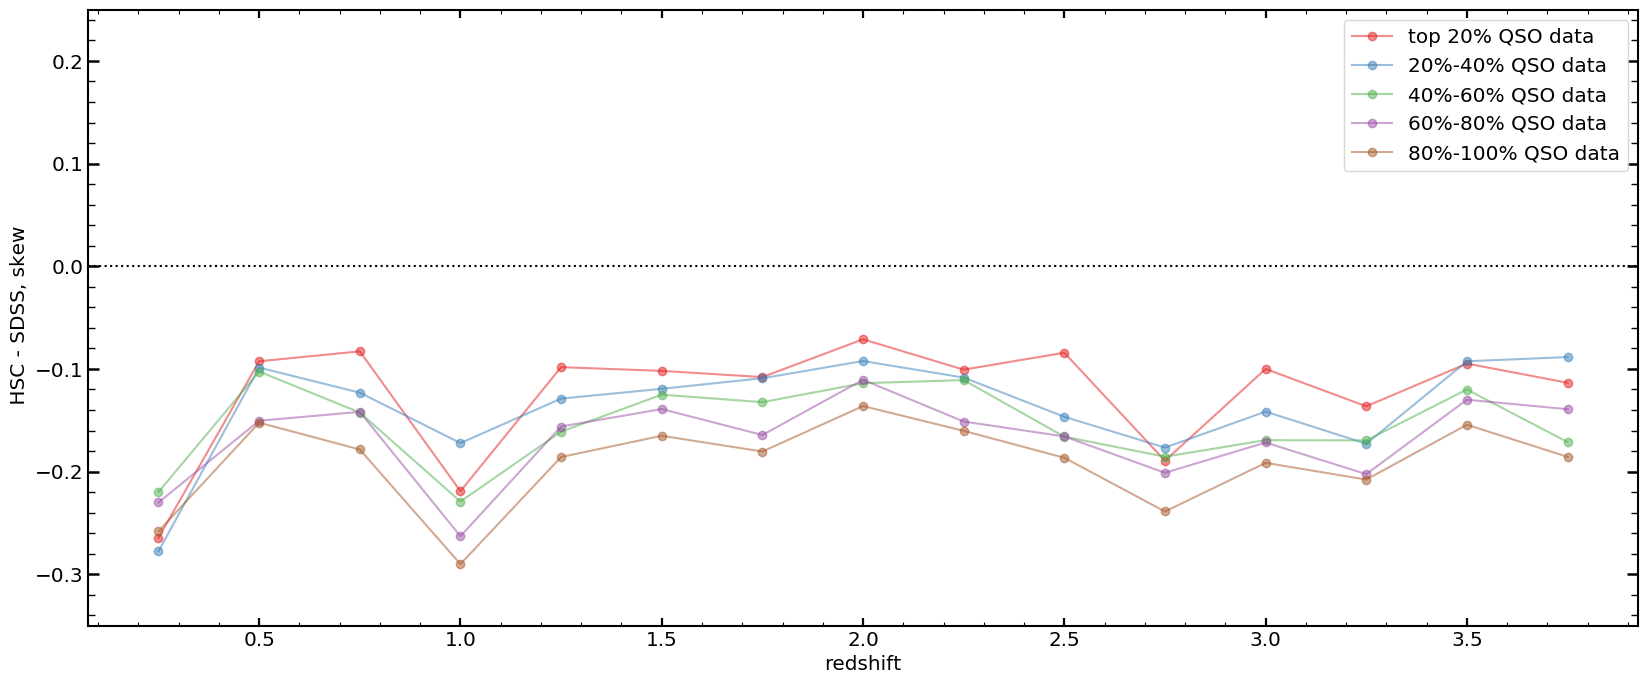

In [673]:
## skew
# plotting the bias 

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),b0[:,6],ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b1[:,6],ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b2[:,6],ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b3[:,6],ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b4[:,6],ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.35,0.25)

plt.ylabel(' HSC - SDSS, skew')
plt.xlabel('redshift')
plt.legend()



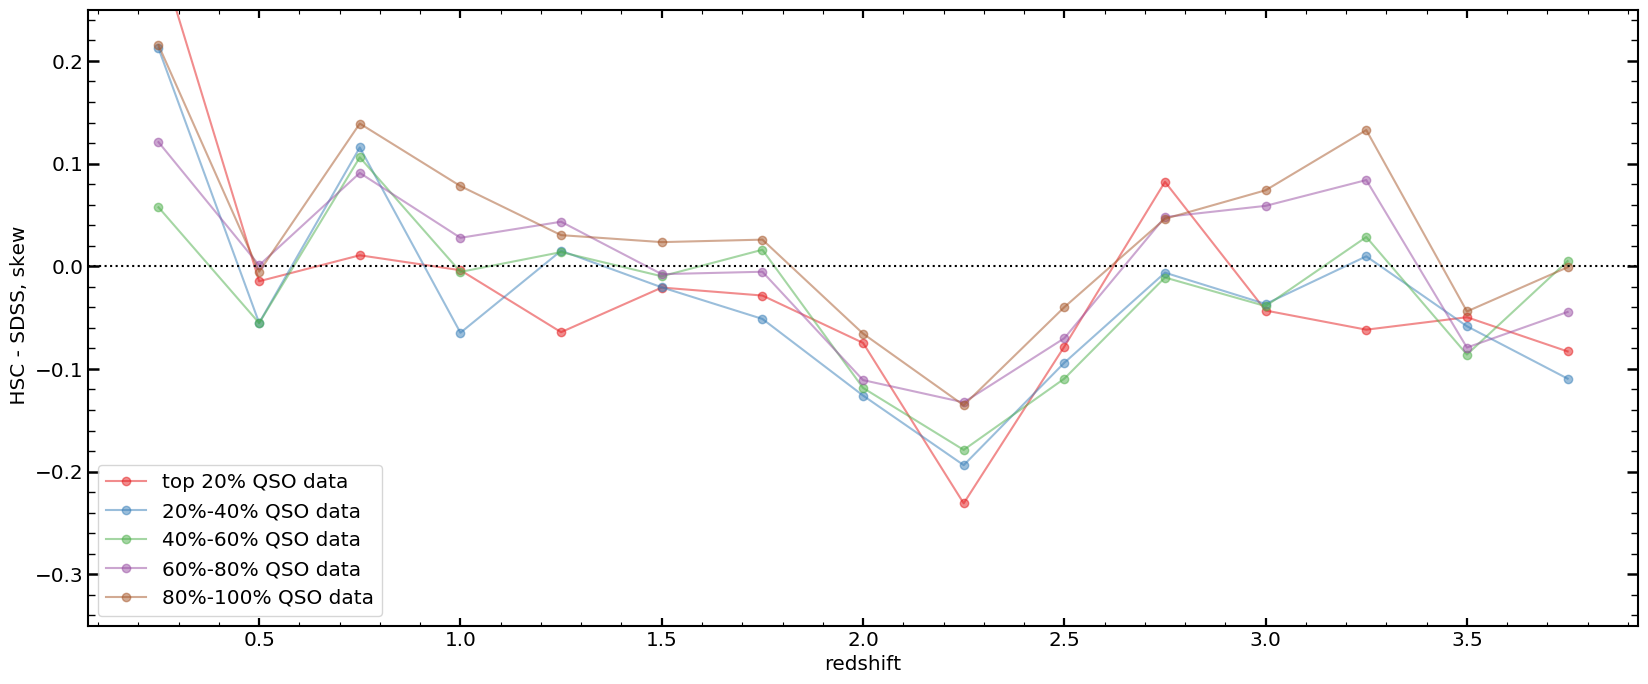

In [674]:
## kurtosis


plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),b0[:,7],ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b1[:,7],ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b2[:,7],ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b3[:,7],ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')
plt.plot(np.arange(0.25,4,0.25),b4[:,7],ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.35,0.25)

plt.ylabel(' HSC - SDSS, skew')
plt.xlabel('redshift')
plt.legend()


In [ ]:
## error of using gauss to measure sf?

In [678]:
test=calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None)

In [689]:
0.741*(np.quantile(test[10]-test[9],0.25)-np.quantile(test[10]-test[9],0.75))

-0.10336734620019866

In [690]:
np.std(test[10]-test[9])

0.10136181903969188

(array([  14.,  112.,  577., 1542., 2483., 2532., 1495.,  441.,   62.]),
 array([-0.40702514, -0.330333  , -0.25364087, -0.17694873, -0.1002566 ,
        -0.02356446,  0.05312767,  0.12981981,  0.20651194,  0.28320408]),
 <a list of 9 Patch objects>)

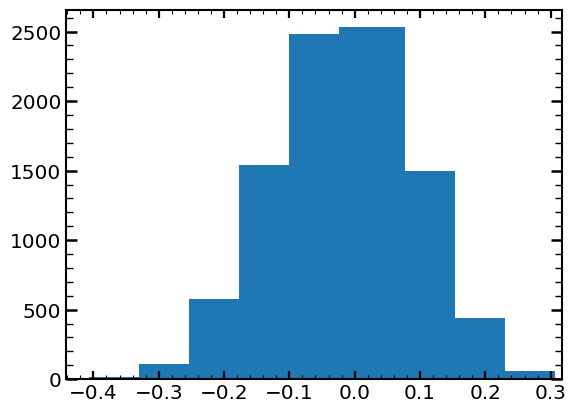

In [685]:
plt.hist(test[10]-test[9],bins=9,width=0.1)

### hypothetical investigation - keep variability parameters constant and move other parametes by large steps 

In [615]:
# calculate bias, change only sigma

b0_change_sigma=[]
b1_change_sigma=[]
b2_change_sigma=[]
b3_change_sigma=[]
b4_change_sigma=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    b0_change_sigma.append(calculate_bias(As=As+np.log10(0.5),Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1_change_sigma.append(calculate_bias(As=As+np.log10(0.75),Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2_change_sigma.append(calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3_change_sigma.append(calculate_bias(As=As+np.log10(1.25),Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    b4_change_sigma.append(calculate_bias(As=As+np.log10(1.5),Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0_change_sigma=np.array(b0_change_sigma)
b1_change_sigma=np.array(b1_change_sigma)
b2_change_sigma=np.array(b2_change_sigma)
b3_change_sigma=np.array(b3_change_sigma)
b4_change_sigma=np.array(b4_change_sigma)

100%|██████████| 15/15 [00:49<00:00,  3.31s/it]


In [621]:
# calculate bias, change only position to the knee

b0_change_pos_to_knee=[]
b1_change_pos_to_knee=[]
b2_change_pos_to_knee=[]
b3_change_pos_to_knee=[]
b4_change_pos_to_knee=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    b0_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=-0.5,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=-0.25,time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=0,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=0.25,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    b4_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=0.5,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0_change_pos_to_knee=np.array(b0_change_pos_to_knee)
b1_change_pos_to_knee=np.array(b1_change_pos_to_knee)
b2_change_pos_to_knee=np.array(b2_change_pos_to_knee)
b3_change_pos_to_knee=np.array(b3_change_pos_to_knee)
b4_change_pos_to_knee=np.array(b4_change_pos_to_knee)

100%|██████████| 15/15 [00:49<00:00,  3.27s/it]


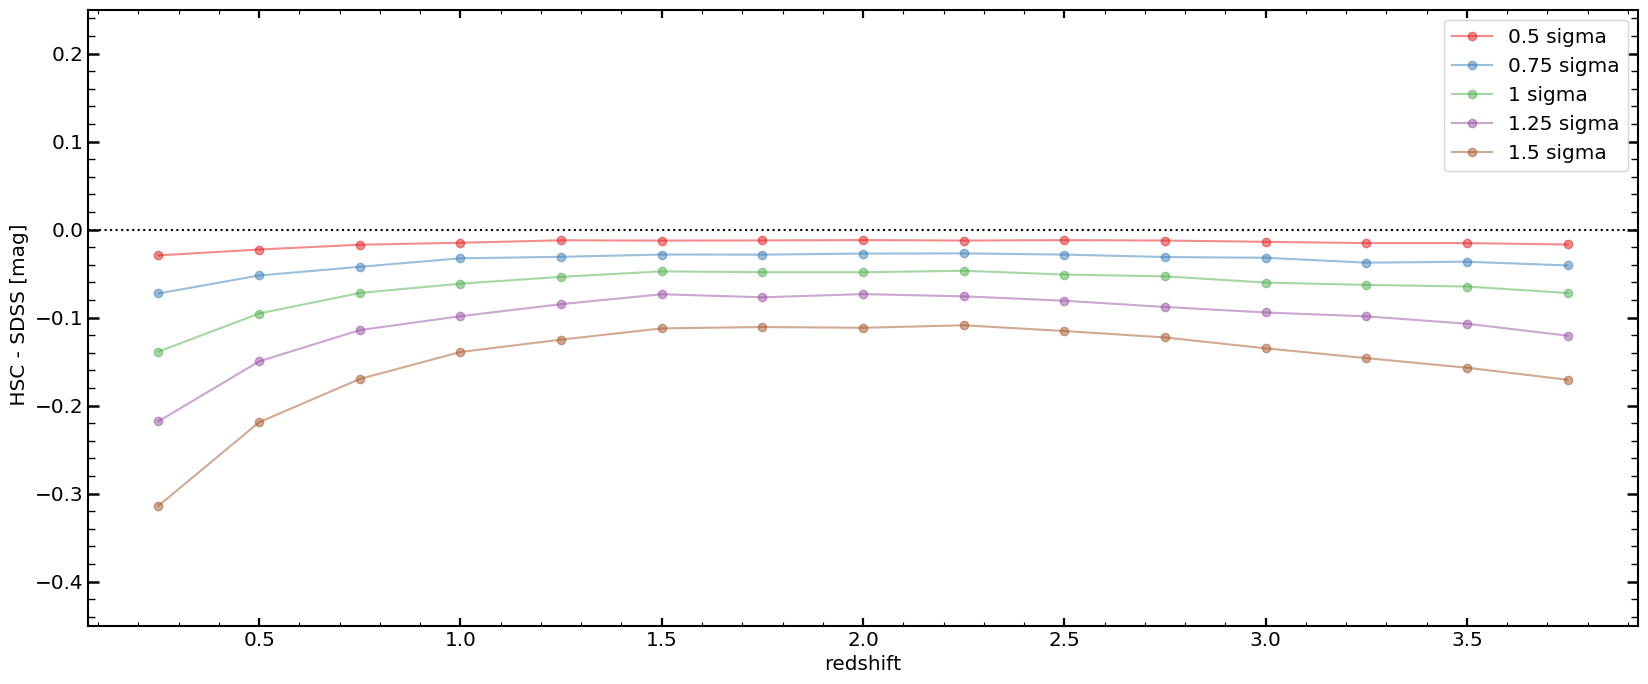

In [617]:
# plotting the bias - changing SF_inf without changing anything else 

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),-2.5*(b0_change_sigma[:,1]-b0_change_sigma[:,2]),ls='-',color='#e41a1c',alpha=0.5,label='0.5 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b1_change_sigma[:,1]-b1_change_sigma[:,2]),ls='-',color='#377eb8',alpha=0.5,label='0.75 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b2_change_sigma[:,1]-b2_change_sigma[:,2]),ls='-',color='#4daf4a',alpha=0.5,label='1 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b3_change_sigma[:,1]-b3_change_sigma[:,2]),ls='-',color='#984ea3',alpha=0.5,label='1.25 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b4_change_sigma[:,1]-b4_change_sigma[:,2]),ls='-',color='#a65628',alpha=0.5,label='1.5 sigma',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.45,0.25)

plt.ylabel(' HSC - SDSS [mag]')
plt.xlabel('redshift')
plt.legend()


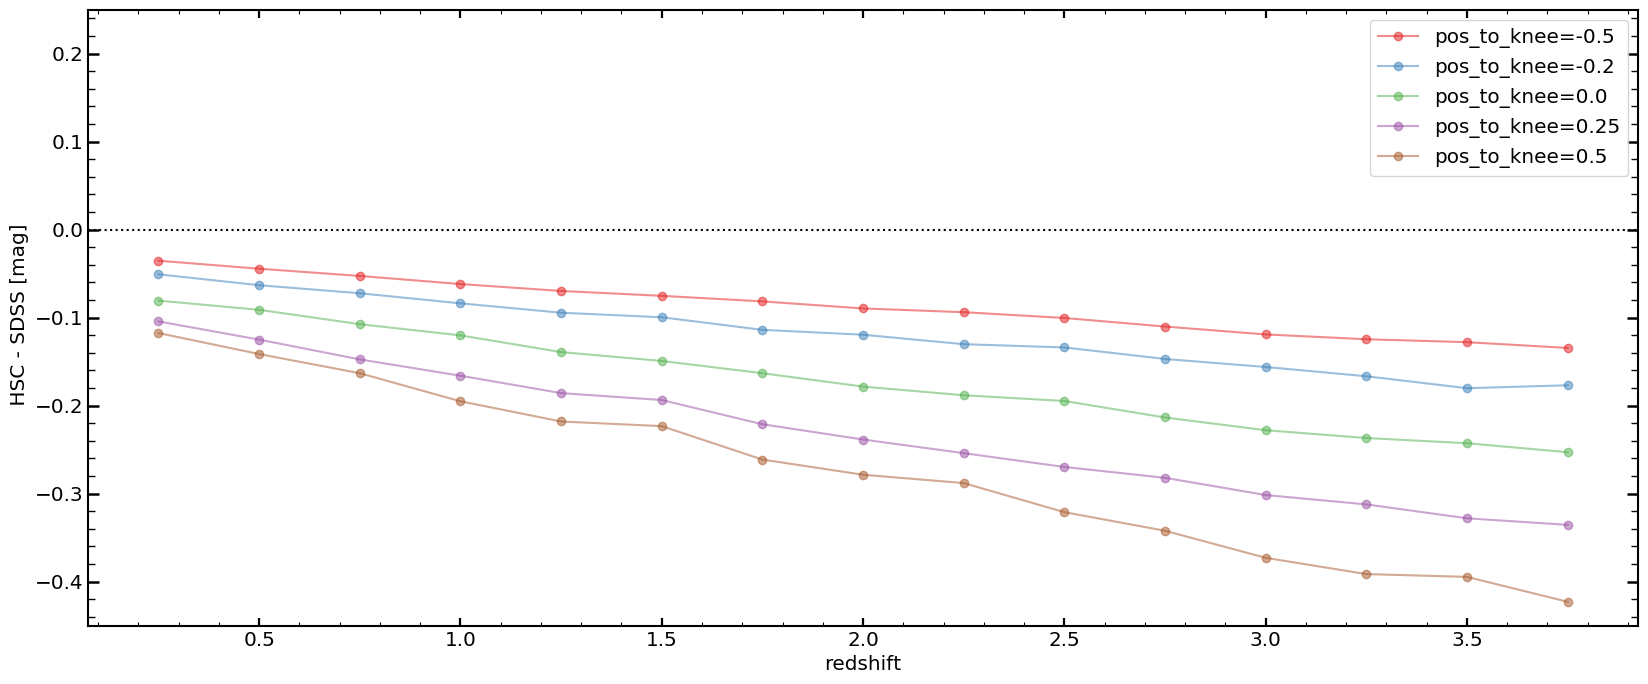

In [622]:
# plotting the bias - changing pos to knee

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),-2.5*(b0_change_pos_to_knee[:,1]-b0_change_pos_to_knee[:,2]),ls='-',color='#e41a1c',alpha=0.5,label='pos_to_knee=-0.5',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b1_change_pos_to_knee[:,1]-b1_change_pos_to_knee[:,2]),ls='-',color='#377eb8',alpha=0.5,label='pos_to_knee=-0.2',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b2_change_pos_to_knee[:,1]-b2_change_pos_to_knee[:,2]),ls='-',color='#4daf4a',alpha=0.5,label='pos_to_knee=0.0',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b3_change_pos_to_knee[:,1]-b3_change_pos_to_knee[:,2]),ls='-',color='#984ea3',alpha=0.5,label='pos_to_knee=0.25',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b4_change_pos_to_knee[:,1]-b4_change_pos_to_knee[:,2]),ls='-',color='#a65628',alpha=0.5,label='pos_to_knee=0.5',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.45,0.25)

plt.ylabel(' HSC - SDSS [mag]')
plt.xlabel('redshift')
plt.legend()


### hypothetical investigation - keep variability parameters constant and move other parametes by matching steps 

In [636]:
# calculate bias, change only sigma

b0_change_sigma=[]
b1_change_sigma=[]
b2_change_sigma=[]
b3_change_sigma=[]
b4_change_sigma=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    b0_change_sigma.append(calculate_bias(As=As+np.log10(0.06/0.07),Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1_change_sigma.append(calculate_bias(As=As+np.log10(0.065/0.07),Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2_change_sigma.append(calculate_bias(As=As+np.log10(0.07/0.07),Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3_change_sigma.append(calculate_bias(As=As+np.log10(0.075/0.07),Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    b4_change_sigma.append(calculate_bias(As=As+np.log10(0.08/0.07),Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=p2(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0_change_sigma=np.array(b0_change_sigma)
b1_change_sigma=np.array(b1_change_sigma)
b2_change_sigma=np.array(b2_change_sigma)
b3_change_sigma=np.array(b3_change_sigma)
b4_change_sigma=np.array(b4_change_sigma)

100%|██████████| 15/15 [00:48<00:00,  3.26s/it]


In [635]:
# calculate bias, change only position to the knee and no dep of variability on lum

b0_change_pos_to_knee=[]
b1_change_pos_to_knee=[]
b2_change_pos_to_knee=[]
b3_change_pos_to_knee=[]
b4_change_pos_to_knee=[]

for z in tqdm(np.arange(0.25,4,0.25)):
    #bright
    b0_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=0.25,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b1_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=0.05,time_restframe_between=16*365/(1+z),\
                            luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b2_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=-0.15,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    b3_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=-0.3,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    # dimmest
    b4_change_pos_to_knee.append(calculate_bias(As=As,Bs=Bs,Cs=0,At=At,Bt=Bt,Ct=Ct,mes_position=-0.45,time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None))
    
b0_change_pos_to_knee=np.array(b0_change_pos_to_knee)
b1_change_pos_to_knee=np.array(b1_change_pos_to_knee)
b2_change_pos_to_knee=np.array(b2_change_pos_to_knee)
b3_change_pos_to_knee=np.array(b3_change_pos_to_knee)
b4_change_pos_to_knee=np.array(b4_change_pos_to_knee)

100%|██████████| 15/15 [00:49<00:00,  3.32s/it]


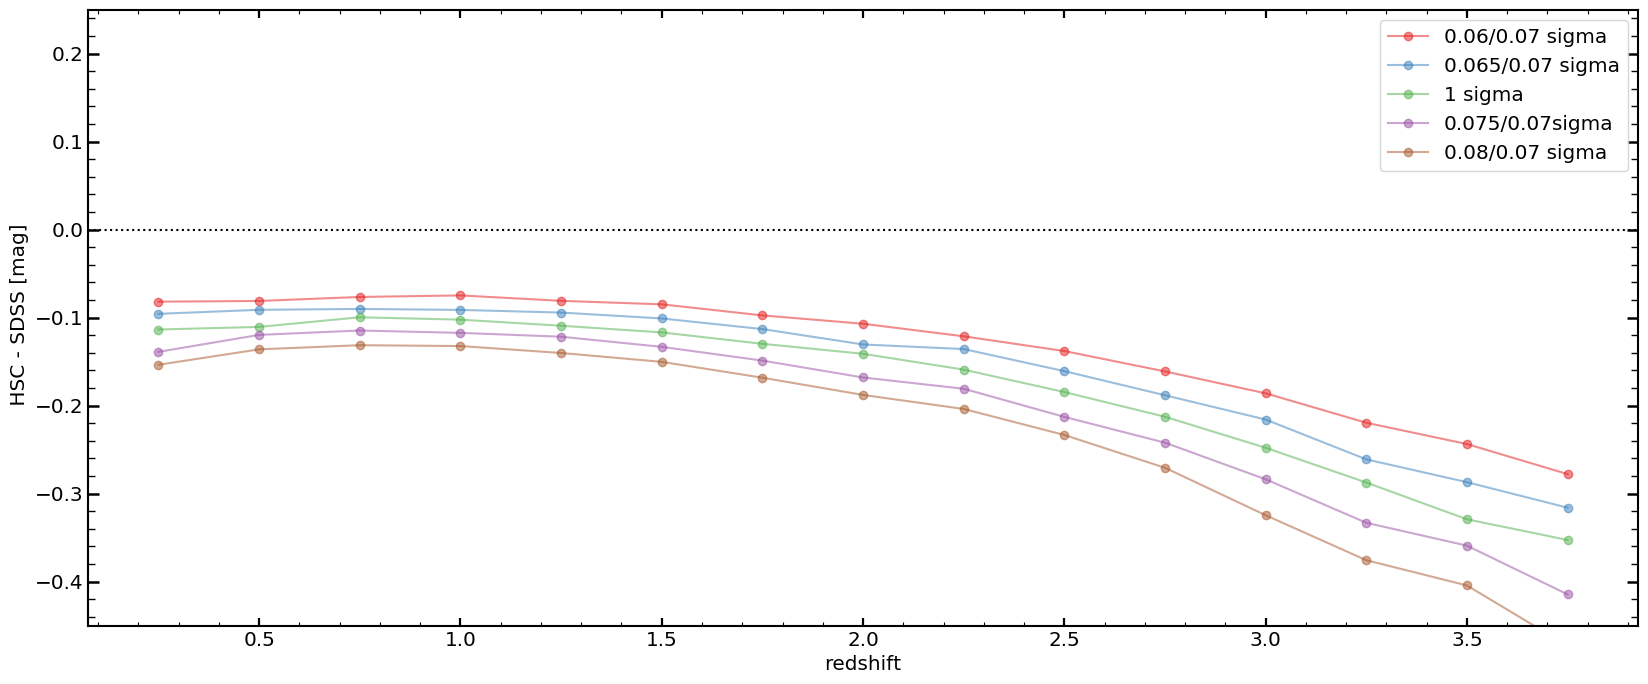

In [637]:
# plotting the bias - changing SF_inf without changing anything else 

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),-2.5*(b0_change_sigma[:,1]-b0_change_sigma[:,2]),ls='-',color='#e41a1c',alpha=0.5,label='0.06/0.07 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b1_change_sigma[:,1]-b1_change_sigma[:,2]),ls='-',color='#377eb8',alpha=0.5,label='0.065/0.07 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b2_change_sigma[:,1]-b2_change_sigma[:,2]),ls='-',color='#4daf4a',alpha=0.5,label='1 sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b3_change_sigma[:,1]-b3_change_sigma[:,2]),ls='-',color='#984ea3',alpha=0.5,label='0.075/0.07sigma',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b4_change_sigma[:,1]-b4_change_sigma[:,2]),ls='-',color='#a65628',alpha=0.5,label='0.08/0.07 sigma',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.45,0.25)

plt.ylabel(' HSC - SDSS [mag]')
plt.xlabel('redshift')
plt.legend()


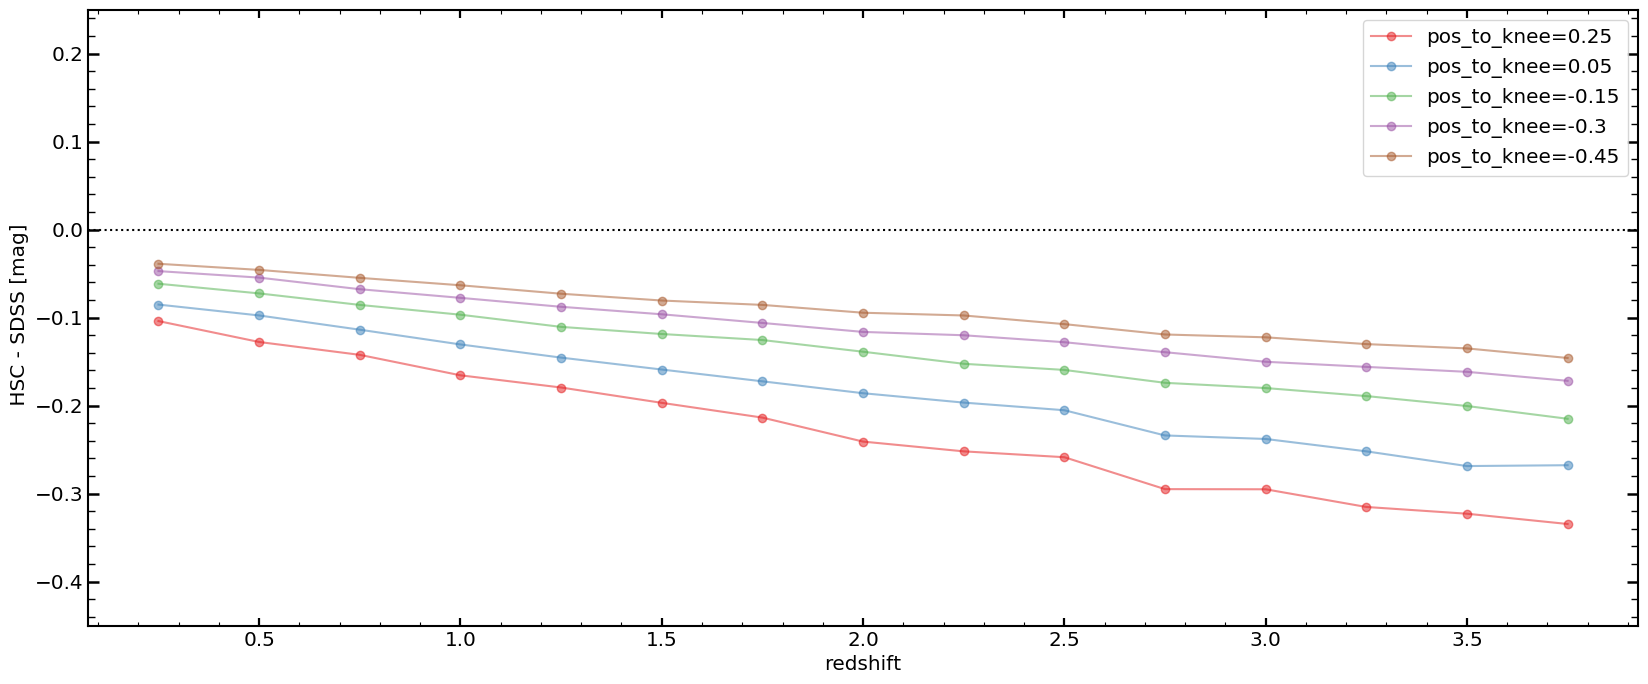

In [632]:
# plotting the bias - changing pos to knee

plt.figure(figsize=(20,8))

plt.plot(np.arange(0.25,4,0.25),-2.5*(b0_change_pos_to_knee[:,1]-b0_change_pos_to_knee[:,2]),ls='-',color='#e41a1c',alpha=0.5,label='pos_to_knee=0.25',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b1_change_pos_to_knee[:,1]-b1_change_pos_to_knee[:,2]),ls='-',color='#377eb8',alpha=0.5,label='pos_to_knee=0.05',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b2_change_pos_to_knee[:,1]-b2_change_pos_to_knee[:,2]),ls='-',color='#4daf4a',alpha=0.5,label='pos_to_knee=-0.15',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b3_change_pos_to_knee[:,1]-b3_change_pos_to_knee[:,2]),ls='-',color='#984ea3',alpha=0.5,label='pos_to_knee=-0.3',marker='o')
plt.plot(np.arange(0.25,4,0.25),-2.5*(b4_change_pos_to_knee[:,1]-b4_change_pos_to_knee[:,2]),ls='-',color='#a65628',alpha=0.5,label='pos_to_knee=-0.45',marker='o')


plt.axhline(0,color='black',ls=':')
plt.ylim(-0.45,0.25)

plt.ylabel(' HSC - SDSS [mag]')
plt.xlabel('redshift')
plt.legend()


### continue 

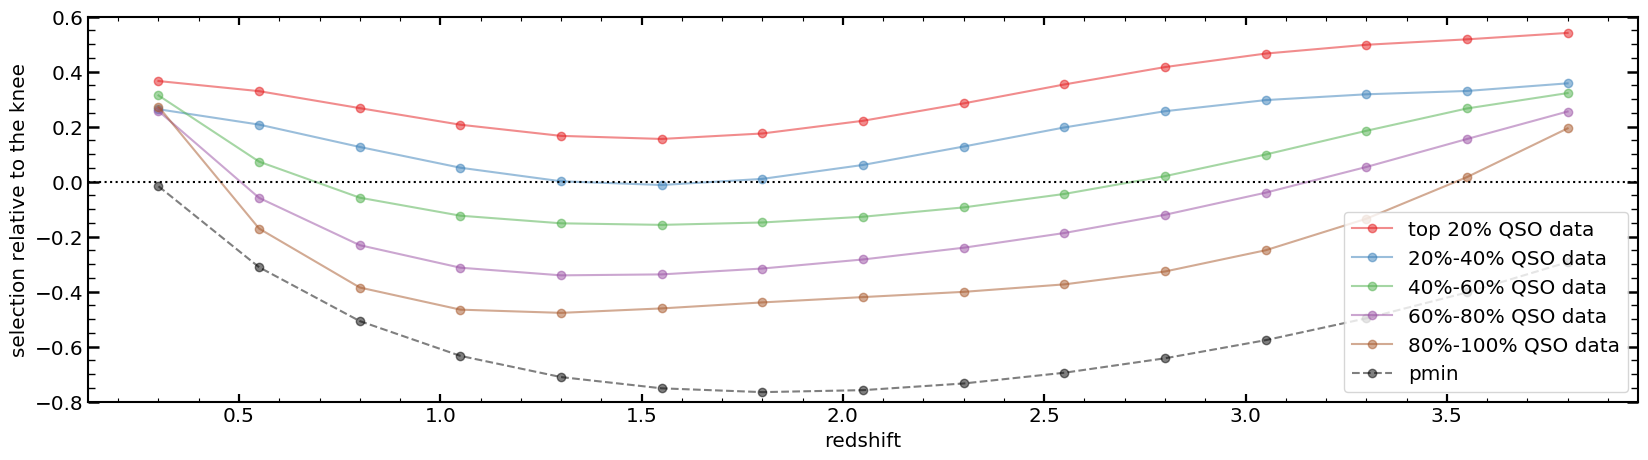

In [546]:
# selection relative to the knee

l0=[]
l1=[]
l2=[]
l3=[]
l4=[]

lmin=[]

for z in np.arange(0.3,4.05,0.25):
    l0.append(p0(z)-log_Lstar(z))
    l1.append(p1(z)-log_Lstar(z))
    l2.append(p2(z)-log_Lstar(z))
    l3.append(p3(z)-log_Lstar(z))
    l4.append(p4(z)-log_Lstar(z))
    lmin.append(0.2+pmin(z)-log_Lstar(z))


plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),l0,ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l1,ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l2,ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l3,ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l4,ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),lmin,ls='--',color='black',alpha=0.5,label='pmin',marker='o')

plt.axhline(0,color='black',ls=':')
plt.ylim(-0.8,0.6)

plt.ylabel('selection relative to the knee')
plt.xlabel('redshift')
plt.legend()

In [ ]:
## what are you observing at different redshifts

In [ ]:
# what time_rf, what time_rf to time_sf, what SF_inf, what wavelength is observed

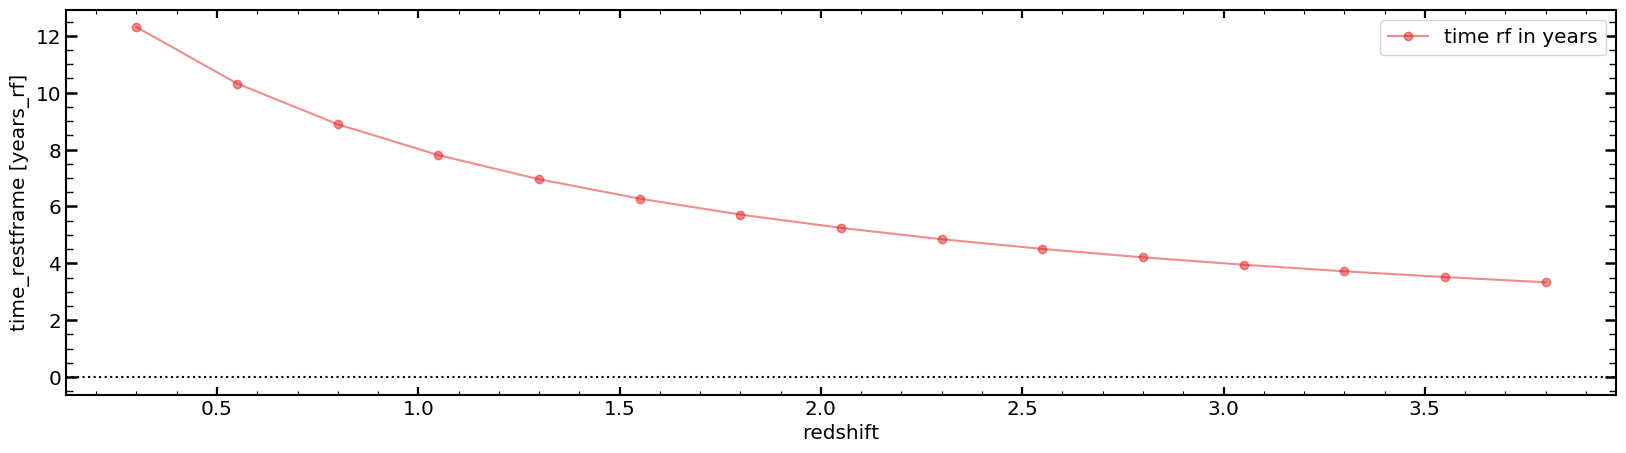

In [547]:
plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),16/(1+np.arange(0.3,4.05,0.25)),ls='-',color='#e41a1c',alpha=0.5,marker='o',label='time rf in years')


plt.axhline(0,color='black',ls=':')


plt.ylabel('time_restframe [years_rf]')
plt.xlabel('redshift')
plt.legend()

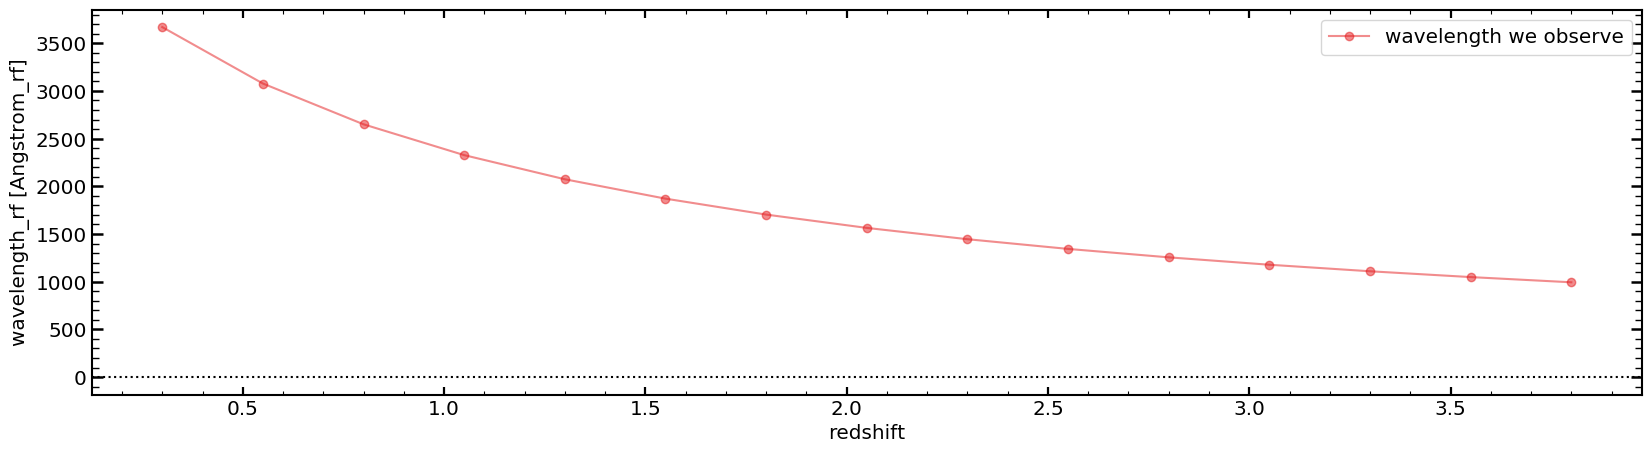

In [548]:
plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),4770/(1+np.arange(0.3,4.05,0.25)),ls='-',color='#e41a1c',alpha=0.5,marker='o',label='wavelength we observe')


plt.axhline(0,color='black',ls=':')


plt.ylabel('wavelength_rf [Angstrom_rf]')
plt.xlabel('redshift')
plt.legend()

In [436]:
#log_tau=At+Bt*np.log10(restframe_wavelength/4000)+Ct*(full_log_Er_curve_as_L-45)

In [549]:
# tau and Sf_inf depedence from MacLeod 2010 paper

t0=[]
t1=[]
t2=[]
t3=[]
t4=[]

s0=[]
s1=[]
s2=[]
s3=[]
s4=[]

for z in np.arange(0.3,4.05,0.25):
    t0.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p0(z)-45))
    t1.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p1(z)-45))
    t2.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p2(z)-45))
    t3.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p3(z)-45))
    t4.append(At+Bt*np.log10((4770/(1+z))/4000)+Ct*(p4(z)-45))
    
    s0.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p0(z)-45))/2.5)
    s1.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p1(z)-45))/2.5)
    s2.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p2(z)-45))/2.5)
    s3.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p3(z)-45))/2.5)
    s4.append(10**(As+Bs*np.log10((4770/(1+z))/4000)+Cs*(p4(z)-45))/2.5)

No handles with labels found to put in legend.


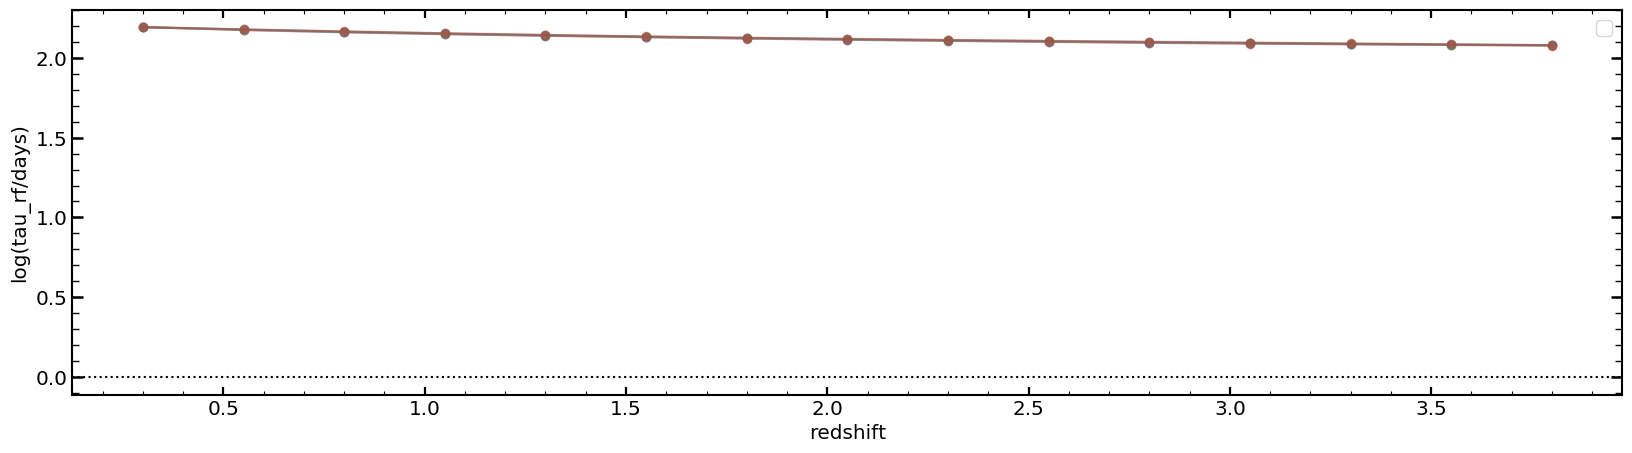

In [550]:
plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),t0,ls='-',color='#e41a1c',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t1,ls='-',color='#377eb8',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t2,ls='-',color='#4daf4a',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t3,ls='-',color='#984ea3',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t4,ls='-',color='#a65628',alpha=0.5,marker='o')

plt.axhline(0,color='black',ls=':')

plt.ylabel('log(tau_rf/days)')
plt.xlabel('redshift')
plt.legend()

In [551]:
# transfrom the the log times into linear years
t0_in_years=10**(np.array(t0))/365
t1_in_years=10**(np.array(t1))/365
t2_in_years=10**(np.array(t2))/365
t3_in_years=10**(np.array(t3))/365
t4_in_years=10**(np.array(t4))/365

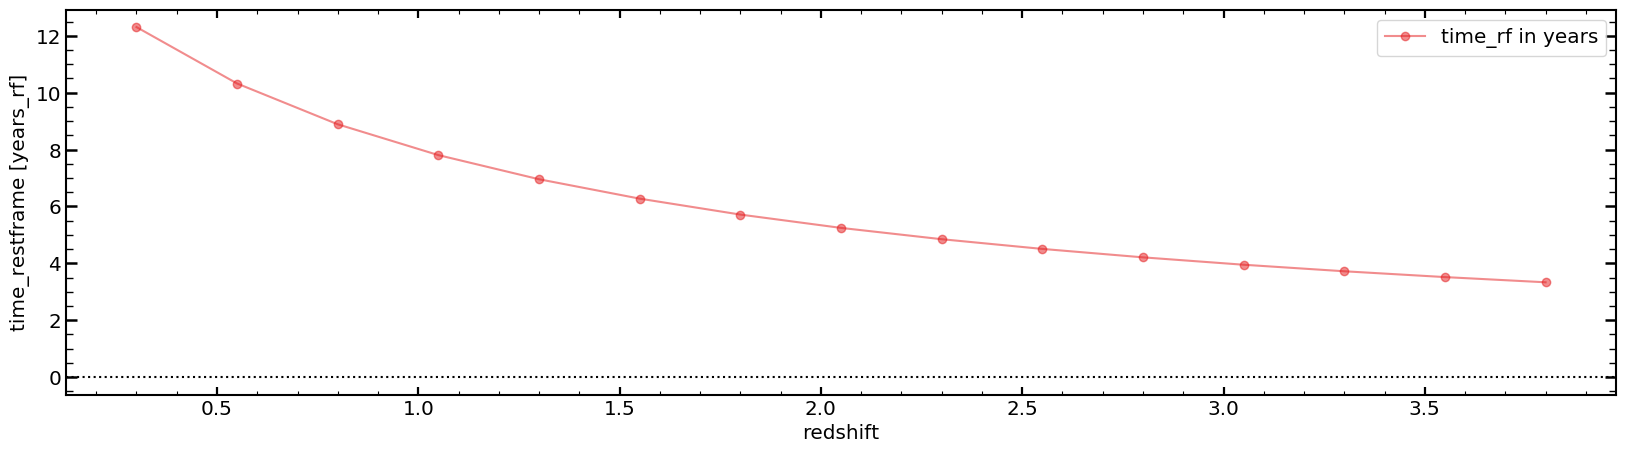

In [552]:
plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),16/(1+np.arange(0.3,4.05,0.25)),ls='-',color='#e41a1c',alpha=0.5,marker='o',label='time_rf in years')

plt.axhline(0,color='black',ls=':')


plt.ylabel('time_restframe [years_rf]')
plt.xlabel('redshift')
plt.legend()

No handles with labels found to put in legend.


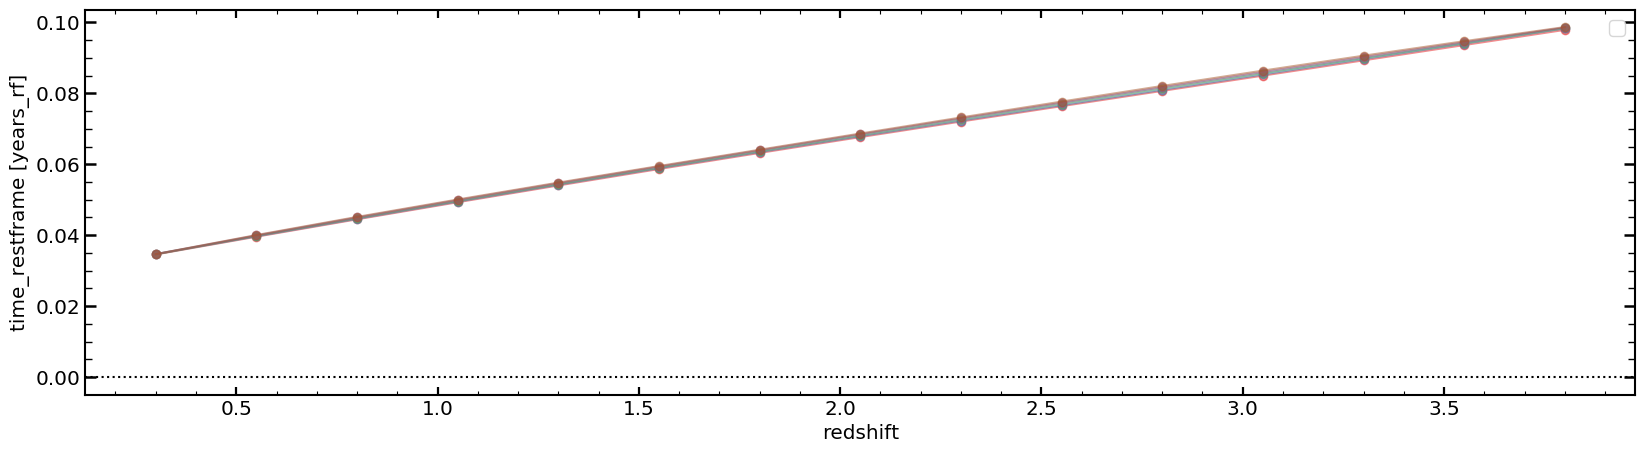

In [553]:
# tau_sf is which fraction of time observed

plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),t0_in_years/(16/(1+np.arange(0.3,4.05,0.25))),ls='-',color='#e41a1c',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t1_in_years/(16/(1+np.arange(0.3,4.05,0.25))),ls='-',color='#377eb8',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t2_in_years/(16/(1+np.arange(0.3,4.05,0.25))),ls='-',color='#4daf4a',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t3_in_years/(16/(1+np.arange(0.3,4.05,0.25))),ls='-',color='#984ea3',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),t4_in_years/(16/(1+np.arange(0.3,4.05,0.25))),ls='-',color='#a65628',alpha=0.5,marker='o')
plt.axhline(0,color='black',ls=':')

plt.ylabel('time_restframe [years_rf]')
plt.xlabel('redshift')
plt.legend()

No handles with labels found to put in legend.


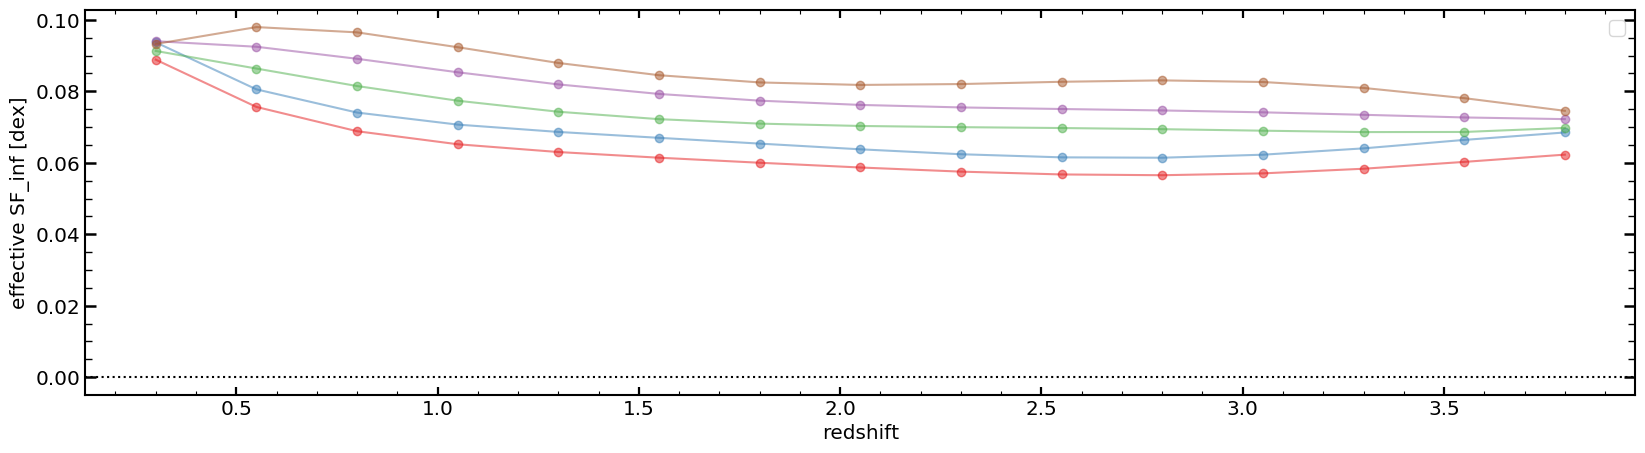

In [578]:
# what is the sigma that we expect in the observations

# in general there should be another plot showing what value SF takes at this point, but in this particular case it is exactly the same given that t_obs is so much longer than tau_sf
plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),s0,ls='-',color='#e41a1c',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s1,ls='-',color='#377eb8',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s2,ls='-',color='#4daf4a',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s3,ls='-',color='#984ea3',alpha=0.5,marker='o')
plt.plot(np.arange(0.3,4.05,0.25),s4,ls='-',color='#a65628',alpha=0.5,marker='o')

plt.axhline(0,color='black',ls=':')

plt.ylabel('effective SF_inf [dex]')
plt.xlabel('redshift')
plt.legend()

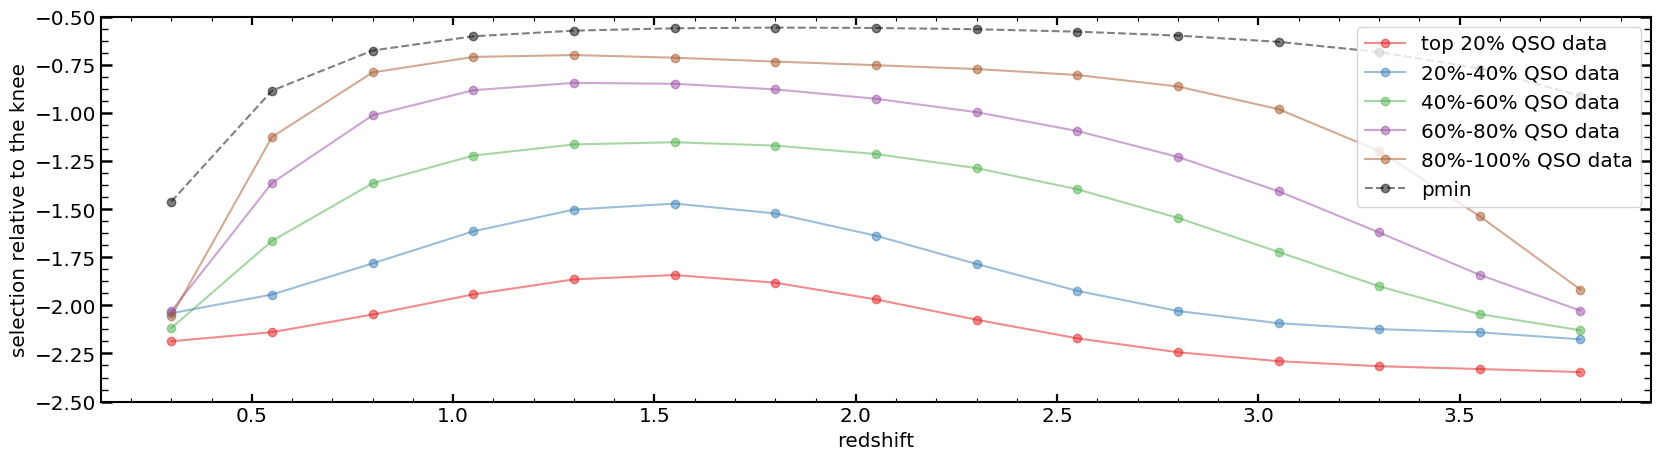

In [896]:
# selection relative to the knee

l0=[]
l1=[]
l2=[]
l3=[]
l4=[]

lmin=[]

for z in np.arange(0.3,4.05,0.25):
    l0.append(analytical_derivative(0.5,2.5,p0(z)-log_Lstar(z),0))
    l1.append(analytical_derivative(0.5,2.5,p1(z)-log_Lstar(z),0))
    l2.append(analytical_derivative(0.5,2.5,p2(z)-log_Lstar(z),0))
    l3.append(analytical_derivative(0.5,2.5,p3(z)-log_Lstar(z),0))
    l4.append(analytical_derivative(0.5,2.5,p4(z)-log_Lstar(z),0))
    lmin.append(analytical_derivative(0.5,2.5,0.2+pmin(z)-log_Lstar(z),0))


plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),l0,ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l1,ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l2,ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l3,ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),l4,ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),lmin,ls='--',color='black',alpha=0.5,label='pmin',marker='o')

plt.axhline(0,color='black',ls=':')
plt.ylim(-2.5,-0.5)

plt.ylabel('selection relative to the knee')
plt.xlabel('redshift')
plt.legend()

In [893]:
# it is obviously not exact, but kinda helps
bias_analytical_2=[]
for l in np.arange(-2,2,0.01):
    bias_analytical_2.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
bias_analytical_2=np.array(bias_analytical_2)


p0(z)-log_Lstar(z)

0.5405615247401983

In [910]:
analytical_modified_0=[]
analytical_modified_1=[]
analytical_modified_2=[]
analytical_modified_3=[]
analytical_modified_4=[]

for z_index in range(len(np.arange(0.3,4.05,0.25))):
    sigma=2.5*s0[z_index]
    z=np.arange(0.3,4.05,0.25)[z_index]
    l=p0(z)-log_Lstar(z)
    analytical_modified_0.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
    sigma=2.5*s1[z_index]
    z=np.arange(0.3,4.05,0.25)[z_index]
    l=p1(z)-log_Lstar(z)
    analytical_modified_1.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
    sigma=2.5*s2[z_index]
    z=np.arange(0.3,4.05,0.25)[z_index]
    l=p2(z)-log_Lstar(z)
    analytical_modified_2.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
    sigma=2.5*s3[z_index]
    z=np.arange(0.3,4.05,0.25)[z_index]
    l=p3(z)-log_Lstar(z)
    analytical_modified_3.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))
    
    sigma=2.5*s4[z_index]
    z=np.arange(0.3,4.05,0.25)[z_index]
    l=p4(z)-log_Lstar(z)
    analytical_modified_4.append(np.log(10)*(sigma)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2))

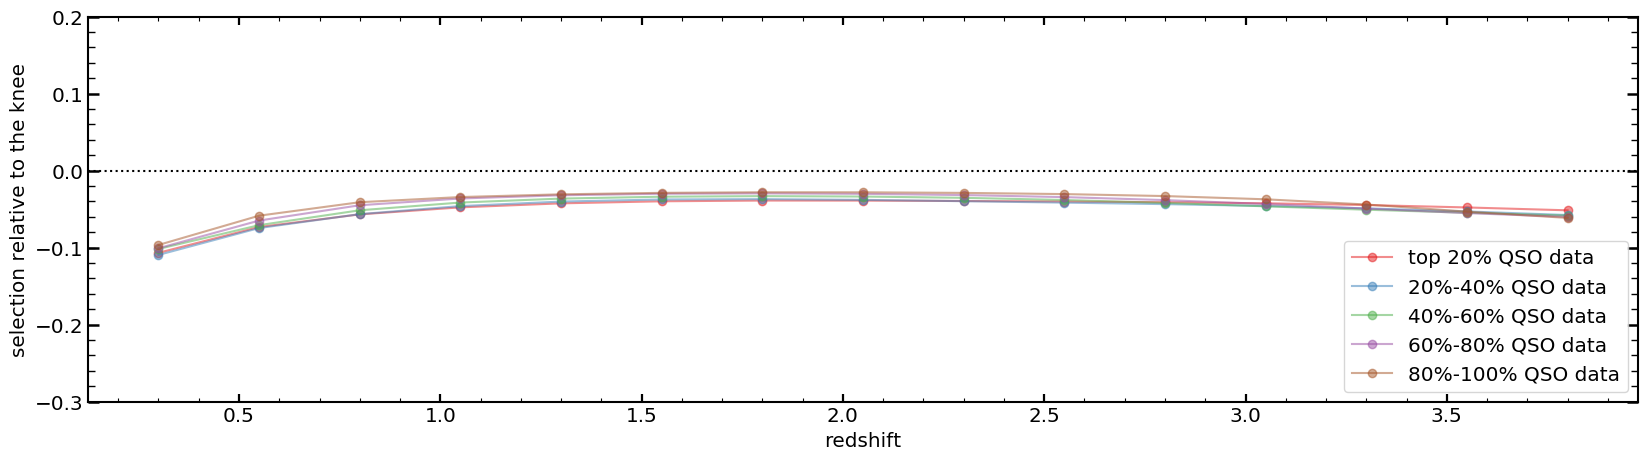

In [911]:

plt.figure(figsize=(20,5))

plt.plot(np.arange(0.3,4.05,0.25),analytical_modified_0,ls='-',color='#e41a1c',alpha=0.5,label='top 20% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),analytical_modified_1,ls='-',color='#377eb8',alpha=0.5,label='20%-40% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),analytical_modified_2,ls='-',color='#4daf4a',alpha=0.5,label='40%-60% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),analytical_modified_3,ls='-',color='#984ea3',alpha=0.5,label='60%-80% QSO data',marker='o')

plt.plot(np.arange(0.3,4.05,0.25),analytical_modified_4,ls='-',color='#a65628',alpha=0.5,label='80%-100% QSO data',marker='o')

plt.axhline(0,color='black',ls=':')
plt.ylim(-0.3,0.2)

plt.ylabel('selection relative to the knee')
plt.xlabel('redshift')
plt.legend()

In [905]:
sigma

0.18819549401315874

In [909]:
l0

[-2.1867886320454866,
 -2.1394071177388487,
 -2.047612085089161,
 -1.94307437815801,
 -1.8650221875315327,
 -1.8425479127594455,
 -1.8823381311246328,
 -1.9692656408259666,
 -2.074834160953779,
 -2.171354378603179,
 -2.243724039956617,
 -2.290174584442472,
 -2.3162598064973845,
 -2.330897746011435,
 -2.346787604967342]

In [ ]:
## Structure function plots (restframe and observed)

In [556]:
def SF(sigma,tau,t_rf):
    # Sfinf = sigma
    # this is in restframe
    SFinf=sigma
    return SFinf*(1-np.exp(-t_rf/tau))**(1/2)

In [557]:
for t in np.arange()
SF(0.3,200,200)

SyntaxError: invalid syntax (<ipython-input-557-775e4e705247>, line 1)

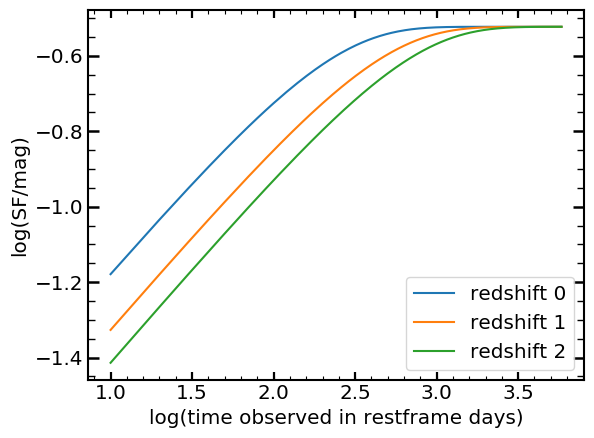

In [558]:
SF0=[]
SF1=[]
SF2=[]

z=0
for t_obs in np.arange(10,16*365,10):
    t_rf=t_obs/(1+z)
    SF0.append(0.3*(1-np.exp(-t_rf/200))**(1/2))
    
z=1
for t_obs in np.arange(10,16*365,10):
    t_rf=t_obs/(1+z)
    SF1.append(0.3*(1-np.exp(-t_rf/200))**(1/2))
    
z=2
for t_obs in np.arange(10,16*365,10):
    t_rf=t_obs/(1+z)
    SF2.append(0.3*(1-np.exp(-t_rf/200))**(1/2))
    
# structure function in the restframe
plt.plot(np.log10(np.arange(10,16*365,10)),np.log10(SF0),label='redshift 0')
plt.plot(np.log10(np.arange(10,16*365,10)),np.log10(SF1),label='redshift 1')
plt.plot(np.log10(np.arange(10,16*365,10)),np.log10(SF2),label='redshift 2')
plt.xlabel('log(time observed in restframe days)')
plt.ylabel('log(SF/mag)')
plt.legend()

In [ ]:
## what is the distribution 

In [466]:
z=1
test=calculate_bias(As=As,Bs=Bs,Cs=Cs,At=At,Bt=Bt,Ct=Ct,mes_position=p0(z)-log_Lstar(z),time_restframe_between=16*365/(1+z),\
                             luminosity_of_knee=log_Lstar(z),restframe_wavelength=4770/(1+z),primary_selection=None,secondary_selection=None)

In [476]:
print(np.mean(test[1]))
print(np.mean(test[2]))

46.21287410530534
46.08030220588658


In [486]:
np.std(test[2]-test[1])

0.2889387157232323

In [489]:
len(test[2])

15829

In [502]:
scipy.stats.kurtosis(np.random.normal(0,0.3,len(test[2])))

-0.050284206640740514

In [504]:
scipy.stats.skew(test[2]-test[1])

0.26565758855833116

(array([  10.,   54.,  200.,  470.,  834., 1252., 1816., 2048., 2118.,
        2031., 1748., 1258.,  879.,  551.,  254.,  151.,   68.,   47.,
          21.,    9.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

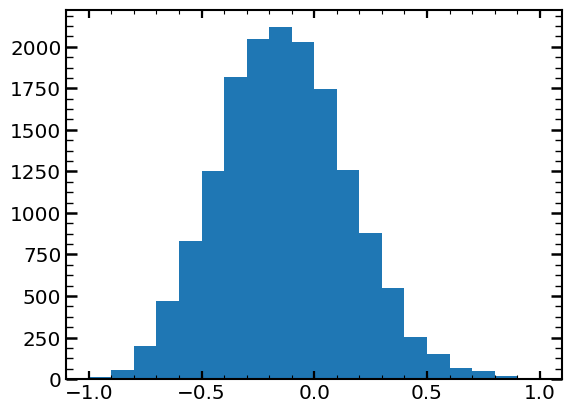

In [485]:
plt.hist(test[2]-test[1],bins=20,range=[-1,1])

In [488]:
scipy.stats.kurtosis(test[2]-test[1])

0.20703891217875947

# Reverse observations 

In [29]:
MAIN_DIRECTORY='/Users/nevencaplar/Documents/Variability/NonStationarity'
DATA_DIRECTORY=MAIN_DIRECTORY+'/Data/'

In [30]:
# we proceed as in the previous section. First we do the standard analysis

matched_array_filtered=np.load(DATA_DIRECTORY+'matched_array_filtered.npy',allow_pickle=True) 

res_delta_redshift_via_redshift_array_g,res_delta_redshift_via_redshift_median_array_g,\
res_delta_redshift_via_redshift_err_array_g,res_delta_redshift_via_redshift_median_err_array_g,\
res_redshift_array_g,p20_array_g,p20_median_array_g,median_mag_values_array_g=\
create_redshift_result(matched_array_filtered,100,sdss_band_column=4,difference_sdss_HSC_columns=14,return_median_mag_values=True)


p20_array_g=[]
for i in range(6):
    res_redshift_array_single_g=res_redshift_array_g[i]
    res_delta_redshift_via_redshift_array_single_g=res_delta_redshift_via_redshift_array_g[i]
    res_delta_redshift_via_redshift_err_array_single_g=res_delta_redshift_via_redshift_err_array_g[i]   
        
    p20_array_g.append(create_p20_values(res_redshift_array_single_g,res_delta_redshift_via_redshift_array_single_g,res_delta_redshift_via_redshift_err_array_single_g))

In [31]:
matched_array_filtered_inverted=np.copy(matched_array_filtered)
sdss_values=np.copy(matched_array_filtered_inverted[:,4])
hsc_values=np.copy(matched_array_filtered_inverted[:,18])
matched_array_filtered_inverted[:,4]=hsc_values
matched_array_filtered_inverted[:,18]=sdss_values

In [32]:
# We do the same analysis with our ``fake sample''
matched_array_fake_QSO=np.load(DATA_DIRECTORY+'matched_array_fake_QSO.npy')
# we verify that this sample also contains 5919 objects
print(len(matched_array_fake_QSO))

res_delta_redshift_via_redshift_fake_QSO_array_g,res_delta_redshift_via_redshift_median_fake_QSO_array_g,\
res_delta_redshift_via_redshift_fake_QSO_err_array_g,res_delta_redshift_via_redshift_median_fake_QSO_err_array_g,\
res_redshift_fake_QSO_array_g,p20_fake_QSO_array_g,p20_median_fake_QSO_array_g=\
create_redshift_result(matched_array_filtered_inverted,100,sdss_band_column=4,difference_sdss_HSC_columns=14)

p20_fake_QSO_array_g=[]
for i in range(6):
    res_redshift_array_fake_QSO_single_g=res_redshift_fake_QSO_array_g[i]
    res_delta_redshift_via_redshift_fake_QSO_array_single_g=res_delta_redshift_via_redshift_fake_QSO_array_g[i]
    res_delta_redshift_via_redshift_fake_QSO_err_array_single_g=res_delta_redshift_via_redshift_fake_QSO_err_array_g[i]   
        
    p20_fake_QSO_array_g.append(create_p20_values(res_redshift_array_fake_QSO_single_g,res_delta_redshift_via_redshift_fake_QSO_array_single_g,\
                                                  res_delta_redshift_via_redshift_fake_QSO_err_array_single_g))

5919


In [33]:
# Here we load filter redshift curves
# we make avaliable calucations with two different AGN templates
from astropy.table import Table

HSC_SDSS_filter_redshift_dependence=Table.read(DATA_DIRECTORY+'dmag_HSC_SDSS_AGN_quasar.fits')
HSC_SDSS_filter_redshift_dependence_redshift=HSC_SDSS_filter_redshift_dependence['redshift'].data

HSC_SDSS_filter_redshift_dependence_dg=HSC_SDSS_filter_redshift_dependence['dg_AGN'].data
HSC_SDSS_filter_redshift_dependence_dr=HSC_SDSS_filter_redshift_dependence['dr_AGN'].data
HSC_SDSS_filter_redshift_dependence_di=HSC_SDSS_filter_redshift_dependence['di_AGN'].data

HSC_SDSS_filter_redshift_dependence_dg_Vandenberk=HSC_SDSS_filter_redshift_dependence['dg_quasar'].data
HSC_SDSS_filter_redshift_dependence_dr_Vandenberk=HSC_SDSS_filter_redshift_dependence['dr_quasar'].data
HSC_SDSS_filter_redshift_dependence_di_Vandenberk=HSC_SDSS_filter_redshift_dependence['di_quasar'].data

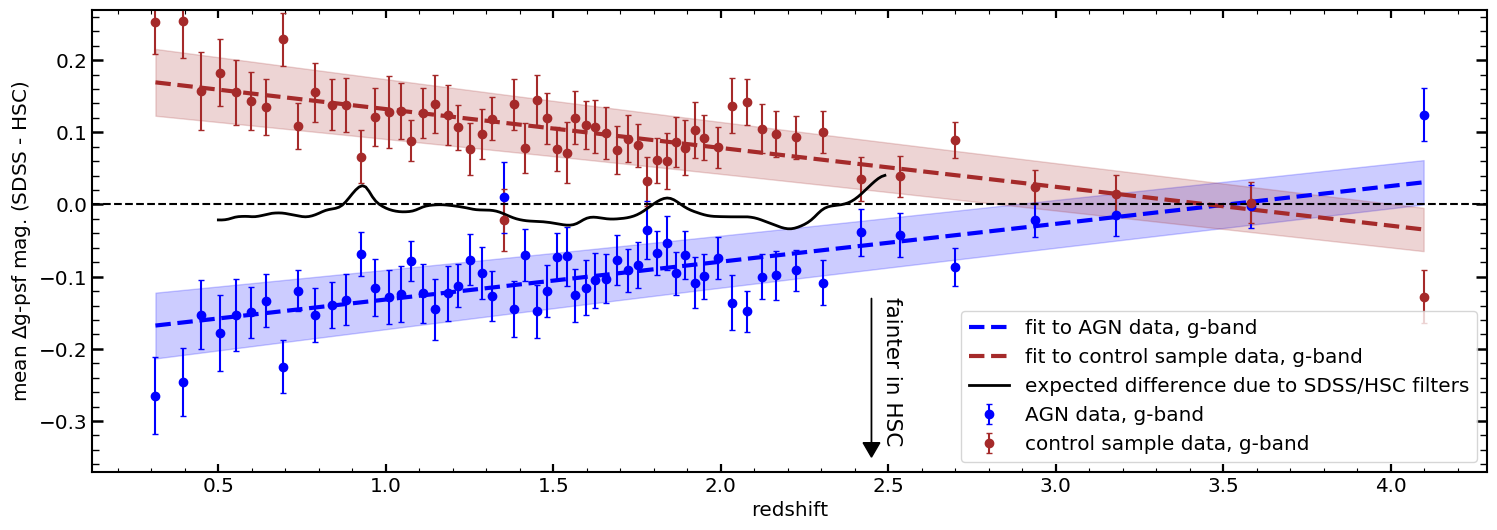

In [19]:
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(18,6))

# data points for the QSO data
plt.errorbar(res_redshift_array_g[0],res_delta_redshift_via_redshift_array_g[0],yerr=res_delta_redshift_via_redshift_err_array_g[0],\
             marker='o',capsize=2,ls='',color='blue',label='AGN data, g-band')
# data points for the nonvariable stars data
plt.errorbar(res_redshift_fake_QSO_array_g[0],res_delta_redshift_via_redshift_fake_QSO_array_g[0],yerr=res_delta_redshift_via_redshift_fake_QSO_err_array_g[0],\
             marker='o',capsize=2,ls='',color='brown',label='control sample data, g-band')

# fit and the prediction band for the QSO data
plt.plot(res_redshift_array_g[0],p20_array_g[0][0],ls='--',color='blue',lw=3,label='fit to AGN data, g-band')
plt.fill_between(res_redshift_array_g[0], p20_array_g[0][2],p20_array_g[0][1], color='blue', alpha='0.2')

# fit and the prediciton band for the nonvariable stars data
plt.plot(res_redshift_fake_QSO_array_g[0],p20_fake_QSO_array_g[0][0],ls='--',color='brown',lw=3,label='fit to control sample data, g-band')
plt.fill_between(res_redshift_fake_QSO_array_g[0], p20_fake_QSO_array_g[0][2],p20_fake_QSO_array_g[0][1],\
                 color='brown', alpha='0.2')

# filter difference between SDSS and HSC
plt.plot(HSC_SDSS_filter_redshift_dependence_redshift,-HSC_SDSS_filter_redshift_dependence_dg_Vandenberk,\
         ls='-',color='black',lw=2,label='expected difference due to SDSS/HSC filters')

plt.arrow(2.45,-0.13,-0.,-0.2,head_length=0.02,head_width=0.05,color='black')
plt.text(2.48,-0.15,'fainter in HSC',rotation=270,size=15.5)

plt.ylabel('mean $\Delta$g-psf mag. (SDSS - HSC)')
plt.xlabel('redshift')
plt.ylim(-0.37,0.27)
plt.axhline(0,color='black',ls='--')
plt.legend()

plt.savefig(FIGURES_PDF_DIRECTORY + 'Figure2_filter_and_control_sample.pdf', bbox_inches='tight')
plt.savefig(FIGURES_PNG_DIRECTORY + 'Figure2_filter_and_control_sample.png', bbox_inches='tight')

In [21]:
res_delta_redshift_via_redshift_array_g,res_delta_redshift_via_redshift_median_array_g,\
res_delta_redshift_via_redshift_err_array_g,res_delta_redshift_via_redshift_median_err_array_g,\
res_redshift_array_g,p20_array_g,p20_median_array_g,median_mag_values_array_g=\
create_redshift_result(matched_array_filtered_inverted,250,sdss_band_column=4,difference_sdss_HSC_columns=14,return_median_mag_values=True)


p20_array_g=[]
for i in range(6):
    res_redshift_array_single_g=res_redshift_array_g[i]
    res_delta_redshift_via_redshift_array_single_g=res_delta_redshift_via_redshift_array_g[i]
    res_delta_redshift_via_redshift_err_array_single_g=res_delta_redshift_via_redshift_err_array_g[i]   
        
    p20_array_g.append(create_p20_values(res_redshift_array_single_g,res_delta_redshift_via_redshift_array_single_g,res_delta_redshift_via_redshift_err_array_single_g))

    
# Here we calculate mean error of the fit to the different brightness bins
upper_limit_many=[]
lower_limit_many=[]
for i in range(1,6):
    lower_limit_single=-np.abs(p20_array_g[i][0]-p20_array_g[i][2])
    upper_limit_single=np.abs((p20_array_g[i][1]-p20_array_g[i][0]))
    upper_limit_many.append(upper_limit_single)
    lower_limit_many.append(lower_limit_single)

upper_limit_many_mean=np.mean(np.array(upper_limit_many),axis=0)
lower_limit_many_mean=np.mean(np.array(lower_limit_many),axis=0)

mean_err_single_point=np.mean([np.mean(res_delta_redshift_via_redshift_err_array_g[1]),np.mean(res_delta_redshift_via_redshift_err_array_g[2]),\
        np.mean(res_delta_redshift_via_redshift_err_array_g[3]),np.mean(res_delta_redshift_via_redshift_err_array_g[4]),\
       np.mean(res_delta_redshift_via_redshift_err_array_g[5])])

Text(0.5,0,'redshift')

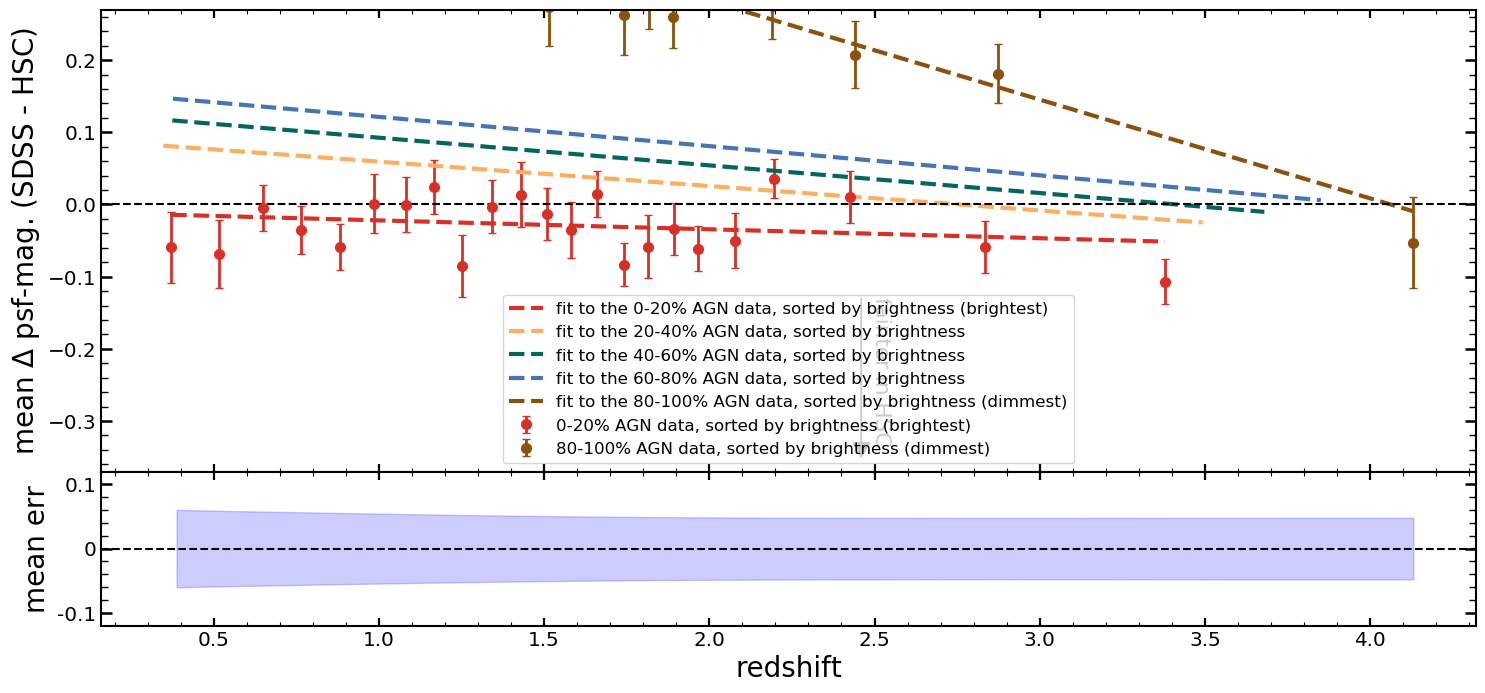

In [22]:

fig = plt.figure(figsize=(24, 8))
# Set up the axes with gridspec
grid = plt.GridSpec(4, 4, hspace=0., wspace=0.2)
# Set up main panel
main_ax = fig.add_subplot(grid[:-1, 1:])
# Set up smaller panel which contains uncertainty
err_ax = fig.add_subplot(grid[-1, 1:], yticklabels=[-0.1,0,0.1], sharex=main_ax)

# fit to all bands
main_ax.plot(res_redshift_array_g[1],p20_array_g[1][0],ls='--',color='#d73027',alpha=1,lw=3,
             label='fit to the 0-20% AGN data, sorted by brightness (brightest)')
main_ax.plot(res_redshift_array_g[2],p20_array_g[2][0],ls='--',color='#fdae61',alpha=1,lw=3,
             label='fit to the 20-40% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[3],p20_array_g[3][0],ls='--',color='#01665e',alpha=1,lw=3,
             label='fit to the 40-60% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[4],p20_array_g[4][0],ls='--',color='#4575b4',alpha=1,lw=3,
             label='fit to the 60-80% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[5],p20_array_g[5][0],ls='--',color='#8c510a',alpha=1,lw=3,
             label='fit to the 80-100% AGN data, sorted by brightness (dimmest)')


# uncomment to see individual datapoints

main_ax.errorbar(res_redshift_array_g[1],res_delta_redshift_via_redshift_array_g[1],yerr=res_delta_redshift_via_redshift_err_array_g[1],\
             marker='o',markersize=7,elinewidth=2,ls='',color='#d73027',label='0-20% AGN data, sorted by brightness (brightest)')
#main_ax.errorbar(res_redshift_array_g[2],res_delta_redshift_via_redshift_array_g[2],yerr=res_delta_redshift_via_redshift_err_array_g[2],\
#             marker='o',markersize=7,elinewidth=2,ls='',color='#fdae61',label='20-40% AGN data, sorted by brightness')
#main_ax.errorbar(res_redshift_array_g[3],res_delta_redshift_via_redshift_array_g[3],yerr=res_delta_redshift_via_redshift_err_array_g[3],\
#             marker='o',markersize=7,elinewidth=2,ls='',color='#01665e',label='40-60% AGN data, sorted by brightness')
#main_ax.errorbar(res_redshift_array_g[4],res_delta_redshift_via_redshift_array_g[4],yerr=res_delta_redshift_via_redshift_err_array_g[4],\
#             marker='o',markersize=7,elinewidth=2,ls='',color='#4575b4',label='60-80% AGN data, sorted by brightness')
main_ax.errorbar(res_redshift_array_g[5],res_delta_redshift_via_redshift_array_g[5],yerr=res_delta_redshift_via_redshift_err_array_g[5],\
             marker='o',markersize=7,elinewidth=2,ls='',color='#8c510a',label='80-100% AGN data, sorted by brightness (dimmest)')

# uncomment in order to see uncertainty bands on the main plot

#main_ax.fill_between(res_redshift_array_g[1],p20_array_g[1][2],p20_array_g[1][1], color='#d73027', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[2],p20_array_g[2][2],p20_array_g[2][1], color='#fdae61', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[3],p20_array_g[3][2],p20_array_g[3][1], color='#01665e', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[4],p20_array_g[4][2],p20_array_g[4][1], color='#4575b4', alpha='0.2')
#main_ax.fill_between(res_redshift_array_g[5],p20_array_g[5][2],p20_array_g[5][1], color='#8c510a', alpha='0.2')

# data for the whole dataset
#main_ax.errorbar(res_redshift_array_g[0],res_delta_redshift_via_redshift_array_g[0],yerr=res_delta_redshift_via_redshift_err_array_g[0],\
#                 marker='o',capsize=2,ls='',color='blue',label='QSO data, g-band')

main_ax.set_ylabel('mean $\Delta$ psf-mag. (SDSS - HSC)',fontsize=20)
main_ax.set_xlabel('redshift',fontsize=20)
main_ax.set_ylim(-0.37,0.27)
main_ax.axhline(0,color='black',ls='--')
main_ax.legend(fontsize=12)

main_ax.arrow(2.46,-0.13,-0.,-0.2,head_length=0.02,head_width=0.05,color='black')
main_ax.text(2.49,-0.15,'fainter in HSC',rotation=270,size=15.5)

# smaller plot showing prediction bands
err_ax.fill_between(res_redshift_array_g[5],lower_limit_many_mean,upper_limit_many_mean, color='blue', alpha='0.2')

# individual prediction bands
# you can see that more luminous objects have somewhat smaller uncertanies, as expected given that AGN variability decreases as luminosity increses

#err_ax.plot(res_redshift_array_g[1],-np.abs(p20_array_g[1][0]-p20_array_g[1][2]), color='#d73027',ls='--')
#err_ax.plot(res_redshift_array_g[1],np.abs(p20_array_g[1][1]-p20_array_g[1][0]), color='#d73027', ls='--')
#err_ax.plot(res_redshift_array_g[2],-np.abs(p20_array_g[2][0]-p20_array_g[2][2]), color='#fdae61',ls='--')
#err_ax.plot(res_redshift_array_g[2],np.abs(p20_array_g[2][1]-p20_array_g[2][0]), color='#fdae61', ls='--')
#err_ax.plot(res_redshift_array_g[3],-np.abs(p20_array_g[3][0]-p20_array_g[3][2]), color='#01665e',ls='--')
#err_ax.plot(res_redshift_array_g[3],np.abs(p20_array_g[3][1]-p20_array_g[3][0]), color='#01665e', ls='--')
#err_ax.plot(res_redshift_array_g[4],-np.abs(p20_array_g[4][0]-p20_array_g[4][2]), color='#4575b4',ls='--')
#err_ax.plot(res_redshift_array_g[4],np.abs(p20_array_g[4][1]-p20_array_g[4][0]), color='#4575b4', ls='--')
#err_ax.plot(res_redshift_array_g[5],-np.abs(p20_array_g[5][0]-p20_array_g[5][2]), color='#8c510a',ls='--')
#err_ax.plot(res_redshift_array_g[5],np.abs(p20_array_g[5][1]-p20_array_g[5][0]), color='#8c510a', ls='--')

err_ax.set_ylim(-0.12,0.12)
err_ax.set_yticks([-0.1,0,0.1])
err_ax.axhline(0,color='black',ls='--')
err_ax.set_ylabel('mean err',fontsize=20)
err_ax.set_xlabel('redshift',fontsize=20)

# Emcee search

In [81]:
import emcee

In [82]:
emcee.__version__

'3.0.3.dev4+gc14b212'

In [138]:
As=-0.218
Bs=-0.479
Cs=-0.06*2.5
At=2.2
Bt=0.17
Ct=-0.01


In [139]:
# analytical equation for bias 
def bias_via_analytical_derivative_2(As,Bs,Cs,At,Bt,Ct,l,restframe_wavelength,t):
    """Construct model image from parameters

    l                          luminosity (in dex)
    restframe_wavelength       restframe_wavelength
    t                          time spent between observations in restframe
    
    
    @returns                   bias given the parameters
    """    
    
    sigma_inf=(10**(As+Bs*np.log10(restframe_wavelength/4000)+Cs*(l-45)))/2.5
    log_tau=At+Bt*np.log10(restframe_wavelength/4000)+Ct*(l-45)
    tau=10**(log_tau)
    sigma_effective=sigma_inf*(1-np.exp(-t/tau))**(1/2)    
    
    #print(sigma_inf)   
    print('sigma_effective: '+str(sigma_effective))
    print('tau: '+str(tau))
    
    return np.log(10)*(sigma_effective)**2*(analytical_derivative(0.5,2.5,l,0))*0.4-np.log(10)*(sigma_effective)**4*(analytical_derivative_2(0.5,2.5,l,0))*0.4*(1/2)

In [126]:
# p arrays are created in Section 2.4 pi redshift evolution # in relation to the knee of the QLF (what is given by p_i(z)-log_Lstar(z), where _i is 0,1,2,3 or 4)

In [ ]:
# res_redshift_array_g contains information about redshift of each point 
# 

In [140]:
# 4770/(1+z) for g-band

fake_data_0=[]
fake_data_1=[]
fake_data_2=[]
fake_data_3=[]
fake_data_4=[]

for z_value in res_redshift_array_g[1]:
    fake_data_0.append(bias_via_analytical_derivative_2(As,Bs,Cs,At,Bt,Ct,p0(z_value),4770/(1+z_value),(16.89*365)/(1+z_value)))
for z_value in res_redshift_array_g[2]:
    fake_data_1.append(bias_via_analytical_derivative_2(As,Bs,Cs,At,Bt,Ct,p1(z_value),4770/(1+z_value),(16.89*365)/(1+z_value)))
for z_value in res_redshift_array_g[3]:
    fake_data_2.append(bias_via_analytical_derivative_2(As,Bs,Cs,At,Bt,Ct,p2(z_value),4770/(1+z_value),(16.89*365)/(1+z_value)))
for z_value in res_redshift_array_g[4]:
    fake_data_3.append(bias_via_analytical_derivative_2(As,Bs,Cs,At,Bt,Ct,p3(z_value),4770/(1+z_value),(16.89*365)/(1+z_value)))
for z_value in res_redshift_array_g[5]:
    fake_data_4.append(bias_via_analytical_derivative_2(As,Bs,Cs,At,Bt,Ct,p4(z_value),4770/(1+z_value),(16.89*365)/(1+z_value)))

    

sigma_effective: 0.23217217471809332
tau: 155.22319719308143
sigma_effective: 0.22425006344657236
tau: 152.75870087413324
sigma_effective: 0.22076522801717324
tau: 151.53463684746404
sigma_effective: 0.21704466950764553
tau: 150.0883411283599
sigma_effective: 0.21487281862040303
tau: 149.15348800766728
sigma_effective: 0.2127913145146582
tau: 148.171575692982
sigma_effective: 0.2107980424322012
tau: 147.12412841982572
sigma_effective: 0.2093746633964622
tau: 146.28745395065368
sigma_effective: 0.20809549293002086
tau: 145.4472246611282
sigma_effective: 0.2068172483046706
tau: 144.48805959053274
sigma_effective: 0.2058718452698018
tau: 143.66481975841916
sigma_effective: 0.20517248976630892
tau: 142.96197644128264
sigma_effective: 0.2045514919538878
tau: 142.23705160422378
sigma_effective: 0.20412043633288438
tau: 141.6503768604691
sigma_effective: 0.20373688792018135
tau: 141.04064528284766
sigma_effective: 0.20342890058288796
tau: 140.45922487206678
sigma_effective: 0.2032569522005956

Text(0.5,0,'redshift')

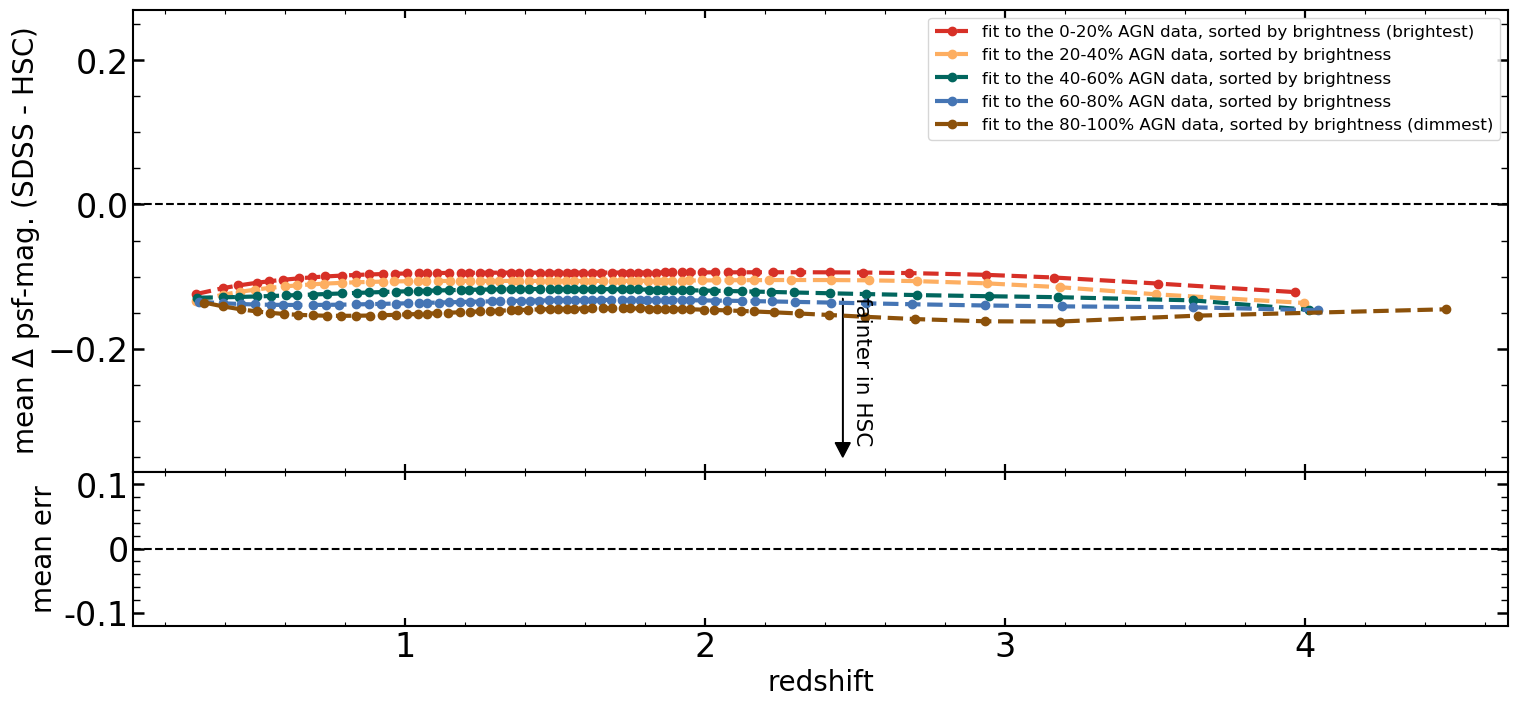

In [141]:

fig = plt.figure(figsize=(24, 8))
# Set up the axes with gridspec
grid = plt.GridSpec(4, 4, hspace=0., wspace=0.2)
# Set up main panel
main_ax = fig.add_subplot(grid[:-1, 1:])
# Set up smaller panel which contains uncertainty
err_ax = fig.add_subplot(grid[-1, 1:], yticklabels=[-0.1,0,0.1], sharex=main_ax)

# fit to all bands
main_ax.plot(res_redshift_array_g[1],fake_data_0,ls='--',color='#d73027',alpha=1,lw=3,marker='o',
             label='fit to the 0-20% AGN data, sorted by brightness (brightest)')
main_ax.plot(res_redshift_array_g[2],fake_data_1,ls='--',color='#fdae61',alpha=1,lw=3,marker='o',
             label='fit to the 20-40% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[3],fake_data_2,ls='--',color='#01665e',alpha=1,lw=3,marker='o',
             label='fit to the 40-60% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[4],fake_data_3,ls='--',color='#4575b4',alpha=1,lw=3,marker='o',
             label='fit to the 60-80% AGN data, sorted by brightness')
main_ax.plot(res_redshift_array_g[5],fake_data_4,ls='--',color='#8c510a',alpha=1,lw=3,marker='o',
             label='fit to the 80-100% AGN data, sorted by brightness (dimmest)')



main_ax.set_ylabel('mean $\Delta$ psf-mag. (SDSS - HSC)',fontsize=20)
main_ax.set_xlabel('redshift',fontsize=20)
main_ax.set_ylim(-0.37,0.27)
main_ax.axhline(0,color='black',ls='--')
main_ax.legend(fontsize=12)

main_ax.arrow(2.46,-0.13,-0.,-0.2,head_length=0.02,head_width=0.05,color='black')
main_ax.text(2.49,-0.15,'fainter in HSC',rotation=270,size=15.5)

# smaller plot showing prediction bands
# individual prediction bands
# you can see that more luminous objects have somewhat smaller uncertanies, as expected given that AGN variability decreases as luminosity increses

#err_ax.plot(res_redshift_array_g[1],-np.abs(p20_array_g[1][0]-p20_array_g[1][2]), color='#d73027',ls='--')
#err_ax.plot(res_redshift_array_g[1],np.abs(p20_array_g[1][1]-p20_array_g[1][0]), color='#d73027', ls='--')
#err_ax.plot(res_redshift_array_g[2],-np.abs(p20_array_g[2][0]-p20_array_g[2][2]), color='#fdae61',ls='--')
#err_ax.plot(res_redshift_array_g[2],np.abs(p20_array_g[2][1]-p20_array_g[2][0]), color='#fdae61', ls='--')
#err_ax.plot(res_redshift_array_g[3],-np.abs(p20_array_g[3][0]-p20_array_g[3][2]), color='#01665e',ls='--')
#err_ax.plot(res_redshift_array_g[3],np.abs(p20_array_g[3][1]-p20_array_g[3][0]), color='#01665e', ls='--')
#err_ax.plot(res_redshift_array_g[4],-np.abs(p20_array_g[4][0]-p20_array_g[4][2]), color='#4575b4',ls='--')
#err_ax.plot(res_redshift_array_g[4],np.abs(p20_array_g[4][1]-p20_array_g[4][0]), color='#4575b4', ls='--')
#err_ax.plot(res_redshift_array_g[5],-np.abs(p20_array_g[5][0]-p20_array_g[5][2]), color='#8c510a',ls='--')
#err_ax.plot(res_redshift_array_g[5],np.abs(p20_array_g[5][1]-p20_array_g[5][0]), color='#8c510a', ls='--')

err_ax.set_ylim(-0.12,0.12)
err_ax.set_yticks([-0.1,0,0.1])
err_ax.axhline(0,color='black',ls='--')
err_ax.set_ylabel('mean err',fontsize=20)
err_ax.set_xlabel('redshift',fontsize=20)

In [106]:
print(As,Bs,Cs,At,Bt,Ct)
print(p0(z_value)-log_Lstar(z_value))
print(4770/(1+z_value))
print((16.89*365)/(1+z_value))

-0.618 -0.479 -0.22499999999999998 2.2 0.17 -0.01
0.2176899492181832
2385.0
3082.425


# Array for Silverman

In [42]:
matched_array_filtered=np.load(DATA_DIRECTORY+'matched_array_filtered.npy',allow_pickle=True )


dr7_bh_Shen=astropy.io.fits.open('/Users/nevencaplar/Documents/Variability/Lia_Data/dr7_bh_May01_2011.fits')[1].data

In [78]:
dr7_bh_Shen[-1]

('235959.44+000841.5', 359.9976806640625, 0.14486999809741974, 1.354200005531311, 1489, 520, 52991, 33554432, 1, 0, -24.381804694707796, 45.77310053221589, 0.017705038231497383, 0, 0, 0.0, -27.691871697433704, -1.0, 0.0, -1.0, 45.0612933031747, 0.017705038231497383, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -999.0, -1.0, 0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -999.0, -1.0, 0, 0.0, -1.0, 43.33390168484716, 0.03388882711493224, 4608.716583293832, 310.46983500999204, 52.535639868296904, 4.4339247315346455, 43.33390168484716, 0.03103902924423707, 4608.526614792371, 288.30255891587285, 52.610042044353264, 4.848248624284054, 4608.526614792371, 110.57194130489147, 44.165746727801455, -0.9707685243132907, 0.11088167465848958, 310, 4.97899445314212, 0.98287057129568, 0.0, -1.0, 0.0, -1

In [43]:
# we extract SDSS id, redshift, luminosity, mass, and Eddington ratio
# takes around 30 seconds on my laptop
dr7_properties=[]
for i in tqdm(range(len(dr7_bh_Shen))):
    dr7_properties.append([dr7_bh_Shen[i][0],dr7_bh_Shen[i][3],dr7_bh_Shen[i][11],dr7_bh_Shen[i][138],dr7_bh_Shen[i][140]])
    
dr7_properties=np.array(dr7_properties)

100%|██████████| 105783/105783 [00:26<00:00, 4040.16it/s]


In [46]:
dr7_properties

array([['000006.53+003055.2', '1.8245999813079834', '46.03577387405987',
        '9.284316226710514', '-1.3489128977682086'],
       ['000008.13+001634.6', '1.8372999429702759', '46.3763261532616',
        '9.169479508191511', '-0.8935239000474766'],
       ['000009.26+151754.5', '1.1985000371932983', '46.160708974838414',
        '8.499873716556575', '-0.43953528683572785'],
       ...,
       ['235958.72+003345.3', '1.6936999559402466', '46.281543502311074',
        '9.26727179183075', '-1.0860988346372409'],
       ['235959.06-090944.0', '1.283400058746338', '46.626351904385736',
        '9.024542605246385', '-0.49856124597821605'],
       ['235959.44+000841.5', '1.354200005531311', '45.77310053221589',
        '8.72512604783979', '-1.052396060741465']], dtype='<U23')

In [44]:
# we extend the ``matched_array_filtered'' array with the physical properties found in the previous cell
# takes around 20 seconds on my laptop
matched_array_filtered_dr7_extension=[]
for i in tqdm(range(len(matched_array_filtered))):
    matched_array_filtered_dr7_extension.append((dr7_properties[dr7_properties[:,0]==matched_array_filtered[i][0]])[0])
    
matched_array_filtered_dr7_extension=np.array(matched_array_filtered_dr7_extension)

100%|██████████| 5919/5919 [00:19<00:00, 311.07it/s]


In [64]:
matched_array_filtered[:,0][matched_array_filtered_dr7_extension[:,1].astype(float)<1].shape

(1440,)

In [58]:
matched_array_filtered[:,0][matched_array_filtered_dr7_extension[:,1].astype(float)<1]

array(['000017.88+002612.6', '000104.52+002753.7', '000141.43+002356.3',
       ..., '235926.26-004750.4', '235930.42+003733.5',
       '235942.35+001338.2'], dtype=object)

In [60]:
matched_array_filtered[:,2][matched_array_filtered_dr7_extension[:,1].astype(float)<1]

array([0.436838, 0.46494399999999997, 0.398987, ..., -0.7973439999999999,
       0.6259899999999999, 0.22729899999999997], dtype=object)

In [63]:
matched_array_filtered_dr7_extension[:,1][matched_array_filtered_dr7_extension[:,1].astype(float)<1].astype(float)

array([0.54570001, 0.55119997, 0.93290001, ..., 0.39610001, 0.86189997,
       0.97829998])

In [72]:
matched_array_below_redshift_1_SDSSID_ra_dec_redshift=np.zeros((1440,4))
matched_array_below_redshift_1_SDSSID_ra_dec_redshift=matched_array_below_redshift_1_SDSSID_ra_dec_redshift.astype('object')
matched_array_below_redshift_1_SDSSID_ra_dec_redshift[:,0]=matched_array_filtered[:,0][matched_array_filtered_dr7_extension[:,1].astype(float)<1]
matched_array_below_redshift_1_SDSSID_ra_dec_redshift[:,1]=matched_array_filtered[:,1][matched_array_filtered_dr7_extension[:,1].astype(float)<1]
matched_array_below_redshift_1_SDSSID_ra_dec_redshift[:,2]=matched_array_filtered[:,2][matched_array_filtered_dr7_extension[:,1].astype(float)<1]
matched_array_below_redshift_1_SDSSID_ra_dec_redshift[:,3]=matched_array_filtered_dr7_extension[:,1][matched_array_filtered_dr7_extension[:,1].astype(float)<1].astype(float)

In [74]:
np.save('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/matched_array_below_redshift_1_SDSSID_ra_dec_redshift',matched_array_below_redshift_1_SDSSID_ra_dec_redshift)

In [75]:
matched_array_below_redshift_1_SDSSID_ra_dec_redshift

array([['000017.88+002612.6', 0.07453, 0.436838, 0.5457000136375427],
       ['000104.52+002753.7', 0.268872, 0.46494399999999997,
        0.5511999726295471],
       ['000141.43+002356.3', 0.42264399999999996, 0.398987,
        0.9329000115394592],
       ...,
       ['235926.26-004750.4', 359.85942, -0.7973439999999999,
        0.3961000144481659],
       ['235930.42+003733.5', 359.876758, 0.6259899999999999,
        0.8618999719619751],
       ['235942.35+001338.2', 359.926477, 0.22729899999999997,
        0.9782999753952026]], dtype=object)

In [76]:
matched_array_filtered_dr7_extension

array([['000006.53+003055.2', '1.8245999813079834', '46.03577387405987',
        '9.284316226710514', '-1.3489128977682086'],
       ['000008.13+001634.6', '1.8372999429702759', '46.3763261532616',
        '9.169479508191511', '-0.8935239000474766'],
       ['000012.25-003220.5', '1.4364999532699585', '45.804670154931976',
        '8.59142526568717', '-0.887125655872758'],
       ...,
       ['235958.66-011225.3', '1.7718000411987305', '46.654911646273966',
        '9.223171200693626', '-0.668630099537225'],
       ['235958.72+003345.3', '1.6936999559402466', '46.281543502311074',
        '9.26727179183075', '-1.0860988346372409'],
       ['235959.44+000841.5', '1.354200005531311', '45.77310053221589',
        '8.72512604783979', '-1.052396060741465']], dtype='<U23')

In [80]:
import numpy as np
matched_array_below_redshift_1_SDSSID_ra_dec_redshift=np.load('/Users/nevencaplar/Documents/Variability/AGN-Going-Down-Extended/matched_array_below_redshift_1_SDSSID_ra_dec_redshift.npy',allow_pickle=True)

## check of brightness (again)

In [12]:
MAIN_DIRECTORY='/Users/nevencaplar/Documents/Variability/NonStationarity'
DATA_DIRECTORY=MAIN_DIRECTORY+'/Data/'

# load the master array having all information created in the previous section
matched_array_filtered=np.load(DATA_DIRECTORY+'matched_array_filtered.npy',allow_pickle=True) 

In [ ]:
# sdss_band_column=4,difference_sdss_HSC_columns=14

In [42]:
matched_array_filtered_single_redshift=matched_array_filtered[(1.2<matched_array_filtered[:,3]) & (matched_array_filtered[:,3]<1.4)]

# sdss g-band 
matched_array_filtered_single_redshift[:,4]

# HSC g-band 
matched_array_filtered_single_redshift[:,18]

# difference between sdss g-band and HSC g-band
# negative values means that the system got fainter in HSC
matched_array_filtered_single_redshift[:,4]-matched_array_filtered_single_redshift[:,18]

array([-0.5206230000000005, 0.24025930000000173, -0.40768290000000107,
       0.10664249999999598, -0.5278078000000015, -0.05972749999999749,
       -0.29823869999999886, 0.1122437000000005, 0.19149379999999994,
       0.03493890000000022, 0.17218999999999696, -0.4300493999999979,
       0.28297280000000313, 0.12435110000000194, -0.05413850000000053,
       -0.08529169999999908, 0.35328220000000243, -0.22346480000000213,
       -0.47342739999999495, 0.0969149999999992, 0.2916339999999984,
       -0.03207569999999649, -0.36132470000000083, 0.03698919999999717,
       -0.15758410000000111, 0.3286933999999988, 0.00031619999999676907,
       -0.352761399999995, -0.15609639999999558, 0.290685400000001,
       -0.05991029999999853, -0.0040156000000024505,
       0.0037509000000000015, -0.34159800000000473, -0.026450300000000482,
       -0.037584699999996474, -0.4891450000000006, -0.0539404999999995,
       0.14859930000000077, 0.31694260000000085, -0.09254539999999878,
       -0.685398100000

In [43]:
sorting_by_sdss_brigthness=np.argsort(matched_array_filtered_single_redshift[:,4])

SDSS_brigthness_sorted=matched_array_filtered_single_redshift[:,4][sorting_by_sdss_brigthness]
dif_sorted=matched_array_filtered_single_redshift[:,4][sorting_by_sdss_brigthness]-matched_array_filtered_single_redshift[:,18][sorting_by_sdss_brigthness]

In [44]:
SDSS_brigthness_sorted_split=np.array_split(SDSS_brigthness_sorted,20)
dif_sorted_split=np.array_split(dif_sorted,20)

SDSS_brigthness_sorted_split_mean=[]
dif_sorted_split_mean=[]

SDSS_brigthness_sorted_split_median=[]
dif_sorted_split_median=[]

for i in range(len(SDSS_brigthness_sorted_split)):
    SDSS_brigthness_sorted_split_mean.append(np.mean(SDSS_brigthness_sorted_split[i]))
    dif_sorted_split_mean.append(np.mean(dif_sorted_split[i]))
    SDSS_brigthness_sorted_split_median.append(np.median(SDSS_brigthness_sorted_split[i]))
    dif_sorted_split_median.append(np.median(dif_sorted_split[i]))

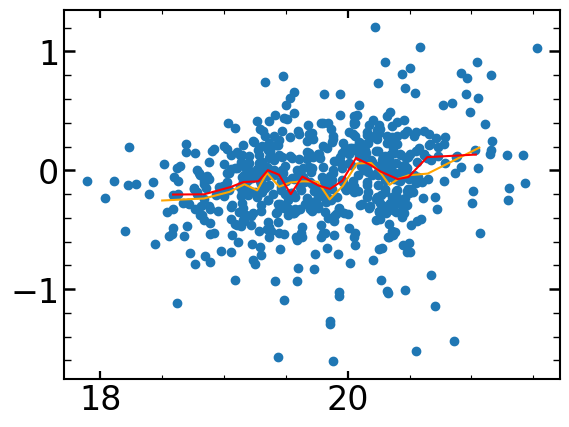

In [45]:
plt.scatter(matched_array_filtered_single_redshift[:,4],matched_array_filtered_single_redshift[:,4]-matched_array_filtered_single_redshift[:,18])
plt.plot(SDSS_brigthness_sorted_split_mean,dif_sorted_split_mean,color='orange')
plt.plot(SDSS_brigthness_sorted_split_median,dif_sorted_split_median,color='red')

(-0.5, 0.5)

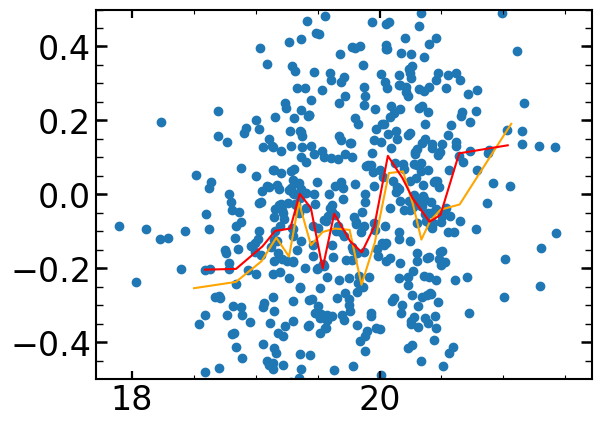

In [46]:
plt.scatter(matched_array_filtered_single_redshift[:,4],matched_array_filtered_single_redshift[:,4]-matched_array_filtered_single_redshift[:,18])
plt.plot(SDSS_brigthness_sorted_split_mean,dif_sorted_split_mean,color='orange')
plt.plot(SDSS_brigthness_sorted_split_median,dif_sorted_split_median,color='red')

plt.ylim(-0.5,0.5)

In [47]:
matched_array_filtered_single_redshift=matched_array_filtered[(0<matched_array_filtered[:,3]) & (matched_array_filtered[:,3]<0.6)]

# sdss g-band 
matched_array_filtered_single_redshift[:,4]

# HSC g-band 
matched_array_filtered_single_redshift[:,18]

# difference between sdss g-band and HSC g-band
# negative values means that the system got fainter in HSC
matched_array_filtered_single_redshift[:,4]-matched_array_filtered_single_redshift[:,18]

array([-0.22175370000000072, -1.321944600000002, 0.050746700000001255,
       -0.2614941000000002, 0.3875583999999961, 0.13548070000000223,
       0.08313890000000157, 0.3042473000000001, -0.003341999999999956,
       -0.130032700000001, -1.3147300999999985, 0.10945209999999861,
       -0.15828730000000135, -0.29340720000000076, 0.9664570000000019,
       -0.2405303000000032, -0.0966616000000009, -0.016419500000001364,
       -0.3858426000000037, 0.2606268000000007, 0.39095639999999676,
       -0.03343969999999885, 0.030651600000002333, -0.141922399999995,
       -0.26475500000000096, 0.26707789999999676, -0.29553200000000146,
       0.2630903999999994, 0.5406813999999969, 0.08331470000000252,
       -0.11436249999999859, 0.18762089999999887, -0.37449599999999705,
       -0.23701050000000023, 0.0571483999999991, 0.42175889999999683,
       0.20859319999999926, 0.017261800000003547, 0.1186708000000003,
       -0.24038949999999915, -0.600323999999997, -0.502059599999999,
       -0.087652

In [48]:
sorting_by_sdss_brigthness=np.argsort(matched_array_filtered_single_redshift[:,4])

SDSS_brigthness_sorted=matched_array_filtered_single_redshift[:,4][sorting_by_sdss_brigthness]
dif_sorted=matched_array_filtered_single_redshift[:,4][sorting_by_sdss_brigthness]-matched_array_filtered_single_redshift[:,18][sorting_by_sdss_brigthness]

In [49]:
SDSS_brigthness_sorted_split=np.array_split(SDSS_brigthness_sorted,20)
dif_sorted_split=np.array_split(dif_sorted,20)

SDSS_brigthness_sorted_split_mean=[]
dif_sorted_split_mean=[]

SDSS_brigthness_sorted_split_median=[]
dif_sorted_split_median=[]

for i in range(len(SDSS_brigthness_sorted_split)):
    SDSS_brigthness_sorted_split_mean.append(np.mean(SDSS_brigthness_sorted_split[i]))
    dif_sorted_split_mean.append(np.mean(dif_sorted_split[i]))
    SDSS_brigthness_sorted_split_median.append(np.median(SDSS_brigthness_sorted_split[i]))
    dif_sorted_split_median.append(np.median(dif_sorted_split[i]))

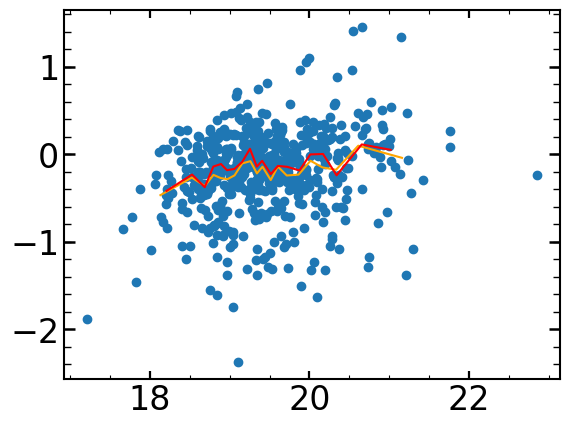

In [50]:
plt.scatter(matched_array_filtered_single_redshift[:,4],matched_array_filtered_single_redshift[:,4]-matched_array_filtered_single_redshift[:,18])
plt.plot(SDSS_brigthness_sorted_split_mean,dif_sorted_split_mean,color='orange')
plt.plot(SDSS_brigthness_sorted_split_median,dif_sorted_split_median,color='red')

(-0.5, 0.5)

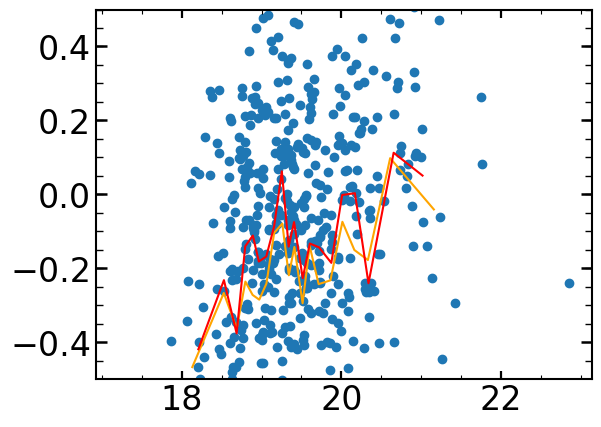

In [51]:
plt.scatter(matched_array_filtered_single_redshift[:,4],matched_array_filtered_single_redshift[:,4]-matched_array_filtered_single_redshift[:,18])
plt.plot(SDSS_brigthness_sorted_split_mean,dif_sorted_split_mean,color='orange')
plt.plot(SDSS_brigthness_sorted_split_median,dif_sorted_split_median,color='red')

plt.ylim(-0.5,0.5)